<a href="https://colab.research.google.com/github/JoDeMiro/Statistics/blob/main/Python_Statistics_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Python import
%%capture
!pip install imgaug==0.2.5
!pip install scipy==1.6.2

import math
import numpy as np
import pandas as pd
import scipy as scipy
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Statisztikai hipot√©zisvizsg√°lat 

Ebben a r√©szben a statisztikai hipot√©zisvizsg√°lat t√©mak√∂r√©vel fogok foglalkozni.

A kurzus/tanulm√°ny sor√°n ki fogok t√©rni
- a kombinatorika
- a val√≥sz√≠n≈±s√©g sz√°m√≠t√°s
- a mintav√©tel
- a statisztiki pr√≥b√°k
t√©mak√∂r√©re is.

A jegyzetet Dr. Prof. Tak√°cs M√°rta tan√°rn≈ë - Statisztikai hipot√©zisvizsg√°lat c√≠m≈± tant√°rgy√°hoz k√©sz√≠tettem a 2021/2 f√©l√©vben.

## Bevezet≈ë

### Amit el√©rtem:
Megpr√≥b√°ltam elsaj√°t√≠tatni a statisztikai vizsg√°latok sor√°n alkalmazott sz√≥haszn√°latot, terminol√≥gi√°kat √©s kifejez√©seket,<br>
hogy a tov√°bbiakban jobban meg√©rtesem a statisztika tudom√°nyter√ºlet√©n √©s a kutat√°sokban r√©sztvev≈ëk sz√≥haszn√°lat√°t.

Felt√©rk√©peztem √©s k√∂rbej√°rtam a leggyakrabban haszn√°lt programoz√°si k√∂nyvt√°rakat, √©s minden pr√≥b√°hoz √≠rtam<br>
egy r√∂vid p√©ld√°t. Ezek seg√≠tettem abban, hogy jobban meg√©rtsem a terminil√≥gi√°t, √©s begyakoroljam azok haszn√°lat√°t.

N√©mi kitekint√©st tettem a val√≥sz√≠n≈±s√©g sz√°m√≠t√°s √©s a k√ºl√∂nb√∂z≈ë statisztikai eloszl√°sok ir√°ny√°ba.<br>
Ezen az √∫ton nem haladtam tov√°bb, csak √©rintettem.

Foglalkoztam a mintav√©tellel √©s pr√≥b√°ltam m√©lyebb betekint√©st nyerni a val√≥sz√≠n≈±s√©gi v√°ltoz√≥k eloszl√°s√°ba.

√ârintettem a v√°ltoz√≥k m√©ris szintj√©nek t√©m√°j√°t a hozz√°juk tartoz√≥ statisztikai pr√≥b√°k vonatkoz√°s√°ban.

## A tant√°rgy tartalma:
Esem√©nyalgebra, val√≥sz√≠n≈±s√©gsz√°m√≠t√°s (ism√©tl√©s), Statisztika ‚Äì alapfogalmak. Korrel√°ci√≥- √©s
regresszi√≥sz√°m√≠t√°s. √Åltal√°nos d√∂nt√©selm√©leti t√©telek. Statisztikai d√∂nt√©sek alapelvei. Becsl√©sek,
pontbecsl√©s, intervallumos becsl√©s. Hipot√©zisvizsg√°latok. Nemparam√©teres pr√≥b√°k. Sz√≥r√°sok
√∂sszehasonl√≠t√°sa. K√∂z√©p√©rt√©kre vonatkoz√≥ pr√≥b√°k. Korrel√°ci√≥- √©s regresszi√≥sz√°m√≠t√°s.

http://aidi.uni-obuda.hu/sites/default/files/OE_AIAMDI_t%C3%A1rgyle%C3%ADr%C3%A1sok_2021.febru%C3%A1r.pdf


<a name="tartalom"></a>

## Tartalom

Bevezet√©s

> [Mi a hipot√©zisvizsg√°lat](#Mi_a_hipotezis_vizsgalat)<br>
> [Az els≈ëfaj√∫ √©s m√°sodfaj√∫ hiba](#Az_els≈ëfaj√∫_√©s_m√°sodfaj√∫_hiba)<br>
> [Esem√©nyalgebra](#esemenyalgebra)<br>
> [A statisztikai k√∂vetkeztet√©s](#statisztikai_kovetkeztetes)<br>
> A val√≥sz√≠n≈±s√©gi v√°ltoz√≥<br>
> [A val√≥sz√≠n≈±s√©gi v√°ltoz√≥ eloszl√°sa](#surusegfuggveny)<br>
> Statisztikai pr√≥b√°k<br>
> u-pr√≥ba [u-pr√≥ba](#u-proba)<br>
> t-pr√≥ba [t-pr√≥ba](#egymintas-t-proba)<br>
> t-pr√≥ba [k√©tmint√°s t-pr√≥ba](#ketmintas-t-proba)<br>
> t-pr√≥ba [p√°ros t-pr√≥ba](#paros-t-proba)<br>
> z-pr√≥ba [z-pr√≥ba](#z-proba)<br>
> F-pr√≥ba [F-pr√≥ba](#f-proba)<br>
> Khi-n√©gyzet-pr√≥ba [Khi-n√©gyzet-pr√≥ba](#khi-negyzet-proba)<br>
> A norm√°lis eloszl√°sr√≥l [A norm√°lis eloszl√°sr√≥l](#normalis_eloszlas)<br>
> A standard norm√°lis eloszl√°s [A standard norm√°lis eloszl√°s](#standard_normalis_eloszlas)<br>
> A covariancia [A covariancia](#covariancia)<br>
> A korrel√°ci√≥ [A korrel√°ci√≥](#korrelacio)<br>
> Mintaprogram [Esettanulm√°ny](#esettanulmany)<br>
> Val√≥sz√≠n≈±s√©gsz√°m√≠t√°s [Val√≥sz√≠n≈±s√©gsz√°m√≠t√°s](#valoszinusegszamitas)<br>
> Felhaszn√°lt irodalom [Felhaszn√°lt irodalom](#felhasznalt-irodalom)<br>




<a name="Mi_a_hipotezis_vizsgalat"></a>

## Mi a hipot√©zisvizsg√°lat?

A hipot√©zisvizsg√°lat k√©t √°ll√≠t√°s k√∂r√ºltekint≈ë fel√©p√≠t√©s√©t foglalja mag√°ban: a nullhipot√©zist √©s az alternat√≠v hipot√©zist. De tekinthet√ºnk r√° √∫gy is mint, olyan statisztikai m√≥dszer amely seg√≠ts√©g√©vel megfigyel√©seken √©s m√©r√©seken alapul√≥ k√∂vetkeztet√©seket tudunk levonni.

A hipot√©zisvizsg√°lat egy alapvet≈ë elj√°r√°s a matematikai statisztik√°ban, amely azt vizsg√°lja, hogy k√©t egym√°st kiz√°r√≥ √°ll√≠t√°s k√∂z√ºl melyiket fogadjuk el, a megfigyel√©seink alapj√°n.
<br>
<br>
hipot√©zis √°ll√≠t√°s - k√≠s√©rlet - megfigyel√©s - k√∂vetkeztet√©s
<br>
<br>
**Sokkf√©le hipot√©zist fogalmazhatok meg:**

P√©ld√°ul ha van egy √ºvegpoharam √©s felt√©telezem, hogy t√∂rhetetlen.

Annak √©rdek√©ben, hogy ezt eld√∂ntsem el kell v√©geznem egy **k√≠s√©rletet**.<br>
p√©ld√°ul leejtem a porahat a f√∂ldre √©s azt tapasztalom, hogy a poh√°r √∂sszet√∂rik.<br>
Ebben az esetben el kell vetnem a felvet√©semet, hogy a poh√°r t√∂rhetetlen.


> *Teh√°t a hipot√©zisvizsg√°lat egy √∂sszetett vizsg√°lati m√≥dszer, folyamat, m√≥dszerten, megk√∂zel√≠t√©s m√≥d, amely abb√≥l indul ki, hogy a megfigyel√©seink alapj√°n levonhatunk valamilyen k√∂vetkeztt√©st egy adott jelens√©gre n√©zve.*

> *Ha j√≥l √°ll√≠tjuk fel a hipot√©zis√ºnket, akkor a k√≠s√©rlet(sorozat) elv√©gz√©s√©vel el tudjuk d√∂nteni, hogy melyik felt√©telez√©s√ºnk volt igaz.*

> ***Tulajdonk√©ppen az√©rt v√©gz√ºnk k√≠s√©rletet, m√©r√©seket, megfigyel√©seket, mert nem tudjuk, hogy k√©t lehets√©ges felt√©telez√©s k√∂z√ºl melyik igaz.***

<br>

A **nullhipot√©zis** √°ltal√°ban azt mondja ki, hogy a k√©t megfigyelt jelens√©g k√∂z√∂tt nincs kapcsolat, nincs √∂sszef√ºgg√©s.

Az **alternat√≠v hipot√©zst** a nullhipot√©zis ellen√©ben fogalmazzuk meg, teh√°t ha az alapfelvet√©s√ºnk az, hogy a k√©t jelens√©g k√∂z√∂tt nincs √∂sszef√ºgg√©s, akkor az alternet√≠v hipot√©zis√ºnk az, hogy van.

A **nullhipot√©zist** √©s az **alternat√≠v hipot√©zst** mindig egym√°st kiz√°r√≥ m√≥don kell fel√°ll√≠tani, vagyis hogyha az egyik igaz, akkor a m√°sik biztos, hogy hamis.

Mi√©rt akarn√©k tesztelni egy hipot√©zist csak az√©rt, hogy hamisnak tal√°ljam? Mi√©rt nem csak egy alternat√≠v hipot√©zist tesztel√ºnk? A r√∂vid v√°lasz az, hogy a **tudom√°nyos m√≥dszer** r√©sze. A tudom√°ny ink√°bb matematikai statisztika seg√≠ts√©g√©vel hat√°rozza meg annak val√≥sz√≠n≈±s√©g√©t, hogy egy √°ll√≠t√°s igaz vagy hamis.

> *Visszat√©rve a poh√°r kis√©rlethez.*<br>
> Nem lehetek biztos benne, hogy poh√°r nem az√©rt t√∂rt-e √∂ssze mert √©ppen csak √∂ssze akart t√∂rni, s nem pedig az√©rt mert √∂ssze√ºtk√∂z√∂tt a betonpadl√≥ √©rdes fel√ºlet√©vel.

> Ha t√©nyleg tudni akarom, hogy az √ºtk√∂z√©s hat√°s√°ra t√∂rnek-e a poharak, akkor a fenti k√≠s√©rletet megism√©tlem, s≈ët t√∂bbsz√∂r is megism√©tlem

> Tegy√ºk f√∂l, hogy mind a 10 poh√°r √∂sszet√∂rt. Ez m√°r el√©g er≈ës b√≠zony√≠t√©k arra, hogy kapcsolat van az √ºtk√∂z√©s √©s a poh√°r t√∂r√©s k√∂z√∂tt.

> **De, hogy mennyire 'er≈ës bizony√≠t√©k' annak eld√∂nt√©s√©re szolg√°lt a statisztikai hipot√©zis vizsg√°lat!**

<br>

A statisztikai hipot√©zis vizsg√°lat tulajdonk√©ppen a k√∂vetkez≈ë l√©p√©sekre bonthat√≥ fel - *ezt csak magamnak eml√©keztet≈ë, ezt sehol nem √≠rj√°k*

> hipot√©zis √°ll√≠t√°s - k√≠s√©rlet - megfigyel√©s - k√∂vetkeztet√©s

<br>

**De mi√©rt van sz√ºks√©g statisztikai hipot√©zis vizsg√°latra?**

A l√°tsz√≥lag cinikus k√©rd√©s m√∂g√∂tt, sokkal komolyabb k√©rd√©sfelvet√©s van.
<br>
> Az kor√°bban eml√≠tett poharakkal v√©gzett k√≠s√©rletsorozat alapj√°n,<br>
> mennyire 'er≈ës' bizony√≠t√©kunk van arra, hogy a poh√°r a betonnal val√≥ √ºtk√∂z√©s<br>
> hat√°s√°ra t√∂rt √∂ssze? (a k√©rd√©st egyel≈ëre nyitva hagyom)

> Tegy√ºk fel, hogy egy p√©nz√©rm√©t feldobunk egym√°s ut√°n 10-szer √©s azt<br>
> tapasztaljuk, hogy mind a 10 esetben fej.

> Mennyire lehet√ºnk biztosak abban, hogy az √©mre szab√°lyos √©s nem 'cinkelt'?

<br>

**Ilyen √©s ehhez hasonl√≥ k√©rd√©seken √©s p√©l√°dkon kereszt√ºl szeretn√©m bemutatni a statisztikai hipot√©zis vizsg√°latok jelent≈ës√©g√©t, haszn√°lat√°t, hogy mikor, milyen esetekben milyen t√≠pus√∫ statisztikai hipot√©zis vizsg√°latokkal tudunk alkalmazni.**

<br>

Sz√°mos egy√©b deffinici√≥ l√©tezik

> `  A jelens√©gek val√≥sz√≠n≈±s√©gi szinten val√≥ megfigyelhet≈ë vizsg√°lata a matematikai statisztika m√≥dszereivel t√∂rt√©nik. Az objekt√≠v megfigyel√©sek alapj√°n a vizsg√°latot v√©gz≈ë egy√©n az adatokat elemezve √∂sszef√ºgg√©¬≠seket keres, √©s √∂sszevet√©seket k√©sz√≠t a tapasztalati adatok √©s az elm√©leti k√∂vetkeztet√©sek alapj√°n.`


A nullhipot√©zis vizsg√°lat√°ra k√©t megk√∂zel√≠t√©s l√©tezik, Ronald Fischer, illetve Jerzy Neyman √©s Egon Pearson nev√©hez f≈±z≈ëd≈ëen.

> `Fischer megk√∂zel√≠t√©se azon a felt√©telez√©sen alapul, hogy nullhipot√©zis igaz, √©s azt vizsg√°lja, ebben az esetben mekkora val√≥sz√≠n≈±s√©ggel kaphatjuk a megfigyelt adatokat. Amennyiben az adatok bek√∂vetkez√©s√©nek val√≥sz√≠n≈±s√©ge szignifik√°nsan alacsony, a nullhipot√©zis elutas√≠that√≥. Neyman √©s Pearson megk√∂zel√≠t√©se ezzel szemben a nullhipot√©zisnek az alternat√≠v hipot√©zissel val√≥ szembe√°ll√≠t√°s√°n alapul, majd a rendelkez√©sre √°ll√≥ adatok √©s hibahat√°rok alapj√°n kell d√∂nteni k√∂z√∂tt√ºk.`

<br>

> `A statisztikai hipot√©zis, amelyet n√©ha meger≈ës√≠t≈ë adatanal√≠zisnek is neveznek, olyan hipot√©zis, amely ellen≈ërizhet≈ë egy olyan folyamat megfigyel√©se alapj√°n, amelyet v√©letlenszer≈± v√°ltoz√≥k halmaza modellez.`
<br>
`√Åltal√°ban k√©t statisztikai adatk√©szletet hasonl√≠tanak √∂ssze vagy a mintav√©tellel kapott adatk√©szletet √∂sszehasonl√≠tj√°k az idealiz√°lt modell szintetikus adatk√©szlet√©vel.`
<br>
`A k√©t adatk√©szlet k√∂z√∂tti statisztikai kapcsolatra hipot√©zist javaslunk √©s ezt √∂sszehasonl√≠tjuk az idealiz√°lt nullhipot√©zis alternat√≠v√°j√°val, amely szerint a k√©t adatk√©szlet k√∂z√∂tt nincs kapcsolat.`
<br>
`A hipot√©zis vizsg√°latokat arra haszn√°ljuk, hogy meghat√°rozzuk, hogy egy vizsg√°latnak milyen eredm√©nyei vezetn√©nek a nullhipot√©zis elutas√≠t√°s√°hoz egy el≈ëre meghat√°rozott szignifikanciaszintn√©l.`


<a name="Az_els≈ëfaj√∫_√©s_m√°sodfaj√∫_hiba"></a>

## Az els≈ëfaj√∫ hiba<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

Az els≈ëfaju hiba, ha elvetj√ºk a nullhipot√©zist, holott az igaz.

Vagyis alfa-hiba (Œ±) keletkezik (pl. 5% es√©ly fenn√°ll√°sakor), ha a nullhipot√©zis elutas√≠t√°sra ker√ºl annak ellen√©re a H0 t√©nylegesen igaz (ebben az esetben val√≥sz√≠n≈±leg az 5%-ba es≈ë mint√°kat vizsg√°ltuk).


A gyakorlatban els≈ë faj√∫ hiba √©rt√©k√©t √°ltal√°ban 0,05-ben maximaliz√°lj√°k, amely alatt azt az √©rt√©ket √©rtj√ºk, melyn√©l nagyobb vagy kisebb val√≥sz√≠n≈±s√©ge-√©rt√©kn√©l a hullhipot√©zis egyenl≈ë vagy kisebb, mint 0,05. Ezen hat√°r feletti √©rt√©ket elutas√≠t√°si tartom√°nynak nevezz√ºk. A 0,05-t a hipot√©zisvizsg√°lat (pr√≥ba) szignifikanciaszintj√©nek nevezz√ºk.


## A m√°sodfaj√∫ hiba

A m√°sodfaju hiba, ha elfogadjuk a nullhipot√©zist, holott az hamis.

Egy vizsg√°latban soha nem lehet√ºnk biztosak abban, hogy nem k√∂vet√ºnk els≈ë-, vagy m√°sodfaj√∫ hib√°t. Ennek a hib√°nak a val√≥sz√≠n≈±s√©ge nem cs√∂kkenthet≈ë le null√°ra, de t√∂rekedhet√ºnk r√°. A statisztikai elj√°r√°sok seg√≠ts√©g√©vel becs√ºlhetj√ºk ezeknek a hib√°knak az el≈ëfordul√°si val√≥sz√≠n≈±s√©g√©t.

## A konfidencia intervallum


Konfidencia intervallum az ismeretlen param√©terek √©rt√©k√©t egy el≈ëre meghat√°rozott val√≥sz√≠n≈±s√©ggel fedi le.

A konfidencia hat√°rok a v√©gpontjainak meghat√°roz√°s√°t intervallumbecsl√©snek nevezz√ºk.

Az intervallumbecsl√©s egy tartom√°nyt ad meg, amiben val√≥sz√≠n≈±leg benne van az adott param√©ter. Ha a vizsg√°lt param√©ter 1-p val√≥sz√≠n≈±s√©ggel esik az intervallumba, gyakran %-ban fejezik ki, pl. t√≠pikus √©rt√©ke 95%.

A hipot√©zisvizsg√°lat √°ltal√°ban a megb√≠zhat√≥s√°gi intervallum defini√°l√°s√°nak leggyakrabban alkalmazott eszk√∂ze. Kijelenthet≈ë hogy a konfidencia-intervallum √©s a hipot√©zisvizsg√°lat bizonyos √©rtelemben kieg√©sz√≠ti egym√°st.  A konfidencia-intervallum a hipot√©zisvizsg√°lat elfogad√°si tartom√°nya. K√©t eset lehets√©ges.


## A p √©rt√©k

A sz√°m√≠tott val√≥sz√≠n≈±s√©ge annak, hogy a megfigyelt jelens√©get tapasztaljuk, ha a vizsg√°latunk nullhipot√©zise igaz.

Abban az esetben, ha igen val√≥sz√≠n≈±tlen, hogy a nullhipot√©zis igaz volta eset√©n a sz√°m√≠tott √©rt√©ket kapjuk akkor nullhipot√©zist elvetj√ºk. Ellenkez≈ë esetben nullhipot√©zist megtartjuk.

Teh√°t p√©ld√°ul amikor majd k√©t csoport √°tlag√°t fogom √∂sszehasonl√≠tani akkor a nullhipot√©zisem az hogy a k√©t csoport √°tlaga k√∂z√∂tt nincs k√ºl√∂nbs√©g.

Ha k√©tmint√°s T-pr√≥b√°t alkalmazok, akkor a p-√©rt√©k azt fogja memondani, hogy mi annak a val√≥sz√≠n≈±s√©ge, hogy az adott megfigyel√©sek mellett! a nullhipot√©zisem igaz.

<a name="A_szignifikancia_szint"></a>

## A szignifikancia szint <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

Azt a val√≥sz√≠n≈±s√©get, amely eset√©n H0-t elvetj√ºk p-vel jel√∂lj√ºk √©s szignifikanciaszintnek nevezz√ºk.

Ha a vizsg√°latunkban azt tal√°ljuk, hogy a p √©rt√©ke kisebb mint az el≈ëre be√°ll√≠tott szignifikancia szint, akkor a nullhipot√©zist elvetj√ºk. √âs mivel k√©t egym√°st k√∂lcs√∂n√∂sen kiz√°r√≥ √°llit√°ssal fogalmaztuk meg a k√©t hipot√©zis√ºnket, azt is jelenti, hogy nullhipot√©zis ellen√©ben az alternat√≠v hipot√©zist fogadjuk el.

A szignifikancia szintet a k√≠s√©rlet elej√©n hat√°rrozzuk meg. Konvenci√≥ szerint 95%, 99%, 99.9%, 99.99% sz√°zal√©kban. A szignifikanci szinteknek megfelel≈ë p-√©rt√©kek (0.05, 0.01, 0.001, 0.0001). Ehhez a szignifikancia szintekhez tartoz√≥ pr√≥bastatisztika √©rt√©kek az √∫gynevezett kritikus √©rt√©kek.

Fontos, hogy a k√≠s√©rlet√ºnkben m√©rt p-√©rt√©kb≈ël nem tudjuk meg, hogy a megfigyelt hat√°s mennyire "jelent≈ës" - ennek a m√©r√©s√©re m√°sz eszk√∂z√∂k sz√∂lg√°lnak.

<a name="A_pr√≥ba_statisztika"></a>

## A pr√≥ba statisztika <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

Fontos meg√©rten, hogy a statisztikai pr√≥b√°kn√°l haszn√°lt pr√≥bastatisztik√°k √©rt√©ke **nem azonos** a p-√©rt√©kkel. R√©gebben a pr√≥bastatisztik√°khoz tartoz√≥ √©rt√©keket t√°bl√°zatokba foglalt√°k, amelyek azt tartalmazt√°k, hogy egy adott szignifikancia szinthez milyen **p√≥rba statisztika √©rt√©k tartozik**. Ha ez az √©rt√©k nagyobb volt a t√°bl√°zatban megjel√∂ltn√©l az azt jelentette, hogy a nullhipot√©zis hamis. A mai sz√°m√≠t√≥g√©pes programok viszont m√°r a p-√©rt√©ket is kisz√°molj√°k, amely azt mondja meg, hogy adott pr√≥bastatisztik√°hoz milyen p-√©rt√©k tartozik.

<a name="statisztikai_kovetkeztetes"></a>

## A statisztikai k√∂vetkeztet√©s

K√∂vetkeztet√©sek levon√°sa eset√©n az √°ltal√°nos√≠t√°s csak arra a popul√°ci√≥ra lehets√©ges, amelyet a minta reprezent√°l.


Egy megfigyel√©si egys√©g v√©letlenszer≈ë kiv√°laszt√°sakor a vizsg√°land√≥
v√°ltoz√≥nak bek√∂vetkezik valamilyen √©rt√©ke, ami egy esem√©nynek
tekinthetƒ±. A v√°ltoz√≥ √©rt√©kei teh√°t esem√©nyek, egym√°st k√∂lcs√∂n√∂sen
kiz√°r√≥ (diszjunkt) esem√©nyek. Ezen diszjunkt esem√©nyek uni√≥ja a biztos
esem√©nyt adja.



## A val√≥sz√≠n≈±s√©gi v√°ltoz√≥

A tudom√°nyos √©letben megfigyel√©seket tesz√ºnk, k√≠s√©rleteket v√©gz√ºnk. Ezek
t√∂bbf√©le k√ºl√∂nb√∂zƒ± eredm√©nyre vezethetnek, √©s a konkr√©t eredm√©ny a
v√©letlenen is m√∫lik.

P√©ld√°ul, ha a v√©rnyom√°st vizsg√°ljuk, akkor egy szem√©ly
kiv√°laszt√°sa az k√≠s√©rlet, amelynek eredm√©nye a v√°ltoz√≥ valamely √©rt√©ke.

A megfigyel√©si egys√©g kiv√°laszt√°sa jellemz≈ëen v√©letlenszer≈ëen t√∂rt√©nik, √≠gy
a v√°ltoz√≥ bek√∂vetkez≈ë √©rt√©ke is v√©letlenszer≈±, ez√©rt a statisztikai v√°ltoz√≥kat
v√©letlen v√°ltoz√≥knak is nevezz√ºk.

Egy statisztikai (v√©letlen) v√°ltoz√≥ akkor j√≥l defini√°lt, ha:

 - Ismert az √©rt√©kk√©szlete (mik a v√°ltoz√≥ lehets√©ges √©rt√©kei)
 - Minden megfigyel√©si egys√©ghez hozz√°rendelhetƒ± a v√°ltoz√≥ egy, √©s
csakis egy √©rt√©ke.

Egy megfigyel√©si egys√©g v√©letlenszer≈ë kiv√°laszt√°sakor a vizsg√°land√≥
v√°ltoz√≥nak bek√∂vetkezik valamilyen √©rt√©ke, ami egy esem√©nynek
tekinthetƒ±. A v√°ltoz√≥ √©rt√©kei teh√°t esem√©nyek, egym√°st k√∂lcs√∂n√∂sen
kiz√°r√≥ (diszjunkt) esem√©nyek. Ezen diszjunkt esem√©nyek uni√≥ja a biztos
esem√©nyt adja.

Ha a popul√°ci√≥b√≥l v√©letlenszer≈ëen kiv√°lasztunk egy megfigyel√©si egys√©get,
akkor a v√°ltoz√≥ k√ºl√∂nb√∂zƒ± √©rt√©kei bizonyos val√≥sz√≠n≈ës√©ggel k√∂vetkeznek
be. A v√°ltoz√≥ √©rt√©kei val√≥sz√≠n≈ës√©g√©nek √∂sszege 1.

> Diszkr√©t v√°ltoz√≥k eset√©n a v√°ltoz√≥ eloszl√°s√°t ismerni annyit jelent, mint
ismerni az adott v√°ltoz√≥ √©rt√©keit √©s az √©rt√©kekhez tartoz√≥
val√≥sz√≠n≈±s√©geket.


<a name="esemenyalgebra"></a>

> [vissza a tartalomhoz](#tartalom)<br>

## Esem√©nyalgebra

A tudom√°nyos √©letben vizsg√°l√≥dunk pontosabb megfigyel√©s,
el≈ërejelz√©s, meg√©rt√©s rem√©ny√©ben.
Ha egy k√≠s√©rletet v√©gz√ºnk, annak t√∂bbf√©le eredm√©nye, kimenete
lehet , √©s az, hogy egy adott esetben √©ppen mi lesz az eredm√©ny,
a **v√©letlenen** is m√∫lik.
P√©ld√°ul, ha kock√°t dobunk, akkor annak eredm√©nye egy 1 √©s 6 k√∂z√©
es≈ë eg√©sz sz√°m lesz. A dob√°s √©ppen aktu√°lis eredm√©nye a
**v√©letlenen** m√∫lik, hogy egy adott dob√°s milyen eredm√©nyre vezet.
Egy adott k√≠s√©rlet eredm√©ny√©t az adott k√≠s√©rlet kimenet√©nek
nevezz√ºk.

<br>

Egy adott k√≠s√©rletnek t√∂bbf√©le kimenete lehet.
Egy k√≠s√©rlet valamennyi lehets√©ges kimenet√©t mag√°ba foglal√≥ halmazt
**esem√©nyt√©rnek nevezz√ºk** √©s S-el jel√∂lj√ºk.
Az esem√©nyt√©rben k√ºl√∂nb√∂z√∫ **esem√©nyeket** defini√°lhatunk. Egy esem√©ny
valamely k√≠s√©rlet kimeneteinek b√°rmely r√©szhalmaza.
A k√≠s√©rlet lehets√©ges kimeneteit **elemi esem√©nyeknek** is nevezz√ºk.
A k√ºl√∂nb√∂z≈ë esem√©nyek k√∂z√∂tti kapcsolatot a **halmazelm√©let** seg√≠ts√©g√©vel
√≠rhatjuk le.


$A \cup B$ &emsp;(A uni√≥ B): A vagy B esem√©ny bek√∂vetkezik (A √©s B
esem√©ny b√°rmelyike bek√∂vetkezik, A √©s B esem√©ny k√∂z√ºl legal√°bb az egyik bek√∂vetkezik)

$A \cap B$ &emsp;(A metszet B): A √©s B esem√©ny bek√∂vetkezik (A √©s B
esem√©nyek egyidej≈ëleg bek√∂vetkeznek)

$A \subseteq B$ &ensp;&nbsp;(A esem√©ny B esem√©ny r√©szhalmaza): ha A esem√©ny
bek√∂vetkezik, akkor B esem√©ny is bek√∂vetkezik, de ford√≠tva nem felt√©tlen√ºl igaz

$\overline{A}$ &emsp;&emsp;&emsp;&nbsp;(A esem√©ny komplementere, vagy tagad√°sa) akkor  k√∂vetkezik be ha A esem√©ny nem k√∂vetkezik be

$A \varnothing B$ &emsp;&nbsp;&nbsp;(√ºres halmaz): a lehetetlen esem√©ny

$S$ &emsp;&emsp;&emsp;&nbsp;&nbsp;(a teljes esem√©nyt√©r): a biztos esem√©ny

P√©lda a fenti jel√∂l√©sek alapj√°n egy hatoldal√∫ **kockadob√°sra**. K√≠s√©rlet: Kockadob√°s.

$A$ &emsp;&emsp;&emsp;&nbsp;&nbsp; a k√≠s√©rlet kimenete 4-n√©l kisebb lesz

$B$ &emsp;&emsp;&emsp;&nbsp;&nbsp; a k√≠s√©rlet kimenete p√°ros √©rt√©k lesz

$C$ &emsp;&emsp;&emsp;&nbsp;&nbsp; a k√≠s√©rlet kimenete 7 lesz

Ekkor

$A \cup B$ &emsp;(A uni√≥ B): {1, 2, 3, 4, 6}

$A \cap B$ &emsp;(A metszet B): {2}

$\overline{A}$ &emsp;&emsp;&emsp;&nbsp;(A esem√©ny komplementere): {4, 5, 6}

$\overline{B}$ &emsp;&emsp;&emsp;&nbsp;(B esem√©ny komplementere): {1, 3, 5}

$C$ &emsp;&emsp;&emsp;&nbsp;$\varnothing$

$S$ &emsp;&emsp;&emsp;&nbsp;&nbsp;(a teljes esem√©nyt√©r): {1, 2,3,4, 5, 6}



**Egym√°st k√∂lcs√∂n√∂sen kiz√°r√≥** (diszjunkt) esem√©nyekr≈ël akkor besz√©l√ºnk,
ha az egyik esem√©ny bek√∂vetkez√©se eset√©n a m√°sik esem√©ny biztosan
nem k√∂vetkezik be. Teh√°t, ha adott $A$ √©s $B$ egym√°st k√∂lcs√∂n√∂sen kiz√°r√≥
esem√©ny, akkor A esem√©ny bek√∂vetkez√©se eset√©n $B$ esem√©ny nem
k√∂vetkezhet be, √©s ford√≠tva. P√©ld√°ul ha $A =  \{1,2\}$ √©s $B =  \{5,6\}$ akkor az $A$ √©s $B$ esem√©nyek metszete √ºres halmaz $A \cap B = \varnothing$

<br>

### Relat√≠v gyakori√°sg

Egy adott $A$ esem√©ny relat√≠v gyakoris√°g√°n az $A$ esem√©ny bek√∂vetkez√©seinek √©s a k√≠s√©rletek sz√°m√°nak h√°nyados√°t √©rtj√ºk.

Ha egy k√≠s√©rletet sz√°mos alkalommal hajtunk v√©gre v√°ltozatlan felt√©telek mellett, akkor a relat√≠v gyakoris√°g egy bizonyos √©rt√©k k√∂r√ºl fog ingadozni. Ha a k√≠s√©rletet v√©gtelen sokszor hajtjuk v√©gre, akkor a relat√≠v gyakoris√°g
egy bizonyos √©rt√©kn√©l √°llapodik meg.

Egy k√≠s√©rletet v√©gtelen sokszor v√©grehajtva meghat√°rozhatjuk egy bizonyos esem√©ny relat√≠v gyakoris√°g√°t, amit ebben az esetben m√°r az esem√©ny  val√≥sz√≠n≈ës√©g√©nek nevez√ºnk. A relat√≠v gyakoris√°ghoz hasonl√≥an √©rt√©ke (defin√≠ci√≥ szerint) 0 √©s 1 k√∂z√∂tti sz√°m lehet.

A val√≥sz√≠n≈ës√©get P-vel jel√∂lj√ºk, √©s egy A esem√©ny val√≥sz√≠n≈ës√©g√©t a
fentieknek megfelelƒ±en a k√∂vetkezƒ±k√©ppen formaliz√°lhatjuk:

$$p(A) = \lim_{x \to +\infty} \frac{k_A}{n}$$

ahol $k_A$ az $A$ esem√©ny bek√∂vetkez√©seinek sz√°ma, $n$ pedig a k√≠s√©rletek sz√°ma.

<br>

### Az √∂sszegz√©si szab√°ly
Az **√∂sszegz√©si szab√°ly** seg√≠ts√©g√©vel kisz√°molhat√≥ annak a val√≥sz√≠n≈±s√©ge, hogy $A$ vagy $B$ esem√©ny bek√∂vetkezik.

$p(A \cup B) = p(A) + p(B) - p(A \cap B)$



Teh√°t a fenti p√©ld√°ban mi anank a val√≥sz√≠n≈±s√©ge, hogy a kockadob√°s p√°ros √©s kisebb mint 4?

$p(A) = \left(\frac{3}{6}\right)$ a p√°ros eredm√©ny val√≥sz√≠n≈±s√©ge.

$p(B) = \left(\frac{3}{6}\right)$ a kisebb mint eredm√©ny val√≥sz√≠n≈±s√©ge.

$p(A \cap B) = \left(\frac{1}{6}\right)$ p√°ros √©s kisebb mint 4

Teh√°t

$p(A \cup B) = \left(\frac{3}{6}\right) + \left(\frac{3}{6}\right) - \left(\frac{1}{6}\right) = \frac{1}{6}$

Franciak√°rty√°k seg√≠ts√©g√©vel jobban meg lehet √©rteni ezeket a fogalmakat, mert egy franciak√°rtya kiv√°laszt√°sa lehet egy esem√©ny.

P√©ld√°ul annak a val√≥sz√≠n≈±s√©ge, hogy kiv√°lasztok egy lapot az 52 darabos paklibol √©s az treff $p(Treff) = \frac{13}{52}$. Annak a val√≥sz√≠n≈±s√©ge, hogy $p(d√°ma) = \frac{4}{52}$. Annak a val√≥sz√≠n≈±s√©ge, hogy $p(treff \cap d√°ma)  = \frac{1}{52}$. Ez√°ltal annak a val√≥sz√≠n≈±s√©ge, hogy a h√∫zott lap treff vagy d√°ma $p(treff \cup dama) = 13/52 + 4/52 - 1/52 = 16/52$.

<br>

### A szorz√°si szab√°ly
A **szorz√°si szab√°ly** seg√≠ts√©g√©vel esem√©nyek **egy√ºttes
bek√∂vetkez√©s√©nek val√≥sz√≠n≈±s√©ge defini√°lhat√≥**.

$p(A \cap B) = p(A|B) * p(B)$ vagy $p(A \cap B) = p(B|A) * p(A)$

**F√ºggetlen esem√©nyek eset√©n:**

$p(A \cap B) = p(A) * p(B)$

K√©t esem√©nyt f√ºggetlennek tekint√ºnk, ha az egyik esem√©ny bek√∂vetkez√©s√©nek  semmilyen hat√°sa nincs a m√°sik esem√©ny bek√∂vetkez√©s√©re. Ha k√©t esem√©ny f√ºggetlen, akkor nem lehetnek egym√°st kiz√°r√≥ak, √©s ford√≠tva.

> A val√≥sz√≠n≈±s√©gelm√©letben k√©t esem√©nyt akkor tekint√ºnk f√ºggetlennek, ha egy√ºttes bek√∂vetkez√©s√ºk val√≥sz√≠n≈±s√©ge megegyezik az egyes esem√©nyek bek√∂vetkez√©se val√≥sz√≠n≈±s√©g√©nek szorzat√°val.

F≈±gettlen esem√©nyre p√©lda, ha egy dobokock√°val dobunk egym√°s ut√°n.

Mi a val√≥sz√≠n≈±s√©ge annak, hogy el√∂sz√∂r 1-est dobunk, ut√°na pedig p√°ros sz√°mot?

$p(1 \cap p√°ros) = p(1) * p(p√°ros) = (1/6) * (3/6) = 3/36 = 0.0833$

Ugyan√≠gy a p√©nzfeldob√°sn√°l. Ha $(fej) = 1/2$ √©s $p(√≠r√°s) = 1/2$ akkor annak a val√≥sz√≠n≈±s√©ge, hogy egym√°s ut√°n h√°romszor fejet dobok:

$p(3 fej) = p(fej) * p(fej) * p(fej) = (1/2)^3 = 1/8$

<br>

### Felt√©teles val√≥sz√≠n≈±s√©g

$A$ esem√©ny $B$ esem√©nyre vonatkoz√≥ felt√©teles val√≥sz√≠n≈±s√©ge, azaz
$A$ esem√©ny bek√∂vetkez√©s√©nek val√≥sz√≠n≈±s√©ge, felt√©ve, hogy $B$
esem√©ny bek√∂vetkezik: $A$ √©s $B$ esem√©nyek metszet√©nek val√≥sz√≠n≈±s√©ge osztva $B$ esem√©ny val√≥sz√≠n≈±s√©g√©vel.

$$ p(A|B) = \frac{p(A \cap B)}{p(b)}$$

P√©lda: Biol√≥gia tan√°r 2 tesztet √≠rat a di√°kokkal. Annak a val√≥sz√≠n≈±s√©ge, hogy valaki sikeresen teljes√≠t (√°tmegy) mindk√©t teszten .25, annak, hogy sikeresen teljes√≠t az els≈ë teszten .42.

Mennyi a val√≥sz√≠n≈±s√©ge annak, hogy valaki √°tmegy a m√°sodik teszten, felt√©ve, hogy √°tment az els≈ë teszten?


$p(2.teszt \cap 1.teszt) = 0.25$

$p(1.teszt) = 0.42$

$$p(2.teszt ‚îÇ1.teszt) = \frac{p(2.teszt \cap 1.teszt)}{p(1.teszt)} = \frac{0.25}{0.42} \approx 0.6$$

A p√©nzfeldob√°sos k√≠s√©rletben<br>
mi a val√≥sz√≠n≈±s√©ge annak, hogy fejet dobtunk m√°sodszorra, ha els≈ëre is fejet dobtunk.

$p(fej \cap fej) = 0.25$

$p(fej_elsore) = 0.5$

$$p(fej_masodikra | fej_elsore) = \frac{0.25}{0.5} = 0.5$$

> **! Ezt a r√©szt m√©g tov√°bbi p√©ld√°kon begyakorolni, mert k√©szs√©g szintj√©n m√©g nem megy**

<br>

### Deffinici√≥

Az esem√©nyelebra (vagy ) œÉ-algebra:

A v√©letlen k√≠s√©rletek modellez√©s√©re œÉ-algebr√°ra van sz√ºks√©g a k√∂vetkez≈ëk miatt:

A biztos esem√©nynek (valami t√∂rt√©nik) esem√©nynek kell lennie, √©s ehhez az 1 val√≥sz√≠n≈±s√©get rendelni.
Ha egy $A$  halmaz esem√©ny, akkor nem bek√∂vetkez√©s√©nek is esem√©nynek kell lennie, mivel hozz√°rendelhet≈ë $1-P(A)$, mint val√≥sz√≠n≈±s√©g. √çgy egy esem√©ny komplementere is esem√©ny.
Ha az $(A_{n})_{n\in \mathbb {N} }}$ esem√©nyekb≈ël legfeljebb megsz√°ml√°lhat√≥ v√©gtelen van, akkor annak is esem√©nynek kell lennie, hogy legal√°bb egyik√ºk bek√∂vetkezik. √çgy az esem√©nyalgebr√°nak z√°rtnak kell lennie a legfeljebb megsz√°ml√°lhat√≥an v√©gtelen uni√≥ra is.


P√©ld√°ul vett√ºnk egy 500 elem≈± mint√°t egy gy√°rt√≥sor term√©keib≈ël. A mint√°ban volt ami megfelelt a min≈ës√©gtesztet √©s volt ami nem. H√°romf√©le anyagb√≥l k√©rsz√ºlhetett a term√©k. J√≥ min≈ës√©g≈±b≈ël, k√∂zepes min≈ës√©g≈±b≈ël √©s rossz min≈ës√©g≈±b≈ël. A mint√°ban a k√©t v√°ltoz√≥ megoszl√°sa a k√∂vetkez≈ë volt.

A megfigyelt esem√©nyek sz√°m√°ban fel√≠rva:
<font font="20" face="Courier New">
<table>
  <tr>
    <td></td><td>j√≥ min≈ës√©g≈±</td><td>k√∂zepes min≈ës√©g≈±</td><td>rossz min≈ës√©g≈±</td><td>√∂sszesen</td>
  </tr>
    <tr>
    <td>megfelelt</td><td>150</td><td>65</td><td>11</td><td>220</td>
  </tr>
    <tr>
    <td>nem felelt meg</td><td>100</td><td>125</td><td>55</td><td>280</td>
  </tr>
      <tr>
    <td>√∂sszesen</td><td>250</td><td>185</td><td>60</td><td>500</td>
  </tr>
</table>
</font>


A relat√≠v gyakoris√°g form√°j√°ban fel√≠rva:
<font font="20" face="Courier New">
<table>
  <tr>
    <td></td><td>j√≥ min≈ës√©g≈±</td><td>k√∂zepes min≈ës√©g≈±</td><td>rossz min≈ës√©g≈±</td><td>√∂sszesen</td>
  </tr>
    <tr>
    <td>megfelelt</td><td>30%</td><td>13%</td><td>1%</td><td>44%</td>
  </tr>
    <tr>
    <td>nem felelt meg</td><td>20%</td><td>25%</td><td>11%</td><td>56%</td>
  </tr>
      <tr>
    <td>√∂sszesen</td><td>50%</td><td>37%</td><td>12%</td><td>100%</td>
  </tr>
</table>
</font>

Val√≥sz√≠n≈±s√©gek form√°j√°ban fel√≠rva:

<font font="20" face="Courier New">
<table>
  <tr>
    <td></td><td>j√≥ min≈ës√©g≈±</td><td>k√∂zepes min≈ës√©g≈±</td><td>rossz min≈ës√©g≈±</td><td>√∂sszesen</td>
  </tr>
    <tr>
    <td>megfelelt</td><td>0.30</td><td>0.13</td><td>0.01</td><td>0.44</td>
  </tr>
    <tr>
    <td>nem felelt meg</td><td>0.20</td><td>0.25</td><td>0.11</td><td>0.66</td>
  </tr>
      <tr>
    <td>√∂sszesen</td><td>0.50</td><td>0.37</td><td>0.12</td><td>1.00</td>
  </tr>
</table>
</font>

Felt√©ve, hogy megfelelt a min≈ës√©gteszten, mennyi a
val√≥sz√≠n≈±s√©ge, hogy valaki rossz min≈ës√©g≈± anyagb√≥l k√©sz√ºlt a term√©k?

$p(rossz \cap megfelelt) = 0.01$

$p(megfelelt) = 0.44$

$$p(rossz | megfelelt) = \frac{p(rossz \cap megfelelt)}{p(megfelelt)} = \frac{0.01}{0.44} \approx 0.02272$$



## Egy r√∂did p√©lda (a fogalmak tiszt√°z√°s√°ra)

Tegy√ºk fel, hogy van egy p√©nz√©rm√©nk √©s azt szerent√©nk eld√∂nteni, hogy "cinkelt"-e?

Ennek √©rdek√©ben elv√©gz√ºnk egy kis√©rletsorozatot, √©s azt fogalmazzuk meg, hogy<br>
$H0:$ a p√©nz√©rme szab√°lyos
$H1:$ a p√©nz√©rme "cinkelt"<br>
$alpha = 5\%$ vagy $0.05$ pedig az el≈ëre meghat√°rozott szignifikancia szint

$n = 10$-szer feldobjuk a p√©nz√©rm√©nket √©s minden eset a fej oldal√°ra esik.

B√°r el√©g er≈ës "bizony√≠t√©kok" sz√≥lnak amelett, hogy a p√©nz√©rme nem szab√°lyos, akkor is kaphatunk ilyen eredm√©nyt ha szab√°lyos.

Ez esetben a statisztikai v√°ltoz√≥ a fejek sz√°ma - 10 dob√°sb√≥l. A lehets√©ges kimenetek {1, 2, 3, .., 10}

Ennek a pontos val√≥sz√≠n≈±s√©ge a Binomi√°lis eloszl√°s alapj√°n:

$$P(E)   = {n \choose k} p^k (1-p)^{ n-k}$$

$$P(fej=10)   = {10 \choose 10} 0.5^{10} * (1-0.5)^{10-10}$$

$$P(fej=10)   = 0.0009765625$$

Teh√°t 0.000976 a val√≥sz√≠n≈±s√©ge, hogy akkor is 10-szer a fej√©re esik ha az √©rme teljesen szab√°lyos.




## Binomi√°lis eloszl√°s

Vegy√ºk √©szre, hogy fenti k√©pletb≈ël, minden $k$ √©rt√©kre kisz√°molhatjuk a $p(e=k)$ √©redm√©ny√©t. Ezt √°br√°zolhatjuk is k f√ºggv√©ny√©ben.

$$P(E)   = {n \choose k} p^k (1-p)^{ n-k}$$

Az ilyen k√≠s√©rleti elrendez√©s eset√©n a v√°ltoz√≥ **Binomialis eloszl√°st** k√∂vet
**n** √©s **p** param√©terekkel. **Jel√∂l√©se: B(n,p)**.

V√°rhat√≥ √©rt√©ke 
$\mathbf {E} (X)=np$

Sz√≥r√°sa
$D(X) = \sqrt{np(1-p)}$

Gondoljuk √°t, hogy j√∂n ki ez a k√©plet:

> **innen folytatom**

> Gondoljuk √°t, hogy mi is a val√≥sz√≠n≈±s√©ge annak, hogy az 10 dob√°s k√∂z√ºl mondjuk 1 fej √©s a m√°sik 9 √≠r√°s. Tetsz≈ëleges sorrend eset√©n a fej dob√°s val√≥sz√≠n≈±s√©ge $p(fej) = 0.5$ √≠gy az √≠r√°s val√≥sz√≠n≈±s√©ge $p(√≠r√°s) = (1-0.5)$. Emiatt annak a val√≥sz√≠n≈±s√©ge, hogy az els≈ë 9 dob√°s √≠r√°s √©s az utols√≥ fej = $(1/2)^9*(1/2)^1$. De term√©szetesen nem csak √≠gy √°llhat el≈ë az a helyzet, hogy az 10 √©rmedob√°sb√≥l 1 fej √©s 9 √≠r√°s. Lehet, hogy az utols√≥ √©rmedob√°s fej, lehet, hogy az els≈ë, a harmadik, az √∂t√∂dik stb. Ezeknek a lehet≈ës√©geknek egyenk√©nt mindig $(1/2)^9¬∑(1/2)^1$ a val√≥sz√≠n≈±s√©ge, √≠gy csak az a dolgunk, hogy √∂sszesz√°moljuk h√°nyf√©le sorrendben dobhat√≥ 9 √≠r√°s √©s 1 √≠r√°s. Ez megegyezik azzal, ah√°nyf√©lek√©ppen egy 10 elem≈± halmazb√≥l 1 elem kiv√°laszthat√≥ (=10-b≈ël 9 ugyan az), vagyis kombinatorik√°b√≥l tudjuk, hogy ${10 \choose 1}$.

> √çgy annak a val√≥sz√≠n≈±s√©ge, hogy a 10 √©rmedob√°sb√≥l pontosan 1 lesz fej, (a t√∂bbi 9 √≠r√°s),

> $$p(√≠r√°s = 1, 10, 0.5) = {10 \choose 1}(0.5)^1(0.5)^9 = 0.009765625$$




Ahogy $n$ n√∂vekedik, √∫gy n≈ë a lehets√©ges kimenetek sz√°ma, √∫gy oszlik meg egyre
t√∂bb √©rt√©k k√∂z√∂tt a val√≥sz√≠n≈±s√©g. Amennyiben $p = 0.5$ a binomi√°lis eloszl√°s **szimmetrikus** lesz, egy√©b esetekben pedig **aszimmetrikus**, ann√°l aszimmetrikusabb, min√©l ink√°bb elt√©r a val√≥sz√≠n≈±s√©g 0.5-t≈ël. **Az egyes kimenetek diszjunkt esem√©nyek**, uni√≥juk pedig a teljes esem√©nyt adja, azaz uni√≥juk val√≥sz√≠n≈±s√©ge 1.


Ez azt jelenti, hogy 10000 ilyen k√≠s√©rletb≈ël √°tlagosan 9-n√©l t√∂bbsz√∂r ilyen eredm√©nyt fogunk kapni.

> Levonhatjuk-e teh√°t ebb≈ël azt a k√∂vetkeztet√©st, hogy az √©rme nem volt szab√°lyos?

Nos a statisztikai hipot√©zisvizsg√°lat azt mondja, hogy igen, de csak ilyen √©s ilyen val√≥sz√≠n≈±s√©ggel √°ll√≠thajuk.

M√°sk√©ppen megfogalmazva, ha egy k√≠s√©rlet elej√©n kijelentj√ºk, hogy valamit mondjuk 95% bizonyoss√°ggal akarunk √°ll√≠tani, akkor azt is mondjuk, hogy bel√°tjuk, hogy 5%-os bizonyoss√°ggal t√©ved√ºnk √©s helytelen k√∂vetkeztet√©sre fogunk jutni.

Fenti p√©ld√°ban 95% bizonyoss√°ggal √°ll√≠thatjuk, hogy az √©rme nem szab√°lyos, de mint l√°ttuk, m√©g ha csak igen ritk√°nt de el≈ëfordulhat, hogy az √©rme szab√°lyos.



p(fej= 0 ) 	=  0.0009765625
p(fej= 1 ) 	=  0.009765625
p(fej= 2 ) 	=  0.0439453125
p(fej= 3 ) 	=  0.1171875
p(fej= 4 ) 	=  0.205078125
p(fej= 5 ) 	=  0.24609375
p(fej= 6 ) 	=  0.205078125
p(fej= 7 ) 	=  0.1171875
p(fej= 8 ) 	=  0.0439453125
p(fej= 9 ) 	=  0.009765625
p(fej= 10 ) 	=  0.0009765625


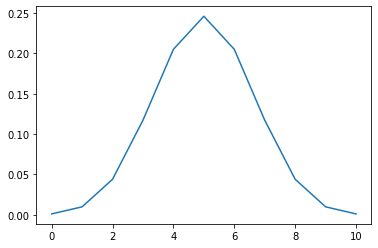

E(X) =  5.0
D(X) =  1.5811388300841898


In [ ]:
n = 10

def binomial_p(n, k, p):
 
  c = math.factorial(n) / (math.factorial(k) * math.factorial((n-k)))
 
  return (c)*p**k*(1-p)**(n-k)

container = []
for i in range(n+1):
  tmp = binomial_p(n, i, 0.5)
  container.append(tmp)
  print('p(fej=', i, ') \t= ', tmp)

x = np.linspace(0, n, n+1)

plt.plot(x, container)
plt.show()

print('E(X) = ', 10*0.5)
print('D(X) = ', np.sqrt(n*0.5*(1-0.5)))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
fig.suptitle('Binomi√°lis eloszl√°sok')

holder = []
for k, j in enumerate([10,20,30,40]):

  n = j
  container = []
  for i in range(n+1):
    tmp = binomial_p(n, i, 0.5)
    container.append(tmp)

  x = np.linspace(0, n, n+1)
  ax.plot(x, container, label='B(' + str(n) + ', ' + str(0.5) + ')')

plt.legend()
plt.show()

### A kumulat√≠v eloszl√°sf√ºggv√©ny

Az egyes √©rt√©kek val√≥sz√≠n√ªs√©ge mellett a kumulat√≠v val√≥sz√≠n√ªs√©g is
meghat√°rozhat√≥, ami egy adott √©rt√©k vagy ann√°l kisebb √©rt√©k
bek√∂vetkez√©s√©nek val√≥sz√≠n√ªs√©g√©t adja meg.




p(fej = 0) -- 0.00098	--	0.0009765625
p(fej = 1) -- 0.00977	--	0.0107421875
p(fej = 2) -- 0.04395	--	0.0546875
p(fej = 3) -- 0.11719	--	0.171875
p(fej = 4) -- 0.20508	--	0.376953125
p(fej = 5) -- 0.24609	--	0.623046875
p(fej = 6) -- 0.20508	--	0.828125
p(fej = 7) -- 0.11719	--	0.9453125
p(fej = 8) -- 0.04395	--	0.9892578125
p(fej = 9) -- 0.00977	--	0.9990234375
p(fej = 10) -- 0.00098	--	1.0


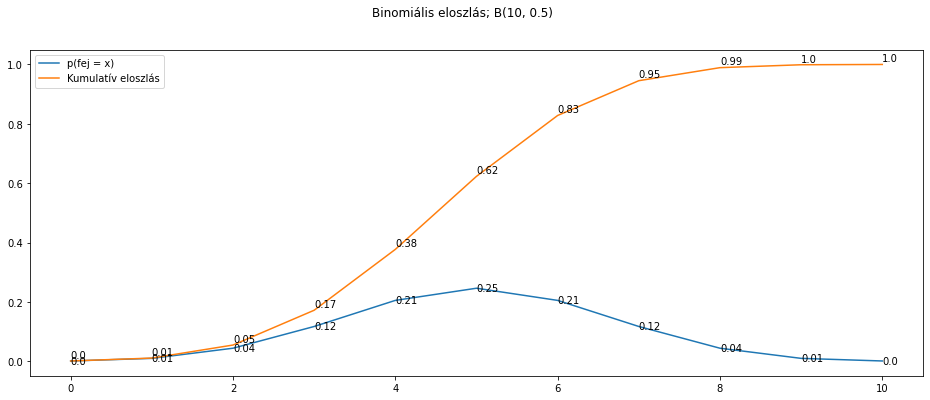

In [ ]:
#@title
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

n = 10

fig.suptitle('Binomi√°lis eloszl√°s; B(' + str(n) + ', 0.5)')

for k, j in enumerate([n]):

  n = j
  container = []
  cdf = [0]
  for i in range(n+1):
    tmp = binomial_p(n, i, 0.5)
    container.append(tmp)

  cdf = np.asarray(container)

  for i in range(n+1):
    print('p(fej = ' + str(i) + ') -- ' + str(round(container[i], 5)) + '\t--\t' + str(cdf.cumsum()[i]))
    ax.text(i, cdf.cumsum()[i] + 0.01, str(round(cdf.cumsum()[i], 2)))
    ax.text(i, container[i] - 0.01, str(round(container[i], 2)))

  x = np.linspace(0, n, n+1)
  ax.plot(x, container, label='p(fej = x)')
  ax.plot(x, cdf.cumsum(), label='Kumulat√≠v eloszl√°s')

plt.legend()
plt.show()

## Egy m√°sik nagyon l√°tv√°nyos k√≠s√©rlet

Tegy√ºk fel, hogy van egy ember aki azt √°ll√≠tja mag√°r√≥l, hogy √°tl√°t a k√°rtyalapokon, de legal√°bbis l√°tja azok sz√≠n√©t (franci k√°rty√°r√≥l van sz√≥).

Annak √©rdek√©ben, hogy ellen≈ërizz√ºk az √°ll√≠t√°s√°t, elv√©geztet√ºnk vele egy kis√©rletsorozatot. Felmutatunk neki egyenk√©nt 10 k√°rtyalapot √©s megk√©rj√ºk, hogy mondja meg mi a k√°rtya szine (k√∂r, pick, k√°r√≥, treff).

Minden k√°rty√°n√°l az egyetlen sz√≠n megjelen√©s√©nek val√≥sz√≠n≈±s√©ge (relat√≠v gyakoris√°ga) 1/4.

Ha az alternat√≠v hipot√©zis √©rv√©nyes, a vizsg√°lati alany helyesen j√≥solja meg az k√°rtyasz√≠nt 1/4-n√©l nagyobb val√≥sz√≠n≈±s√©ggel. A helyes tal√°lgat√°s val√≥sz√≠n≈±s√©g√©t h√≠vjuk p-nek. A hipot√©zisek teh√°t a k√∂vetkez≈ëk:

$H_0 : p = \frac{1}{4}$ (csak tal√°lgat)
$H_1 : p > \frac{1}{4}$ (t√©nyleg √°tl√°t a k√°rty√°n)

Amikor a teszt alany helyesen megj√≥solja mind a 25 k√°rty√°t, tiszt√°nl√°t√≥knak tekintj√ºk ≈ëket, √©s elutas√≠tjuk a nullhipot√©zist. √çgy 24 vagy 23 tal√°lat is. Ugyanakkor mind√∂ssze 5 vagy 6 tal√°lat eset√©n nincs oka ezeket figyelembe venni. De mi lenne a 12 tal√°lat, vagy a 17 tal√°lat? Mekkora a tal√°latok kritikus sz√°ma (c), amikor az alanyt tiszt√°nl√°t√≥nak tekintj√ºk? Hogyan hat√°rozzuk meg a c kritikus √©rt√©ket? C = 25 v√°laszt√°ssal (vagyis a tiszt√°nl√°t√°st csak akkor fogadjuk el, ha az √∂sszes k√°rty√°t helyesen j√≥solj√°k meg), kritikusabbak vagyunk, mint a c = 10 eset√©n. Az els≈ë esetben szinte egyetlen vizsg√°lat alany√°t sem lehet tiszt√°n l√°t√≥nak nevezni, a m√°sodik esetben egy bizonyos sz√°m√∫ vizsg√°lat sikeres lesz. A gyakorlatban egyvalaki d√∂nti el, hogy mennyire lesz kritikus. Vagyis eld√∂nthet≈ë, hogy az els≈ë t√≠pus√∫ hib√°t milyen gyakran fogadja el - hamis pozit√≠v vagy I. t√≠pus√∫ hiba. C = 25 eset√©n egy ilyen hiba val√≥sz√≠n≈±s√©ge:

$P(\text{elvetett} H_0 | H_0 \text{√©rv√©nyes}) = p(X \geq 10 | p = \frac{1}{4}) = \sum_{k = 10}^{25}P(X = k | p = \frac{1}{4}) \approx 0.0713$

Teh√°t arra kerest√ºk a v√°laszt, hogy hol huzzuk meg azt a hat√°rt amikor 95%-os bizonyoss√°ggal kijelenthetj√ºk, hogy az illet≈ë t√©nyleg √°tl√°t a k√°rtyalapokon.

A binomi√°lis t√©tel alapj√°n annak a val√≥sz√≠n≈±s√©ge, hogy pontosan 10-k√°rty sz√≠n√©t tal√°lja el helyesen a 25-b≈ël

$$P(\text{tal√°lat}=10)   = {25 \choose 10} 0.5^{10} * (1-0.5)^{25-10} \approx 0.042$$

ami nem is olyan kev√©s. De az is lehet, hogy 11 k√°rty√°t tal√°l el.

$$P(\text{tal√°lat}=11)   = {25 \choose 11} 0.5^{11} * (1-0.5)^{25-11} \approx 0.019$$

√©s √≠gy tov√°bb. Ezeket az √©rt√©keket √∂sszeadva √°ll el≈ë a fenti $0.0713$ √©rt√©k.

```
def binomial_p(n, k, p):

  c = math.factorial(n) / (math.factorial(k) * math.factorial((n-k)))

  return (c)*p**k*(1-p)**(n-k)
```

```
tmp = 0
for i in range(10, 26, 1):
  tmp += binomial_p(25, i, 0.25)
  print(tmp)
```

```
0.041658350764812724
0.06059396474881851
0.06795781463148742
0.07041243125904373
0.07111375029548839
0.07128518383773041
0.07132089915903084
0.07132720186278974
0.07132813559667994
0.07132825026575418
0.0713282617326616
0.07132826264273362
0.0713282626978895
0.07132826270028758
0.0713282627003542
0.07132826270035508
```

A hamis pozit√≠v eredm√©ny eredm√©ny annak a val√≥sz√≠n≈±s√©ge, hogy √∫gy tal√°l el 10-n√©l t√∂bb lapot, hogy csak tippelget. Ez eset√ºnkben $0.0713$

Ebb≈ël azt tanultuk meg, hogy a vizsg√°lat t√©nyleges elv√©gz√©se el≈ëtt meg kell hat√°rozni az I. t√≠pus√∫ hiba ($\alpha$) maxim√°lis elfogadhat√≥ val√≥sz√≠n≈±s√©g√©t. Ez √°ltal√°ban ez 1% √©s 5% k√∂z√∂tti √©rt√©kek.

Az 1. t√≠pus√∫ hibaar√°nyt√≥l f√ºgg≈ëen kisz√°m√≠t√°sra ker√ºl a c kritikus √©rt√©k. P√©ld√°ul, ha 1% -os hibaar√°nyt v√°lasztunk, akkor a c √©rt√©ket √≠gy kell kisz√°m√≠tani:

$P(\text{elvetett} H_0 | H_0 \text{√©rv√©nyes}) = p(X \geq c | p = \frac{1}{4}) = \leq 0.01$

Ahhoz, hogy ez a felt√©tel teljes√ºlj√∂n a fenti p√©ld√°ban c √©rt√©t 13-ra kell v√°lasztanunk. Teh√°t legal√°bb 13 lapot kell eltal√°lnia a (ha a k√°rty√°kban a sz√≠nek sz√°ma 4, egyenl≈ë ar√°nyban fordulnak el≈ë)

## Megjegyz√©s

> binomi√°lis eloszl√°s standardiz√°ltja aszimptotikusan norm√°lis eloszl√°s√∫. Vagyis $X ‚àº B(n,p)$ eset√©n

$$\frac{X-np}{\sqrt{np(1-p)}} \Rightarrow N(0,1), n \rightarrow \infty$$

<br>

<a name="surusegfuggveny"></a>

## A val√≥sz√≠n≈±s√©gi v√°ltoz√≥ s≈±r≈±s√©gf√ºggv√©nye <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

Ez a kedvenc r√©szem





<a name="temp_1"></a>

## Hogyan √°ll√≠tsunk fel hipot√©zist? <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

### P√©lda 1:

Tegy√ºk fel, hogy engem mint kutat√≥t az √©rdekel, hogy egy adott vegyszer hat√°ssal
van egy adott n≈ëv√©nyfaj n√∂veked√©s√©re.

Ahhoz, hogy ezt a k√©rd√©st meg tudjam v√°laszolni egy k√≠s√©rletet kell v√©geznem,
ahol $n$ sz√°m√∫ n√∂v√©nypal√°nt√°t k√©t csoportra osztok.

Az egyik csoportot 6 h√©ten √°t kelezem a vegyszerrel, a m√°sik csoportot viszont nem kezelem a vegyszerrel.

Hat h√©t ut√°n megm√©rem az egyik csoportba tartoz√≥ n√∂v√©nyek magass√°g√°t, term√©shozam√°t, √©s ugyan ezt teszem a m√°sik csoportba tartoz√≥ n√∂v√©nyekkel.

Ha a $H0$ nullhipot√©zisem az, hogy a vegyszer nincs hat√°ssal a n√∂v√©nyek n√∂veked√©s√©re,
<br>akkor a $H1$ alternat√≠v hipot√©ziesem az, hogy hat√°ssal van r√°.

> **De hogyan tudom ezt tesztelni?**

Tegy√ºk fel, hogy 95%-os $\alpha = 0.05$ szint mellett vizsg√°lom.

> **De mit m√©rtem?**

A n√∂v√©nyek magass√°g√°t √©s (vagy term√©shozam√°t) el√∂bbit centim√©terben (ut√≥bbit kil√≥gramban, darabsz√°mban, √°tm√©r≈ëben, cukortartalomban, vagy b√°rmilyen egy√©b tulajdons√°ga alapj√°n)

Fontos meg√©rteni, hogy ezeknek a tulajdons√°goknak van egy **m√©r√©si szintje**.

> A m√©r√©si szintekr≈ël k√©s≈ëbb r√©szletesen √≠rok [ <a href="#meresi_szintek">ugr√°s</a> ]

<br>

**!**
Ha azt felt√©telezem, hogy a vegyszer nincs hat√°ssal a n√∂veked√©sre, akkor a k√©t csoportban a n√∂v√©nyek magass√°g√°nak √°tlaga egyenl≈ë.

**!**
Ha viszont hat√°ssal van r√°, akkor a kezelt csoport magass√°ga k√ºl√∂nb√∂zni fog a nem kezeltek√©t≈ël.

<br>

**Eml√©keztet≈ë≈±l**

Az I. faj√∫ hib√°t - ha a nullh√©pot√©zist elutas√≠tjuk, holott igaz - ebben az esetben $H0$ a vegyszer nincs hat√°ssal a n√∂veked√©sre.

- ha a $\alpha = 0.05$ teh√°t a nullhipot√©zis elvet√©s√©nek szintj√©t mutatja, azaz azt, hogy
mennyire kell extr√©mnek lennie a pr√≥bastatisztika √©rt√©k√©nek az elm√©leti
eloszl√°s√°hoz viszony√≠tva ahhoz, hogy elutas√≠tsuk a nullhipot√©zist.


## Hipot√©zisvizsg√°lat - Folytat√°s

A statisztikai hipot√©zisvizsg√°latok sor√°n a hipot√©zisek ismeret√©ben a
mint√°b√≥l egy pr√≥bastatisztik√°t sz√°molunk, aminek ismert az elm√©leti eloszl√°sa a nullhipot√©zis eset√©n.


A mint√°b√≥l sz√°molt pr√≥bastatisztika √©rt√©ket annak elm√©leti eloszl√°s√°hoz
viszony√≠tjuk, hogy meghat√°rozzuk, az adott eloszl√°sban mennyire lenne
sz√©ls≈ës√©ges az adott pr√≥bastatisztika √©rt√©k. Ezt az adott √©rt√©kn√©l
sz√©ls≈ës√©gesebb √©rt√©k bek√∂vetkez√©si val√≥sz√≠n
≈ës√©g√©vel jellemezhetj√ºk. 

Min√©l kisebb az adott eloszl√°sban a pr√≥bastatisztika √©rt√©k√©n√©l extr√©mebb
√©rt√©k bek√∂vetkez√©s√©nek val√≥sz√≠n
≈ës√©ge, ann√°l ink√°bb ellent mond ez a
‚Äòbizony√≠t√©k‚Äô a nullhipot√©zisnek. 




Ha a pr√≥bastatisztika √©rt√©ke nagyon extr√©m az adott eloszl√°sban, akkor
elutas√≠tjuk a nullhipot√©zist, m√≠g a pr√≥bastatisztika kev√©sb√©
extr√©m √©rt√©ke eset√©n megtartjuk a nullhipot√©zist.

Teh√°t, a pr√≥bastatisztika alapj√°n valamilyen d√∂nt√©st hozunk a nullhipot√©zis√ºnkr≈ël.


**Ezen d√∂nt√©shozatalkor hozhatunk helyes d√∂nt√©st, de hib√°t is elk√∂vethet√ºnk.**






## A √°tlag √©s a sz√≥r√°s fogalma

Miel√∂tt tov√°bb l√©pn√©nk ismerkedj√ºnk meg k√©t fogalommal.

**Az √°tlag:**

$$\overline{x} = \frac{1}{n} \left( \sum_{i=1}^{n}x_i \right) = \frac{x_1 + x_2 + x_3 + ... + x_n}{n}$$


## A variancia √©s a sz√≥r√≥d√°s

A variancia az √°tlagt√≥l val√≥ n√©gyzetes elt√©r√©s √°tlaga:
$\sigma^2 = \sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n}$

Az √°tlagt√≥l val√≥ √°tlagos elt√©r√©s:
$\sigma = \sqrt{\sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n}}$

! Jav√≠t√°s: a k√©pletben lehetne $\mu$ helyett $\overline{x}$, de err≈ël m√©g k√©s≈ëbb.


<a name="u-proba"></a>

## Az u-pr√≥ba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

### P√©lda 2:

Tegy√ºk fel, hogy az Magyarorsz√°gon egy j√≥l bevizsg√°lt IQ tesztet szeretn√©nk felvenni. Ennek a tesztenek ismert a magyar popul√°ci√≥ban az eloszl√°sa, a tesztpontsz√°mok norm√°l eloszl√°st k√∂vetnek 100-as √°tlaggal, √©s 15-√∂s sz√≥r√°ssal (N(100,15)).

A hipot√©zis√ºnk az, hogy

$H0$ az egyetemist√°k IQ teszt pontsz√°ma azonos a popul√°ci√≥ban m√©rt √©rt√©kkel<br>
$H1$ az egyetemist√°k IQ teszt pontsz√°ma elt√©r (nem egyenl≈ë) a popul√°ci√≥ban m√©rt √©rt√©kkel<br>

Az IQ tesztet 100 egyetemi hallgat√≥val is felvesz√ºk, akiket v√©letlenszer≈±en v√°lasztottunk ki az egyetemr≈ël. A minta √°tlaga 103 lett.

$H0: \overline{x} = 100$<br>
$H1: \overline{x} ‚â† 100$<br>

A nullhipot√©zis√ºnk az, hogy a magyar popul√°ci√≥ban a
tesztpontsz√°m √°tlaga megegyezik az amerikai popul√°ci√≥ √°tlag√°val, 100-
al.

A alternat√≠v, vagy ellenhipot√©zis√ºnk pedig, hogy a magyar popul√°ci√≥ √°tlaga
nem egyezik meg 100-al.

<br>

$$ u = \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

<br>

Mint k√©s≈ëbb l√°tni fogjuk, hogy a minta√°tlagok √°tlaga megegyezik az eredeti
v√°ltoz√≥ √°tlag√°val, sz√≥r√°sa pedig az eredeti v√°ltoz√≥ sz√≥r√°s√°nak, √©s a
minta elemsz√°m n√©gyzetgy√∂k√©nek h√°nyados√°val. [Ha m√°r most kiv√°ncsi r√° akkor ide kattintva megn√©zheti] [ <a href="#mintak_atlaga">ugr√°s</a> ]

Az u pr√≥bastatisztika gyakorlatilag standardiz√°l√°snak felel meg. Teh√°t az u
pr√≥bastatisztika elm√©leti eloszl√°sa standard norm√°l eloszl√°s lesz:
$u \sim N(0,1)$.
Az el≈ëz≈ë p√©ld√°ban az u pr√≥bastatisztika √©rt√©ke:

$$ u = \frac{\overline{X}-\mu}{\frac{\sigma}{\sqrt{n}}} = \frac{103-100}{\frac{15}{\sqrt{100}}} = 2$$

$\overline{x}$ a vizsg√°lt val√≥sz√≠n≈±s√©gi v√°ltoz√≥ √°tlaga a mint√°ban, $103$<br>
$\mu$ az el≈ëre adott √©rt√©k, amihez az √°tlagot viszony√≠tjuk, $100$<br>
$\sigma$ a vizsg√°lt val√≥sz√≠n≈±s√©gi v√°ltoz√≥ ismert sz√≥r√°sa $15$<br>
$n$ a minta elemsz√°ma $100$<br>

K√∂vetkez≈ë l√©p√©sk√©nt azt kell megvizsg√°lnunk, hogy ez a pr√≥bastatisztika
√©rt√©k mennyire sz√°m√≠t extr√©mnek egy standard norm√°l eloszl√°sban,
azaz mekkora a val√≥sz√≠n≈ës√©ge enn√©l extr√©mebb √©rt√©k
bek√∂vetkez√©s√©nek.

A t√°bl√°zat alapj√°n:

2-n√©l extr√©mebb √©rt√©k bek√∂vetkez√©s√©nek val√≥sz√≠n≈ës√©ge 0.02275, ami
kisebb, mint a 0.05-√∂s szignifikancia szint, ez√©rt a nullhipot√©zist
elutas√≠tjuk, √©s azt mondjuk, hogy a pr√≥bastatisztika √©rt√©ke 5%-os szinten
szignifik√°ns.

A d√∂nt√©st ezek ut√°n a v√°lasztott p √©s v√°lasztott t√≠pus√∫ ellenhipot√©zis mellett a k√∂vetkez≈ëk alapj√°n hozzuk:

<br>

<table>

<tr><th></th>
<th>bal oldali ellenhipot√©zis</th>
<th>k√©toldali ellenhipot√©zis</th>
<th>jobb oldali ellenhipot√©zis</th>
</tr>
<tr>
<td>p=0,05</td>
<td>u &lt; -<i>u</i><sub><i>p</i></sub> = -1,64</td><td>u &lt; -<i>u</i><sub><i>p</i>/2</sub> = -1,96 <b>vagy</b> 1,96 = <i>u</i><sub><i>p</i>/2</sub> &lt; u</td>
<td>1,64 = <i>u</i><sub><i>p</i></sub> &lt; u</td></tr>
<tr>
<td>p=0,01</td>
<td>u &lt; -<i>u</i><sub><i>p</i></sub> = -2,32</td>
<td>u &lt; -<i>u</i><sub><i>p</i>/2</sub> = -2,57 <b>vagy</b> 2,57 = <i>u</i><sub><i>p</i>/2</sub> &lt; u</td>
<td>2,32 = <i>u</i><sub><i>p</i></sub> &lt; u</td>
</tr>
<tr>
<td>p=0,005</td>
<td>u &lt; -<i>u</i><sub><i>p</i></sub> = -2,57</td>
<td>u &lt; -<i>u</i><sub><i>p</i>/2</sub> = -2,81 <b>vagy</b> 2,81 = <i>u</i><sub><i>p</i>/2</sub> &lt; u</td>
<td>2,57 = <i>u</i><sub><i>p</i></sub> &lt; u</td>
</tr>
</table>

<br>

√çgy a nullhipot√©zist elvethetj√ºk, az egymint√°s u-pr√≥ba szerint szignifik√°ns k√ºl√∂nbs√©g van (p = 0,05-√∂s szignifikancia szint mellett) a pedag√≥giai programban r√©szt vett √≥vod√°sok √°tlagos IQ-ja √©s a 100-as √©rt√©k k√∂z√∂tt.

Ellenkez≈ë esetben, meggy≈ëz≈ë ellenhipot√©zis h√≠j√°n megtartjuk a nullhipot√©zist.

## A pr√≥ba matematikai h√°ttere

Mivel a vizsg√°lt val√≥sz√≠n≈±s√©gi v√°ltoz√≥t√≥l megk√∂vetelj√ºk, hogy norm√°lis eloszl√°st k√∂vessen, √≠gy a bel≈ële k√©pzett $\overline{x}$ vagyis a minta √°tlaga mint val√≥sz√≠n≈±s√©gi v√°ltoz√≥ eloszl√°sa is norm√°lis eloszl√°st k√∂vet.

$\sigma$ a X v√°ltoz√≥nak a popul√°ci√≥n bel√ºli szor√°s√°t jel√∂li, √≠gy a minta √°tlag√°nak $\overline{x}$ sz√≥r√°sa $\frac{\sigma}{\sqrt{n}}$. A nullhipot√©ziben azt fogalmaztam meg, hogy a popul√°ci√≥s √°tlag = X v√°rhat√≥ √©rt√©k√©vel, akkor $u$ pr√≥bastatisztika standard norm√°lis eloszl√°st fog k√∂vetni. Ez√©rt b√°rmilyen $ 1 > p > 0$ eset√©n meg lehet hat√°rozni, az $u_{1/2}$ √©rt√©ket. Teh√°t

p annak a val√≥sz√≠n≈±s√©ge, hogy a pr√≥basatatisztika √©rt√©ke $ -u_{p/2}$ √©s $u_{p/2}$ k√∂z√© esik ha $H0$ igaz:

$$ 1-p = P\left( -u_{p/2} < \frac{\overline{X}-\mu}{\sigma/\sqrt{n}} < u_{p/2} | H_0\right) = \Phi(u_{p/2}) - \Phi(u_{p/2})$$

ahol $\Phi$ a standard norm√°lis eloszl√°sf√ºggv√©ny. Teh√°t tudjuk, hogy a +-1 sz√≥r√°sra a ter√ºlet 68.2 sz√°zal√©ka, +- 2 sz√≥r√°sra a 95 sz√°zal√©ka van a f√ºggv√©ny altti ter√ºletnek.

Ez azt jelenti, hogy ha igaz a nullhipot√©zis, akkor az $u$ pr√≥bastatisztika √©rt√©ke 1-p val√≥sz√≠n≈±s√©ggel a ($-u_{p/2}$, $u_{p/2}$) intervallumba kell, hogy essen.

√ârdekess√©g:

> interakt√≠v f≈±ggv√©ny alatti ter√ºlet sz√°m√≠t√°s standard norm√°lis eloszl√°sf√ºggv√©nyre - [ <a href="https://www.mathsisfun.com/data/standard-normal-distribution-table.html">link</a> ]


-0.021400233916549105


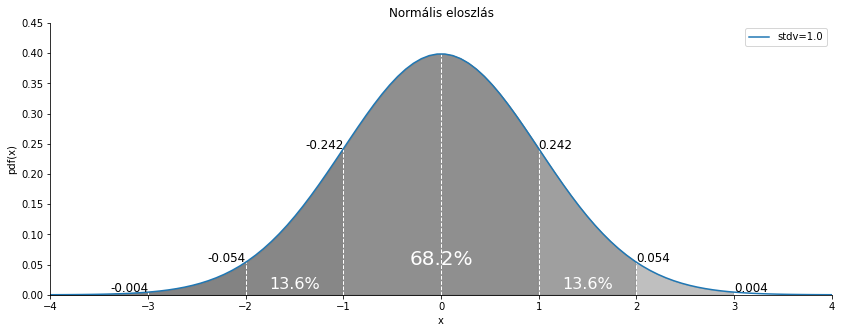

In [ ]:
#@title
#@Norm√°lis eloszl√°s
x = np.linspace(-4,4,100)
stdvs = [1.0, 2.0, 3.0]

fig, ax = plt.subplots(figsize=(14,5))

s = 1

ax.plot(x, stats.norm.pdf(x,scale=1), label='stdv=%.1f' % s)
ax.vlines(0, 0, stats.norm.pdf(0,0,1), linestyle='--', lw=1, color='white')

for s in stdvs:
  pdf = stats.norm.pdf(x=s, loc=0, scale=1)
  ax.vlines(s, 0, pdf, linestyle='--', lw=1, color='white')
  px=np.arange(-4,s,0.01)
  ax.fill_between(px,norm.pdf(px),alpha=0.5, color='grey')
  ax.text(s, pdf, '' + str(round(pdf, 3)), fontsize=12, horizontalalignment='left')
  ax.vlines(0-s, 0, pdf, linestyle='--', lw=1, color='white')
  px=np.arange(-4,0-s,0.01)
  ax.fill_between(px,norm.pdf(px),alpha=0.5, color='grey')
  ax.text(0-s, pdf, '' + str(0-round(pdf, 3)), fontsize=12, horizontalalignment='right')

p1 = stats.norm.cdf( 0, loc=0, scale=1) - stats.norm.cdf(1, loc=0, scale=1)
p2 = stats.norm.cdf( 1, loc=0, scale=1) - stats.norm.cdf(2, loc=0, scale=1)
p3 = stats.norm.cdf( 2, loc=0, scale=1) - stats.norm.cdf(3, loc=0, scale=1)

ax.text(0, 0.05, '' + str(2*100*round(-p1, 3)) +'%', fontsize=20, color='white', horizontalalignment='center')
ax.text(-1.5, 0.01, '13.6%', fontsize=16, color='white', horizontalalignment='center')
ax.text( 1.5, 0.01, '13.6%', fontsize=16, color='white', horizontalalignment='center')

print(p3)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Norm√°lis eloszl√°s')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45); ax.set_xlim(-4,4)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Megjegyz√©sek

Mint k√©s≈ëb l√°tni fogjuk, az egymint√°s u-pr√≥ba bizonyos tekintetben az egymint√°s t-pr√≥ba p√°rja. Az egymint√°s t-pr√≥ba ugyanezt a nullhipot√©zis vizsg√°lja, csak nem felt√©tele az sz√≥r√°s √©rt√©k√©nek el≈ëzetes ismerete, hanem azt a minta adataib√≥l becsli. A pr√≥bastatisztika k√©plete is nagyon hasonl√≥, csak benne az ismert œÉ sz√≥r√°s helyett a mint√°b√≥l becs√ºlt s sz√≥r√°s szerepel. Term√©szetesen a k√©t pr√≥ba matematikai h√°ttere is nagyon hasonl√≥.

√ârdemes megfigyelni az √≥vatos fogalmaz√°st a nullhipot√©zis megtart√°sa eset√©n. Az √°ltalunk meghat√°rozott **p szignifikancia szint** az **els≈ëfaj√∫ hiba** elk√∂vet√©s√©nek val√≥sz√≠n≈±s√©g√©t adja meg.

**Ha el tudom vetni a nullhipot√©zist, akkor ekkora kock√°zatot v√°llalok arra n√©zve, hogy esetleg hiba elvetni.**

Amennyiben viszont nem tudom elvetni a nullhipot√©zis, akkor els≈ëfaj√∫ hib√°t biztosan nem fogok elk√∂vetni, √°m elk√∂vethetek m√°sodfaj√∫ hib√°t, melynek kock√°zat√°r√≥l semmit nem mond a pr√≥ba. Ez indokolja, hogy ha a nullhipot√©zist megtartjuk, akkor nem azt mondjuk, hogy nincs szignifik√°ns k√ºl√∂nbs√©g a minta √°tlaga √©s az el≈ëre megadott m √©rt√©k k√∂z√∂tt, hanem hogy az egymint√°s u-pr√≥ba nem tudott szignifik√°ns k√ºl√∂nbs√©get kimutatni (ami ett≈ël m√©g lehet, hogy van).



```
Az egymint√°s u-pr√≥b√°ra ‚Äì az angol nyelv≈± szakirodalom alapj√°n ‚Äì szoktak z-pr√≥bak√©nt, vagy egymint√°s z-pr√≥bak√©nt is hivatkozni.
Ez az elnevez√©s a magyar szakirodalomban ritk√°n fordul el≈ë, ami az√©rt is szerencs√©s, mert a magyar szakirodalom egy m√°sik
pr√≥b√°t is szokott n√©ha z-pr√≥b√°nak nevezni (ami korrel√°ci√≥s egy√ºtthat√≥k k√∂z√∂tti szignifik√°ns k√ºl√∂nbs√©gek kimutat√°s√°ra alkalmas).
```




In [ ]:

## ide betenni ugyanennek a python implement√°ci√≥j√°t

vector = np.array([.925, .95, .975, .99])
p_values = [stats.norm.ppf(v) for v in vector]    # cumulative distribution function
f_values = [stats.norm.cdf(p) for p in p_values]  # percentage point function 

for p,f in zip(p_values, f_values):
 print(f'p: {p}, \tci: {f}')


p: 1.4395314709384563, 	ci: 0.925
p: 1.6448536269514722, 	ci: 0.95
p: 1.959963984540054, 	ci: 0.975
p: 2.3263478740408408, 	ci: 0.99


## A standard norm√°lis eloszl√°sr√≥l

Err≈ël a nagyon fontos t√©m√°r√≥l k√©s≈ëbb r√©szletesen √≠rok. Most csak szeml√©ltet√©sk√©ppen teszem ide, az al√°bbi √°br√°t, amelyen a standar norm√°lis eloszl√°s √©s a f√ºggv√©ny alatti ter√ºlet √°tlagt√≥l k√©t standadard sz√≥r√°snyi ter√ºlete l√°that√≥.

Tulajdonk√©ppen a fenti pr√≥b√°n ennek seg√≠ts√©g√©vel hat√°roztuk meg, hogy a pr√≥bastatisztik√°nk √©rt√©ke milyen val√≥sz√≠n≈±s√©ggel esik egy adot ter√ºletre, vagy azon k√≠v√ºlre.

> Ennek a szeml√©ltet≈ë √°br√°nak a seg√≠ts√©g√©vel tal√°n jobban meg√©rhtet≈ë az u-pr√≥ba.

> Ha az u-pr√≥bastatisztik√°nk √©rt√©ke ezen tartom√°nyon k√≠v√ºlre esik, akkor elutas√≠tjuk a nullhipot√©zist (adott szignifikancia szint mellett)

A standard norm√°iis eloszl√°sr√≥l teljese eg√©sz√©ben √©s r√©szletesen a k√©s≈ëbbiekben is √≠rok. Ha most szeretn√© √°ttekinteni kattintson ide [ <a href="#normalis_eloszlas">ugr√°s</a> ]

-1.959963984540054 1.959963984540054


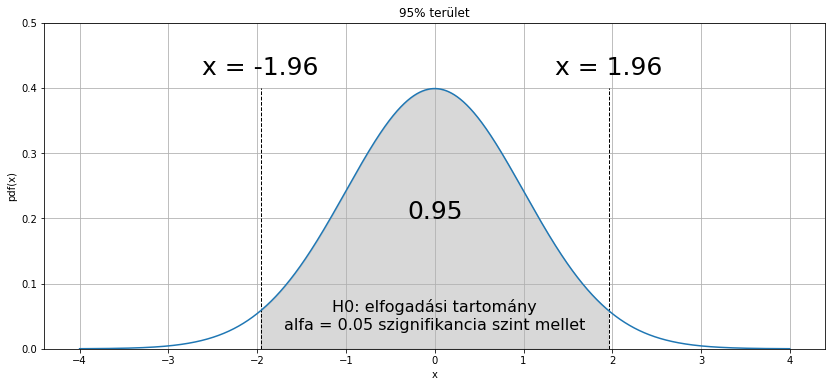

In [ ]:
a,b = stats.norm.interval(alpha=0.95, loc=0, scale=1)
print(a,b)

fig, ax = plt.subplots(figsize=(14,6))

x  = np.arange(-4, 4, 0.001)
px = np.arange(a, b, 0.01)

ax.plot(x, stats.norm.pdf(x)); ax.set_title("95% ter√ºlet"); ax.set_xlabel('x')
ax.set_ylabel('pdf(x)'); ax.grid(True); ax.set_ylim(0,0.5)
ax.fill_between(px,stats.norm.pdf(px),alpha=0.3, color='grey')
ax.text(-0.0,0.2,"0.95", fontsize=25, horizontalalignment='center')
ax.text(-0.0,0.03,
        "H0: elfogad√°si tartom√°ny\nalfa = 0.05 szignifikancia szint mellet",
        fontsize=16,
        horizontalalignment='center')
ax.vlines(1.96, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(1.96,0.42,"x = 1.96", fontsize=25, horizontalalignment='center')
ax.vlines(-1.96, 0, 0.40, colors='black', linestyles='--', lw=1)
ax.text(-1.96,0.42,"x = -1.96", fontsize=25, horizontalalignment='center')

plt.show()

<a name="egymintas-t-proba"></a>

## Egymint√°s t-pr√≥ba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

Az egymint√°s esetben a hasonl√≥s√°g m√©g nagyobb, ugyanis az egymint√°s t-pr√≥ba k√©plete csak annyiban t√©r el az egymint√°s u-pr√≥b√°√©t√≥l, hogy benne az el≈ëre megadott sz√≥r√°s hely√©n a minta alapj√°n becs√ºlt sz√≥r√°s √°ll. S≈ët, az egymint√°s t- √©s u-pr√≥ba a legt√∂bb alkalmaz√°si felt√©telben is azonos. K√ºl√∂nbs√©g a k√©t pr√≥ba k√∂z√∂tt ‚Äì az alkalmaz√°s szintj√©n ‚Äì mind√∂ssze egy felt√©telben van, m√©gpedig abban, hogy az egymint√°s t-pr√≥ba nem ig√©nyli a vizsg√°lt val√≥sz√≠n≈±s√©gi v√°ltoz√≥ sz√≥r√°s√°nak ismeret√©t, m√≠g az egymint√°s u-pr√≥ba eset√©ben ez eleve adott kell, hogy legyen. (A matematikai h√°tt√©rben az elt√©r√©s nagyobb.)



> Az egymint√°s t-pr√≥ba azt vizsg√°lja, hogy egy mint√°ban egy val√≥sz√≠n≈±s√©gi v√°ltoz√≥ √°tlaga szignifik√°nsan k√ºl√∂nb√∂zik-e egy adott $\mu$ √©rt√©kt≈ël.

> Itt is felt√©tel, hogy a vizsg√°lt val√≥sz√≠n≈±s√©gi v√°ltoz√≥ intervallum vagy ar√°nysk√°l√°n m√©rt√©k

> A pr√≥ba $H0$ a pr√≥ba nullhipot√©zise, a vizsg√°lt v√°ltoz√≥ √°tlaga statisztikai szempontb√≥l megegyezik az el≈ëre megadott $\mu$ √©rt√©kkel.<br>
Alternat√≠v hipot√©zise $H1$ a vizsg√°lt v√°ltoz√≥ √°tlaga statisztikai szempontb√≥l nem egyezik meg az el≈ëre megadott $\mu$ √©rt√©kkel.

> A "statisztikai szempontb√≥l" kifejez√©s itt arra utal, hogy az elt√©r√©s a mint√°b√≥l kisz√°molt √°tlag √©s az m √©rt√©k k√∂z√∂tt olyan minim√°lis, hogy puszt√°n csak a v√©letlen ingadoz√°snak tulajdon√≠that√≥ (ekkor a minta √°tlaga statisztikai szempontb√≥l azonosnak tekinthet≈ë az $\mu$-mel), vagy jelent≈ësen nagyobb, mint ami a v√©letlennel magyar√°zhat√≥ (ekkor a minta √°tlaga statisztikai szempontb√≥l nem egyezik meg $\mu$-vel).
<br>
<br>
Teh√°t a hipot√©zis√ºnk ugyan az, mint az egymint√°s u-pr√≥ba eset√©ben.

Az egymint√°s t-pr√≥ba pr√≥bastatisztik√°ja:

$$t = \frac{\overline{x} - \mu}{s/\sqrt{n}}$$

ahol, az u-pr√≥b√°hoz k√©pest csak annyi elt√©r√©s van, hogy $\sigma$ helyett $s$ a minta sz√≥r√°s√°val sz√°molunk.

A sz√≥r√°st a kor√°bban eml√≠tett k√©plet alapj√°n sz√°moljuk, ha azonban a minta elemsz√°ma $n < 30$ akkor a sz√≥r√°s helyett a korrig√°lt sz√≥r√°ssal kell sz√°molni.

$$s^* = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_i-\overline{x})^2}$$

A csere m√∂g√∂tt egy komolyabb megfontol√°s √°ll - amely √∂sszef√ºgg√©sben van az √°tlag kisz√°mol√°s√°val √©s az elemsz√°m ismeret√©vel - de r√∂viden csak annyit eml√≠ten√©k meg, hogy a $n < 30$ eset√©ben a sz√≥r√°s ($s$) torz√≠tott m√≠g a korrig√°lt sz√≥r√°s ($s^*)$ torz√≠tatlan becsl√©se a sz√≥r√°snak.

> **A pr√≥ba v√©grehajt√°s√°nak l√©p√©sei**

>1. A *t* pr√≥bastatisztika kisz√°m√≠t√°sa.
2. Az $\alpha$ vagyis a p szignifikanca szint megv√°laszt√°sa (0.05 vagy 0.01)
3. A p szignifikanci szintt≈ël f√ºgg≈ë $t_p$ √©rt√©k kiv√°laszt√°sa a pr√≥b√°nak megfel≈ë t-eloszl√°s t√°bl√°zat√°b√≥l, vagy m√°s n√©ven Student f√©le t-eloszl√°s t√°bl√°zatb√≥l. A szabads√°gfok ismeret√©ben - egymint√°s t-pr√≥b√°n√°l ez 1 - k√∂nnyen leolvashat√≥ a t√°bl√°zatb√≥l, hogy adott
> 4. A nullhipot√©zis elfogad√°sa vagy elvet√©se
Ha a t-pr√≥bastatisztika alapj√°n kapott √©rt√©k $\geq t_p$ akkor a **nullhipot√©zist elvetj√ºk** √©s az alternet√≠v hipot√©zist tartjuk meg, √©s √∫gy √©rtlemezz√ºk, hogy a mint√°ban vizsg√°lt val√≥sz√≠n≈±s√©gi v√°ltoz√≥ √°tlaga szignifik√°nsan elt√©r az adott $\mu$ √©rt√©kt≈ël (p szignifikancia szint mellett)<br><br>
Ha a t-pr√≥bastatisztika alapj√°n kapott √©rt√©k $\geq t_p$ akkor a **nullhipot√©zist megtartjuk**, amit √∫gy interpret√°lunk, hogy az egymint√°s t-pr√≥ba nem mutat ki szignifik√°ns k√ºl√∂nbs√©get a vizsg√°lt val√≥sz√≠n≈±s√©gi v√°ltoz√≥ mintabeli √°tlaga √©s az adott m √©rt√©k k√∂z√∂tt (p szignifikancia szint mellett).

Egy p√©ks√©gben 500 grammos kenyereket √°ll√≠tanak el≈ë. De a p√©kek hanyags√°g√°b√≥l k√∂vetkez≈ëen n√©ha egy kicsit t√∂bb, n√©ha kicsit kevesebb anyag jut a kemenc√©be.

Arra vangyunk kiv√°ncsiak, hogy a p√©ks√©g √°tlagos teljes√≠tm√©nye 500 grammos keny√©r.

Vesz√ºnk egy $n = 10$ elem≈± mint√°t √©s megm√©rj√ºk a kenyereket. Azt tal√°ljuk, hogy a kenyerek s√∫lya<br>
517, 498, 502, 504, 498, 517, 506, 509, 495, 514 gramm. A minta √°tlaga $\overline{x} = 506$


In [ ]:

sample = np.array([517, 498, 502, 504, 498, 517, 506, 509, 495, 514])

print(sample.mean())


506.0


Ahogy m√°r kor√°bban is el≈ëfordult, r√°n√©z√©sre nem tudjuk meg√°llap√≠tani, hogy ez a 506 gramm l√©nyegesen elt√©r-e az 500 g-t√≥l vagy csak a v√©letlennek tulajdon√≠that√≥ apr√≥ elt√©r√©sr≈ël van sz√≥. Ennek a dilemm√°nak az eld√∂nt√©s√©re egymint√°s t-pr√≥b√°t alkalmazunk.

Feltessz√ºk, hogy a t√∂lt≈ëanyag t√∂mege, mint val√≥sz√≠n≈±s√©gi v√°ltoz√≥ norm√°lis eloszl√°st k√∂vet. (Hogy ez √≠gy van-e azt illeszked√©svizsg√°latokkal, azon bel√ºl is normalit√°svizsg√°latokkal lehetne ellen≈ërizni.) A t√∂megnek kg-ban val√≥ m√©r√©se ar√°nysk√°la, √≠gy az egymint√°s t-pr√≥ba alkalmaz√°s√°nak felt√©telei teljes√ºlnek. Mivel a minta elemsz√°ma n = 10 < 30 √≠gy a sz√≥r√°s becsl√©s√©re az s* k√©pletet haszn√°ljuk: s* = 8,05 ad√≥dik. Az √©rt√©k, amelyt≈ël a minta √°tlag√°nak esetleges elt√©r√©s√©re vagyunk k√≠v√°ncsiak, nyilv√°nval√≥an az $\mu$ = 500 √©rt√©k. A pr√≥bastatisztika k√©plet√©nek minden elem√©t ismerj√ºk, teh√°t sz√°m√≠that√≥:

$$t = \frac{\overline{x} - \mu}{s/\sqrt{n}} = \frac{506 - 500}{8,05/\sqrt{10}}\approx 2,36$$


Vegy√ºk a szignifikancia szintet p = 0,05-nek azaz 5%-os kock√°zatot v√°llalunk arra, hogy esetleg √∫gy vetj√ºk el a nullhipot√©zist, hogy az k√∂zben igaz. A szabads√°gi fok $f = n -1 = 9$, √≠gy a $p$ √©s az $f$ ismeret√©ben a t-eloszl√°s t√°bl√°zat√°b√≥l k√∂nnyen kikereshetj√ºk a megfelel≈ë t√°bl√°zatbeli √©rt√©ket, ami $ t_{p}=t_{0,05}= 1,833$.

<a href="https://en.wikipedia.org/wiki/Student%27s_t-distribution"> Student f√©le t-eloszl√°s t√°bl√°zat</a>

$|t| \approx 2,36$ miatt $2,36 > 1,833$ 95 sz√°zal√©kos $\alpha$ szignifikancia szint melett.<br>
azaz<br>
$\lvert t\rvert \geq t_p$ teljes√ºl, teh√°t a $H0$ nullhipot√©zist miszerint a mint√°ban m√©rt √°tlag alapj√°n a minta sz√°rmazhat egy olyan nagyobb popul√°ci√≥b√≥l (elm√©leti) (vagy olynan norm√°lis eloszl√°sb√≥l amelynek √°tlaga 500) elvetj√ºk.

De $p = 0,01$ szignifikancia szint mellett m√°r $|t| = 2,36 < t_{0,01} = 2,821$ ez√©rt az elt√©r√©s nem lenne szignifik√°ns.


https://hu.wikipedia.org/wiki/Egymint%C3%A1s_t-pr%C3%B3ba

<br>

## Python:

> Fenti feladat megold√°sa Pyhon scipy k√∂nyvt√°r seg√≠ts√©g√©vel. A p-√©rt√©k a sz√°m√≠tott val√≥sz√≠n≈±s√©ge annak, hogy a megfigyelt jelens√©get tapasztaljuk, ha a vizsg√°latunk nullhipot√©zise igaz.


In [ ]:


test, p = stats.ttest_1samp(sample, 500, alternative='two-sided')

print('A t-pr√≥bastatisztika √©rt√©ke = {:.5f}'.format(test))
print('A p √©rt√©ke = {:.5f}'.format(p))



A t-pr√≥bastatisztika √©rt√©ke = 2.35541
A p √©rt√©ke = 0.04292


## K√©toldali, egyoldali hipot√©zis vizsg√°lat

> Az alternat√≠v hipot√©zisekkel kapcsolatban fontos tiszt√°zni, hogy t√∂bbf√©le
form√°ja lehet. Fenti p√©ld√°b√°kban az alternat√≠v hipot√©zis az volt, hogy a
popul√°ci√≥√°tlag nem egyezik meg a felt√©telezett popul√°ci√≥√°tlaggal. Teh√°t
ann√°l kisebb vagy nagyobb is lehet. Ilyenkor **k√©toldali** ellenhipot√©zisr≈ël
besz√©l√ºnk.

> Az alternat√≠v hipot√©zis lehet **egyoldali** is, amikor el≈ëzetes elk√©pzel√©s alapj√°n,
csak azt vizsg√°ljuk, hogy p√©ld√°ul a popul√°ci√≥√°tlag nagyobb-e, mint a
felt√©telezett √©rt√©ke.

In [ ]:
kisebb = 1.96
df = 2

kisebb_mint = stats.norm.cdf(x=0, loc=kisebb, scale=1)
print(kisebb_mint)

kisebb_mint = stats.t.cdf(0, df, kisebb, 1)
print(kisebb_mint)

fig, ax = plt.subplots(figsize=(14,6))

# for distribution curve
x  = np.arange(-4, 4, 0.001)
px = np.arange(-4, kisebb, 0.01)

ax.plot(x, stats.t.pdf(x, df))
ax.plot(x, stats.norm.pdf(x)); ax.set_title("N(0,1), Student's-t"); ax.set_xlabel('x')
ax.set_ylabel('pdf(x)'); ax.grid(True); ax.set_ylim(0,0.5)
ax.fill_between(px,stats.norm.pdf(px),alpha=0.3, color='grey')
ax.text(-0.0,0.2, (1 - round(kisebb_mint,3))*100, fontsize=25, horizontalalignment='center')
ax.text(-0.0,0.03,
        "",
        fontsize=16,
        horizontalalignment='center')
ax.vlines(1.96, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(1.96,0.42,"x = 1.96", fontsize=25, horizontalalignment='center')

#mekkora x ha 95% a f√ºggv√©ny alatti ter√ºlet
#Percent point function (inverse of cdf ‚Äî percentiles).
u95 = stats.t.ppf(0.95, df, loc=0, scale=1)

ax.vlines(u95, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(u95 + 0.1,0.30,'x = %s' % (round(u95,2)), fontsize=25, horizontalalignment='center')

# ahol a 95 sz√°zal√©k lefedetts√©g van, ott x = u95
kisebb_mint_where_95 = stats.t.cdf(0, df, u95, 1)
# print(kisebb_mint_where_95) # enenk a 0.05 √©rt√©ket kell visszaadnia
ax.text(-0.0,0.1, (1 - round(kisebb_mint_where_95,3))*100, fontsize=25, horizontalalignment='center')
px = np.arange(-4, u95, 0.01)
ax.fill_between(px,stats.t.pdf(px, df),alpha=0.3, color='grey')

plt.show()

0.024997895148220435
0.09452865480086611


Fenti √°br√°nak t√∂bb √©rdekess√©ge is van:

> 1. √∂ssze tudjuk hasonl√≠tani a **norm√°lis** √©s a **Student-f√©le t-eloszl√°st**.
Ut√≥bbi alakja az elemsz√°mok n√∂vel√©s√©vel egyre jobban k√∂zel√≠t a norm√°lis eloszl√°shoz. (ehhez √∫jra kell futtatni a cell√°t df = 10, df = 20, df = 30, etc. √©rt√©kkel)

> 2. Egysezer azt jelen√≠tettem meg, hogy milyen **x** √©rt√©kn√©l √©ri el a f√ºggv√©ny alatti ter√ºlet a 95%-ot. M√°sodszor pedig azt, hogy mekkora f√ºggv√©ny alatti ter√ºlet tartozik **x = 1.96** √©rt√©khez.

> 3. Indirekt m√≥don az is leolvashat√≥ az √°br√°b√≥l, hogy a Student-f√©le t-eloszl√°s sz√≥r√°sa kis elemsz√°mn√°l nagyobb mint a norm√°lis eloszl√°s√©.

In [ ]:


test, p = stats.ttest_1samp(sample, 500, alternative='greater')

print('A t-pr√≥bastatisztika √©rt√©ke = {:.5f}'.format(test))
print('A p √©rt√©ke = {:.5f}'.format(p))



A t-pr√≥bastatisztika √©rt√©ke = 2.35541
A p √©rt√©ke = 0.02146


<a name="ketmintas-u-proba"></a>

## A k√©tmint√°s u-pr√≥ba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

### P√©lda 3:

Azt vizsg√°ljuk, hogy k√©t mint√°ban egy-egy val√≥sz√≠n≈±s√©gi v√°ltoz√≥ √°tlagai egym√°st√≥l szignifik√°nsan k√ºl√∂nb√∂znek-e.

Hasonl√≥an az u-pr√≥b√°hoz itt van n√©h√°ny peremfelt√©tel amelynek teljes√ºlnie kell.

- A v√°ltoz√≥k legyen norm√°lis eloszl√°s√∫ak
- intervallum vagy ar√°nysk√°l√°n m√©rtek
- sz√≥r√°saik megegyezzenek

Tegy√ºk fel, hogy k√©t gy√°rtosoron gy√°rtott term√©kek s√∫ly√°t szeretn√©nk √∂sszehasonl√≠tan. Ez√©rt $n_x = 75$  √©s $n_y = 50$ elem≈± v√©letlen mint√°t vesz√ºnk mintk√©t gy√°rtosor term√©keib≈ël. Az egyik mint√°ban a term√©kek suly√°nak √°tlaga $\overline{x} = 28$ a m√°sik mint√°ban $\overline{y} = 33$ kil√≥gramm. Ismerj√ºk tov√°bb√° a gy√°rt√≥sort k√©sz√≠t≈ë c√©gekt≈ël, hogy a term√©kek sz√≥r√°sa $\sigma_x = 14.1$ √©s $\sigma_y = 9.5$.

A hipot√©zis√ºnk az, hogy

$H0$ a k√©t minta √°tlaga megeggyezik $H0: \overline{x} = \overline{y}$<br>
$H1$ a k√©t minta √°tlaga nem egyezeik meg $H1: \overline{x} ‚â† \overline{y}$<br>

<br>

$$ u = \frac{\overline{x} - \overline{y}}{\sqrt{\frac{\sigma_x^{2}}{n_x} + \frac{\sigma_y^{2}}{n_y}}}$$

<br>

$\overline{x}$ a vizsg√°lt val√≥sz√≠n≈±s√©gi v√°ltoz√≥ √°tlaga a mint√°ban, $103$<br>
$\mu$ az el≈ëre adott √©rt√©k, amihez az √°tlagot viszony√≠tjuk, $100$<br>
$\sigma$ a vizsg√°lt val√≥sz√≠n≈±s√©gi v√°ltoz√≥ ismert sz√≥r√°sa $15$<br>
$n$ a minta elemsz√°ma $100$<br>

<br>

$$ u = \frac{\overline{x} - \overline{y}}{\sqrt{\frac{\sigma_x^{2}}{n_x} + \frac{\sigma_y^{2}}{n_y}}} = \frac{28 - 33}{\sqrt{\frac{14.1^2}{75} + \frac{9.5^2}{50}}}= -2.368$$

<br>

> pr√≥bastatisztika standard norm√°lis eloszl√°st fog k√∂vetni. Emiatt b√°rmilyen 0 < p < 1 eset√©n meg lehet hat√°rozni azt az $u_{p/2}$ √©rt√©ket, melyre

$$ 1-p = P\left( -u_{p/2} < \frac{\overline{x} - \overline{y}}{\sqrt{\frac{\sigma_x^{2}}{n_x} + \frac{\sigma_y^{2}}{n_y}}} < u_{p/2} | H_0\right) = \Phi(u_{p/2}) - \Phi(u_{p/2}) = 2\Phi(u_{p/2})-1$$

> ahol $\Phi(x)$ a standard norm√°lis eloszl√°sf√ºggv√©ny. Ez azt jelenti, hogy ha igaz a nullhipot√©zis, akkor az u pr√≥bastatisztika √©rt√©ke $1‚Äìp$ val√≥sz√≠n≈±s√©ggel a ($‚Äìu_{p/2}, u_{p/2}$) intervallumba esik.

A standard norm√°lis elsozl√°s f√ºggv√©ny alatti ter√ºlet $u = -2.368$ √©rt√©kn√©l $0.0089$. Mivel **k√©toldali hipot√©zis vizsg√°latot** v√©gezt√ºnk ez√©rt ezt az √©rt√©ket megszorozva kett≈ëvel megkapjuk annak a val√≥sz√≠n≈±s√©g√©t, hogy $P(H0:\overline{x} = \overline{y}) = 0.0178$

Ha el≈ëzetesen az $\alpha < 0.05$ szignifikancia szintet hat√°roztuk meg, akkor $H0: \overline{x} = \overline{y}$ nullhipot√©zist el kell vetn√ºnk.



In [ ]:

def ind_u_test(x,y, sigma1, sigma2, n1, n2):
  return (x-y)/(np.sqrt((((sigma1**2)/n1)+((sigma2**2)/n2))))

ind_u_test(28, 33, 14.1, 9.5, 75, 50)


-2.368684181472862

## Megjegyz√©s:

> A gyakorlatban a k√©tmint√°s u-pr√≥b√°t (angol szakirodalomban `two-sample z-test`) nem szokt√°k gyakran alkalmazni, mivel a k√©t popul√°ci√≥ sz√≥r√°sa √°ltal√°ban nem ismert.

> Ehelyett ink√°bb a mint√°b√≥l sz√°molt sz√≥r√°st √©s k√©tmint√°s t-pr√≥b√°t alkalmaznak.




<a name="ketmintas-t-proba"></a>

## K√©tmint√°s t-pr√≥ba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

> Hasonl√≥an a k√©tmint√°s u-pr√≥b√°hoz, itt is k√©t mint√°ban egy-egy val√≥sz√≠n≈±s√©gi v√°ltoz√≥ √°tlag√°t hasonl√≠tjuk √∂ssze

> A pr√≥ba $H0$ a pr√≥ba nullhipot√©zise, a vizsg√°lt v√°ltoz√≥ √°tlaga statisztikai szempontb√≥l megegyezik a m√°sik v√°ltoz√≥ √°tlag√°val.<br>
Alternat√≠v hipot√©zise $H1$ a vizsg√°lt v√°ltoz√≥ √°tlaga statisztikai szempontb√≥l nem egyezik meg az m√°sik v√°ltoz√≥ √°tlag√°val.

> A "statisztikai szempontb√≥l" kifejez√©s itt arra utal, hogy az elt√©r√©s a k√©t mint√°b√≥l kisz√°molt √°tlag k√∂z√∂tt olyan minim√°lis, hogy puszt√°n csak a v√©letlen ingadoz√°snak tulajdon√≠that√≥ (ekkor a k√©t minta √°tlaga statisztikai szempontb√≥l azonosnak tekinthet≈ë), vagy jelent≈ësen nagyobb, mint ami a v√©letlennel magyar√°zhat√≥ (ekkor a k√©t minta √°tlaga statisztikai szempontb√≥l nem egyezik meg).
<br>
<br>
Teh√°t a hipot√©zis√ºnk ugyan az, mint az k√©tmint√°s u-pr√≥ba eset√©ben.

Az k√©tmint√°s t-pr√≥ba pr√≥bastatisztik√°ja:

$$t = \frac{\overline{x} - \overline{y}}{\sqrt{(n-1){s_x^{*}}^2 + (m-1){s_y^{*}}^2}}*\sqrt{\frac{nm(n + m - 2}{n + m}}$$

A sz√≥r√°st a kor√°bban eml√≠tett k√©plet alapj√°n sz√°moljuk, itt azonban a sz√≥r√°s helyett a korrig√°lt sz√≥r√°ssal kell sz√°molni.

$$s^* = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_i-\overline{x})^2}$$

A csere m√∂g√∂tt egy komolyabb megfontol√°s √°ll - amely √∂sszef√ºgg√©sben van az √°tlag kisz√°mol√°s√°val √©s az elemsz√°m ismeret√©vel - de r√∂viden csak annyit eml√≠ten√©k meg, hogy a $n < 30$ eset√©ben a sz√≥r√°s ($s$) torz√≠tott m√≠g a korrig√°lt sz√≥r√°s ($s^*)$ torz√≠tatlan becsl√©se a sz√≥r√°snak.

> **A pr√≥ba v√©grehajt√°s√°nak l√©p√©sei**

>0. A pr√≥ba felt√©tele a **sz√≥r√°sok egyez√©se**, amelyet az F-pr√≥ba seg√≠ts√©g√©vel ellen≈ërizhet√ºnk. Csak akkor alkalmazhatjuk a k√©tmint√°s t-pr√≥b√°t ha az F-pr√≥ba a sz√≥r√°sok k√∂z√∂tt szignifik√°ns k√ºl√∂nbs√©get nem tud kimutatni. Ha szignifik√°ns k√ºl√∂nbs√©get mutat ki, akkor a k√©tmint√°s t-pr√≥b√°t nem lehet alkalmazni, de helyette alkalmazhat√≥ az ugyanezt a nullhipot√©zist vizsg√°l√≥ Welch-pr√≥ba, ami nem ig√©nyli a sz√≥r√°sok egyez√©s√©t.
1. A *t* pr√≥bastatisztika kisz√°m√≠t√°sa.
2. Az $\alpha$ vagyis a p szignifikanca szint megv√°laszt√°sa (0.05 vagy 0.01)
3. A p szignifikanci szintt≈ël f√ºgg≈ë $t_p$ √©rt√©k kiv√°laszt√°sa a pr√≥b√°nak megfel≈ë t-eloszl√°s t√°bl√°zat√°b√≥l, vagy m√°s n√©ven Student f√©le t-eloszl√°s t√°bl√°zatb√≥l. A szabads√°gfok ismeret√©ben - egymint√°s t-pr√≥b√°n√°l ez 1 - k√∂nnyen leolvashat√≥ a t√°bl√°zatb√≥l. A k√©tmint√°s t-pr√≥ba eset√©n a szabads√°gfok n + m - 2.
> 4. A nullhipot√©zis elfogad√°sa vagy elvet√©se
Ha a t-pr√≥bastatisztika alapj√°n kapott √©rt√©k $\geq t_p$ akkor a **nullhipot√©zist elvetj√ºk** √©s az alternet√≠v hipot√©zist tartjuk meg, √©s √∫gy √©rtlemezz√ºk, hogy a k√©t mint√°ban vizsg√°lt val√≥sz√≠n≈±s√©gi v√°ltoz√≥ √°tlaga szignifik√°nsan elt√©r (p szignifikancia szint mellett)<br><br>
Ha a t-pr√≥bastatisztika alapj√°n kapott √©rt√©k $\geq t_p$ akkor a **nullhipot√©zist megtartjuk**, amit √∫gy interpret√°lunk, hogy az k√©tmint√°s t-pr√≥ba nem mutat ki szignifik√°ns k√ºl√∂nbs√©get a k√©t vizsg√°lt val√≥sz√≠n≈±s√©gi v√°ltoz√≥ mintabeli √°tlagai k√∂z√∂tt (p szignifikancia szint mellett).



### P√©lda 4:

Tegy√ºk fel, hogy van k√©t mez≈ëgazdas√°i farm, ahol alm√°kat termesztenek. Az egyik d√©len a m√°sik az orsz√°g √©szaki fel√©ben. A felt√©telez√©s√ºnk az, hogy a d√©li orsz√°gr√©szben a magasabb naps√ºt√©ses √≥r√°k sz√°ma miatt nagyobbra n≈ënek az alm√°k. Ez√©rt arra vagyunk kiv√°ncsiak, hogy a k√©t farmon termelt alm√°k m√©rete k√∂z√∂tt van-e k√ºl√∂nbs√©g. Mindk√©t farmon v√©letlenszer≈±en kiv√°lasztanak $n = 8$ √©s $m = 11$ alm√°t √©s megm√©rik a s√∫lyukat. Az √≠gy kapott adatokat feljegyzik √©s a k√∂vetkez≈ë sz√°m√≠t√°st v√©gezz√ºk el.

Az √©szaki farmon 52, 57, 62, 55, 64, 57, 56, 55.<br>
A d√©li farmon 41, 34, 33, 36, 40, 25, 31, 37, 34, 30, 38.

Arra vagyunk k√≠v√°ncsiak, hogy a k√©t csoport √°tlagos t√∂mege k√∂z√∂tti k√ºl√∂nbs√©g szignifik√°ns-e, vagy nem nagyobb ann√°l, mint amit a v√©letlen mintav√©telb≈ël fakad√≥an a puszta v√©letlennel is magyar√°zni lehet. 

Miut√°n ellen≈ërizt√ºk, hogy a k√©t csoport sz√≥r√°sa azonosnak tekinthet≈ë-e [ <a href="#f-proba">err≈ël itt √≠rok</a> ] kisz√°moljuk a t-pr√≥bastatisztik√°t:

<br>

$$t = \frac{57.25 - 34.45}{\sqrt{7*{3.92}^2 + 10*{4.68}^2}}*\sqrt{\frac{8*11(8 + 11 - 2}{8 + 11}} \approx 11,12$$

<br>

A szignifikancia szintet p = 0,05-nek v√©ve √©s az f = n + m ‚Äì 2 = 17 szabads√°gi fok ismeret√©ben a t-t√°bl√°zatban a $t_{0,05}$ = 1,740 √©rt√©ket tal√°ljuk, √≠gy mivel a 11,12 t-pr√≥bastatisztika √©rt√©ke nagyobb mint a $t_{0,05}$ szignifikancia √©rt√©khez tartoz√≥ 1,74, ez√©rt a **nullhipot√©zist elvetj√ºk**. t t√°bl√°zat itt l√°that√≥ <a href="https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf">ugr√°s</a>

## A pr√≥ba matematikai h√°ttere

A pr√≥ba matematikai h√°tter√©nek legfontosabb gondolata, hogy b√°rmely $X$ √©s $Y$ f√ºggetlen, norm√°lis eloszl√°s√∫ val√≥sz√≠n≈±s√©gi v√°ltoz√≥ra vett $n$ elem≈± mint√°k eset√©n a fent le√≠rt k√©plet alapj√°n a $t$ √©rt√©ke √∫gynevezett $(m+n-2)$ szabads√°gfok√∫ t-eloszl√°st k√∂vet. Emiatt a $(n+m-2)$ szabads√°gfok√∫ t-eloszl√°s ismeret√©ben b√°rmilyen $1 > p > 0$ est√©n meg lehet mondani:

$$1-p = \mathbf{P}\left( -t_p < \frac{\overline{x} - \overline{y}}{\sqrt{(n-1){s_x^{*}}^2 + (m-1){s_y^{*}}^2}}*\sqrt{\frac{nm(n + m - 2}{n + m}} <t_p | H_0 \right)$$

Ami azt jelenti, hogy ha igaz a nullhipot√©zis, akkor a $t$ pr√≥bastatisztika √©rt√©ke $1-p$ val√≥sz√≠n≈±s√©ggel a ($-t_p, t_p$) intervallumba esik.

$$1-p = \mathbf{P}\left( -t_p < 11,12 <t_p | H_0 \right)$$

$$1-0.05 = \mathbf{P}\left( -t_{0.05} < 11,12 <t_{0.05} | H_0 \right)$$

$$1-0.05 = \mathbf{P}\left( -1.740 < t < 1.740 | H_0 \right)$$

**!** Huh ebben a tan√°rn≈ë seg√≠ts√©g√©t k√©rni - hogy j√≥l √©rtelmeztem-e.

## Eml√©keztet≈ë

1. Az √°ltalunk meghat√°rozott **p szignifikancia szint** az **els≈ëfaj√∫ hiba elk√∂vet√©s√©nek val√≥sz√≠n≈±s√©g√©t adja meg**.

 Ha el tudom vetni a nullhipot√©zist, akkor ekkora kock√°zatot v√°llalok arra n√©zve, hogy esetleg hiba elvetni.

## Tov√°bbi olvasm√°ny

1. Nagyon √©rdekes t√©ma. A t-eloszl√°sr√≥l sok helyhen lehet olvasni. Kiindul√≥ pontnak a folytat√°shoz https://en.wikipedia.org/wiki/Student%27s_t-distribution

<br>

## Python



In [ ]:

eszaki = np.array([52, 57, 62, 55, 64, 57, 56, 55])

deli   = np.array([41, 34, 33, 36, 40, 25, 31, 37, 34, 30, 38])

x = eszaki.mean(); y = deli.mean()
Sx = eszaki.std(ddof=1); Sy = deli.std(ddof=1)
nx = eszaki.size; ny = deli.size

print('√âszaki minta √°tlag = {:.3f}, sz√≥r√°s = {:.3f}, n = {:.0f}'.format(x, Sx, nx))
print('D√©li minta √°tlag   = {:.3f}, sz√≥r√°s = {:.3f}, n = {:.0f}'.format(y, Sy, ny))

# A p-√©rt√©k a sz√°m√≠tott val√≥sz√≠n≈±s√©ge annak, hogy a megfigyelt jelens√©get tapasztaljuk, ha a vizsg√°latunk nullhipot√©zise igaz.

# ha a p-√©r√©k kissebb lenne mint az el≈ëre meghat√°rozott szignifikancia szint,
# akkor el kellene vetn√ºnk a nullhipot√©zis√ºnket (miszert minta√°tlag = popul√°ci√≥s √°tlag)

t, p = stats.ttest_ind(eszaki, deli, equal_var=True)

if p < 0.05:
  print("{:.5f} p < 0.05 teh√°t elvetj√ºk a nullhipot√©zist".format(p))
else:
  print("{:.5f} p > 0.05 elfogadjuk a nullhipot√©zist".format(p))

print("t-pr√≥bastatisztika = {:.5f} ".format(t))


√âszaki minta √°tlag = 57.250, sz√≥r√°s = 3.919, n = 8
D√©li minta √°tlag   = 34.455, sz√≥r√°s = 4.677, n = 11
0.00000 p < 0.05 teh√°t elvetj√ºk a nullhipot√©zist
t-pr√≥bastatisztika = 11.19895 


<a name="paros-t-proba"></a>

## P√°ros t-pr√≥ba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

$X_1 \sim N(m_1, \sigma_)$, $X_1 \sim N(m_2, \sigma_2)$

A hipot√©zisek:

$H0: m_1 = m_2$<br>
$H0: m_1 \neq m_2$

Tegy√ºk fel, hogy tesztelni szeretn√©nk egy gy√≥gyszert arra vagyunk kiv√°ncsiak, hogy cs√∂kkenti-e a p√°ciensek v√©rnyom√°s√°t a bev√©tel ut√°n 1 √≥r√°val.
Ez√©rt megm√©rj√ºk a v√©rnyom√°st a bev√©tel el≈ëtt √©s a bev√©telt k√∂vet≈ë els≈ë √≥r√°ban.
Ilyen m√≥don adatp√°rokat kapunk.

```
elotte = np.array([120, 111, 131, 123, 150, 125, 140, 130, 129, 110, 119, 115, 150])

utana  = np.array([111, 109, 127, 120, 143, 120, 136, 128, 129, 111, 121, 112, 148])
```

A t-pr√≥bastatisztika:

$$ t = \frac{(m_1 - m_2) - 0}{\frac{S(m_1-m_2)}{\sqrt{n}}} = \frac{(127.15 - 124.23) - 0}{\frac{3.04}{\sqrt{13}}} \approx -3.47$$

A feltev√©sek miatt ezt egymint√°s t-pr√≥bak√©nt kezelhetj√ºk, a statisztika 19 szabads√°gfok√∫ t-eloszl√°s√∫ lesz. A mint√°b√≥l sz√°molt t-√©rt√©k: $t_{13}^{0} = -3.47$. K√©toldali alternat√≠v hipot√©zis√ºnk van, igy $\alpha = 0.05$ szignifikancia szintet v√°lasztva, a kritikus √©rt√©k $t_{12}^{0} 0.05 = -1.782$ √©s az √°lltalunk kapott pr√≥bastatisztika a kritikus tartom√°nyon k√≠v≈±l esik, ez√©rt a nullhipot√©zist elvetj√ºk.


Mivel a p√°ros T-pr√≥ba eredm√©nye:


```
# Ttest_relResult(statistic=3.4665030723517516, pvalue=0.00466091742444482)
```


Ha alpha = 0.05 vagyis 95%-os szignifikancia szintet v√°lasztunk akkor el kell
vetn√ºnk a null hipot√©zist, hogy a k√©t minta √°tlaga megegyezik. Ez√°ltal arra a k√∂vetkeztet√©sre juthatunk,
hogyha k√∂r√ºltekint≈ëen j√°rtunk el, √©s minden t√©nyez≈ët kiz√°rtunk a vizsg√°latb√≥l,
akkor a megfigyelt hat√°st csakis a gy√≥gyszer bev√©teln√©k tulajdon√≠thatjuk.


In [ ]:


elotte = np.array([120, 111, 131, 123, 150, 125, 140, 130, 129, 110, 119, 115, 150])

utana  = np.array([111, 109, 127, 120, 143, 120, 136, 128, 129, 111, 121, 112, 148])

y = utana - elotte

y_m = y.mean()
y_s = y.std(ddof=1)

t = y_m/(y_s/np.sqrt(y.size))

print('t test statistic = {0}'.format(t))

print(stats.t.ppf(0.05, y.size - 1))

# A null  hipot√©zis√ºnk  {H0:} hogy az el√∂tte √°tlag = az ut√°na √°tlaggal
# Az alternat√≠v hipot√©zis {H1:} hogy az el√∂tte √°tlan nem = az ut√°na √°tlaggal

stats.ttest_rel(elotte, utana)



t test statistic = -3.4665030723517516
-1.7822875556491593


Ttest_relResult(statistic=3.4665030723517516, pvalue=0.00466091742444482)

In [ ]:
kisebb = 1.96
df = y.size

# kisebb_mint = stats.norm.cdf(x=0, loc=kisebb, scale=1)
# print(kisebb_mint)

# kisebb_mint = stats.t.cdf(0, df, kisebb, 1)
# print(kisebb_mint)

alpha = 0.05
elutasitas = stats.t.ppf(alpha, y.size - 1)

tvalue, _ = stats.ttest_rel(elotte, utana)


fig, ax = plt.subplots(figsize=(14,6))

# for distribution curve
x  = np.arange(-4, 4, 0.001)
px = np.arange(-4, elutasitas, 0.01)

ax.plot(x, stats.t.pdf(x, df))
ax.plot(x, stats.norm.pdf(x)); ax.set_title("N(0,1), Student's-t"); ax.set_xlabel('x')
ax.set_ylabel('pdf(x)'); ax.grid(True); ax.set_ylim(0,0.5)
ax.fill_between(px,stats.norm.pdf(px),alpha=0.3, color='grey')

ax.vlines(elutasitas, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(elutasitas,0.42,'x = %s' % (round(elutasitas, 2)), fontsize=25, horizontalalignment='center')

ax.vlines(-elutasitas, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(-elutasitas + 0.1,0.42,'x = %s' % (round(elutasitas,2)), fontsize=25, horizontalalignment='center')

# a pr√≥bastatisztika t-√©rt√©ke
ax.vlines(-tvalue, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(-tvalue ,0.42,'t = %s' % (round(-tvalue, 2)), fontsize=25, horizontalalignment='center')


#mekkora x ha 95% a f√ºggv√©ny alatti ter√ºlet
#Percent point function (inverse of cdf ‚Äî percentiles).
u95 = stats.t.ppf(0.95, df, loc=0, scale=1)


# ahol a 95 sz√°zal√©k lefedetts√©g van, ott x = u95
kisebb_mint_where_95 = stats.t.cdf(0, df, u95, 1)
# print(kisebb_mint_where_95) # enenk a 0.05 √©rt√©ket kell visszaadnia
ax.text(-0.0,0.1, (1 - round(kisebb_mint_where_95,3))*100, fontsize=25, horizontalalignment='center')
px = np.arange(-4, u95, 0.01)
ax.fill_between(px,stats.t.pdf(px, df),alpha=0.3, color='grey')

plt.show()

<a name="f-proba"></a>

## F-pr√≥ba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

A k√©tmint√°s t-pr√≥ba eset√©ben fontos k√©rd√©s a varianci√°k egyez≈ës√©ge vagy k√ºl√∂nb√∂z≈ës√©ge. Az√©rt fontos tudnunk, hogy a varianci√°k milyenek a k√©t mint√°ban, mert a k√∂z√©p√©rt√©kt≈ël val√≥ elt√©r√©s (jelen esetben az √°tlagt√≥l val√≥ elt√©r√©s) m√°sk√©pp is alakulhat annak ellen√©re, hogy az √°tlagok megegyeznek (l√°sd lent)



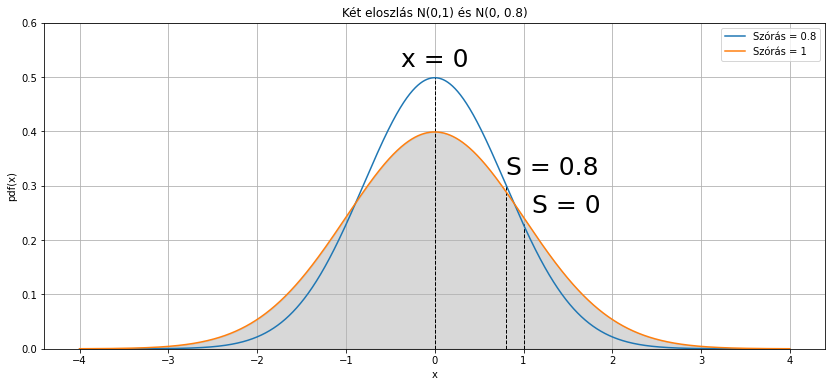

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

x  = np.arange(-4, 4, 0.001)
px = np.arange(-4, 4, 0.01)

ax.plot(x, stats.norm.pdf(x, scale=0.8), label="Sz√≥r√°s = 0.8")
ax.plot(x, stats.norm.pdf(x), label="Sz√≥r√°s = 1"); ax.set_title("K√©t eloszl√°s N(0,1) √©s N(0, 0.8)"); ax.set_xlabel('x')
ax.set_ylabel('pdf(x)'); ax.grid(True); ax.set_ylim(0,0.6)
ax.fill_between(px,stats.norm.pdf(px),alpha=0.3, color='grey')

ax.vlines(0, 0, 0.5, colors='black', linestyles='--', lw=1)
ax.text(0,0.52,'x = %s' % (round(0, 2)), fontsize=25, horizontalalignment='center')

ax.vlines(1, 0, 0.23, colors='black', linestyles='--', lw=1)
ax.text(1 + 0.1,0.25,'S = %s' % (round(0,2)), fontsize=25, horizontalalignment='left')

ax.vlines(0.8, 0, 0.3, colors='black', linestyles='--', lw=1)
ax.text(0.8 ,0.32,'S = %s' % (round(0.8, 2)), fontsize=25, horizontalalignment='left')

ax.legend()
plt.show()

*a, Figyelj√ºk meg, hogy mi t√∂rt√©nne akkor, ha a k√©tmint√°s t-pr√≥b√°val csak az √°tlagok egyez≈ës√©g√©r≈ël d√∂nten√©nk! Azt mondan√°nk, hogy a k√©t minta megegyezik, holott a sz√≥r√°sokb√≥l meghat√°rozott variancia r√°mutat a mint√°k k√ºl√∂nb√∂z≈ës√©g√©re.*


A varianci√°k egyez√©s√©nek meg√°llap√≠t√°sa az F-pr√≥ba seg√≠ts√©g√©vel t√∂rt√©nik, amelyet bemutatunk a k√©zi sz√°m√≠t√°s r√©szben. Ha az F-pr√≥ba seg√≠ts√©g√©vel azt √°llap√≠tjuk meg, hogy a varianci√°k egyeznek, akkor a k√©tmint√°s t-pr√≥b√°t alkalmazzhatjuk.

A statisztik√°ban az F-pr√≥ba a sz√≥r√°sn√©gyzetek egyenl≈ës√©g√©t vizsg√°l√≥ elj√°r√°s, melyn√©l a nullhipot√©zis, hogy k√©t norm√°lis eloszl√°s√∫ mint√°nak azonos a varianci√°ja.

K√©t csoport teljes√≠tm√©nye azonos √°tlagteljes√≠tm√©ny eset√©n is lehet k√ºl√∂nb√∂z≈ë az elt√©r≈ë sz√≥r√°s miatt. (l√°sd fenti √°bra)

A pr√≥ba nagyon √©rz√©keny a normalit√°s megl√©t√©re, ez√©rt a mint√°k elemz√©s√©n√©l minden olyan esetben, ahol s√©r√ºl a normalit√°s feltev√©se, nem javasolt a pr√≥ba haszn√°lata.

Ha $X$ √©s $Y$ f√ºggetlen minta k√©t popul√°ci√≥b√≥l, akkor a $H0: \sigma_{x}^{2} = \sigma_{y}^{2}$, hogy a k√©t popul√°ci√≥ varianci√°ja egyenl≈ë.

$$F = \frac{1/n \sum_{i=1}^{n}(x_i - \overline{x})^2}{1/m \sum_{i=1}^{m}(y_i - \overline{y})^2}$$

A tapasztalati minta eset√©ben az $\sigma$ helyett a tapasztalati varianci√°t haszn√°ljuk.

 F-nek F-eloszl√°sa van, de az F-statisztika eloszl√°sa k√ºl√∂nb√∂z≈ë mintanagys√°gok eset√©n k√ºl√∂nb√∂z≈ë. Azt, hogy melyik F-eloszl√°st kell v√°lasztanunk, azaz az F-eloszl√°s param√©tereit a mint√°k szabads√°gi foka mutatja meg, ami n ‚Äì 1 √©s m ‚Äì 1.

Adott szignifikanciaszint (szok√°sos p = 0,05 = 5%-ot v√°lasztani) mellett kikeress√ºk F(n‚Äì1, m‚Äì1) √©rt√©k√©t t√°bl√°zatb√≥l, ez lesz a kritikus √©rt√©k. Ha Fmegfigyelt ‚â§ Fkritikus, akkor **elfogadjuk a H0 nullhipot√©zist**, azaz a sz√≥r√°sn√©gyzetek egyenl≈ës√©ge igaz, k√ºl√∂nben elvetj√ºk.


## De hogyan n√©z ki a az F-pr√≥ba

$$ F = \frac{max(S_x^{2}, S_y^{2})}{min(S_x^{2}, S_y^{2})}$$

Ahol a sz√°ml√°l√≥ba ker√ºl a nagyobb sz√≥r√°s varianci√°ja (sz√≥r√°sn√©gyzet), a nevez≈ëbe pedig a kisebb sz√≥r√°s n√©gyzete (varianci√°ja). Az itt kapott √©rt√©ket az F t√°bl√°zatb√≥l keress√ºk meg, ahol szabads√°gfok (df) a sz√°ml√°l√≥ban szerepl≈ë (sz√≥r√°shoz tartoz√≥ elemsz√°m-1), illetve a nevez≈ëben szerepl≈ë (sz√≥r√°shoz tartoz√≥ elemsz√°m-1). <a href="https://www.stat.purdue.edu/~jtroisi/STAT350Spring2015/tables/FTable.pdf">F t√°bl√°zat itt tal√°lhat√≥.</a>

Amennyiben az √°ltalunk kapott F √©rt√©k nagyobb, mint a t√°bl√°zatban szerepl≈ë F √©rt√©k, akkor **elvetj√ºk a nullhipot√©zist**, vagyis a varianci√°k elt√©r≈ëek.


## Az F-eloszl√°s

Egy folytonos val√≥sz√≠n≈±s√©gi eloszl√°s. Ha $X$ val√≥sz√≠n≈±s√©gi v√°ltoz√≥ F-eloszl√°s√∫ $d_1$ √©s $d_2$ param√©terekkel akkor $X \sim F(d_1, d_2) akkor $X$ val√≥sz√≠n≈±s√©g s≈±r≈±s√©gf√ºggv√©nye

$$F(x, d_1, d_2) = \frac{\sqrt{\frac{(d_1 x)^{d_1}d_2^{d_2}}{(d_1 x + d_2)^{d_1+d_2}}}}{xB(\frac{d_1}{2}, \frac{d_2}{2}}$$

A k√©pletben a $B$ a b√©ta-f√ºggv√©ny. <a href="https://hu.wikipedia.org/wiki/B%C3%A9ta-f%C3%BCggv%C3%A9ny">(link)</a>

## P√©lda az F-eloszl√°sf√ºggv√©nyre

161.44763879758827
199.49999999999972
19.296409652017232
19.39589672357173
1.3917195516552203


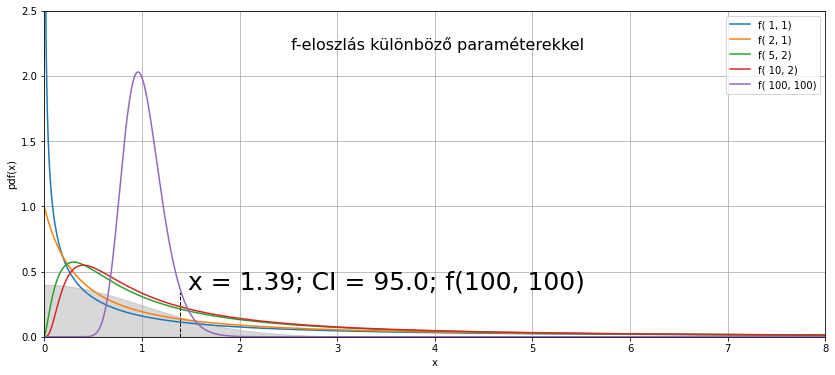

In [ ]:
x = np.arange(0, 8, 0.01)

d1 = [1, 2, 5, 10, 100]
d2 = [1, 1, 2, 2, 100]

alpha = 0.95

fig, ax = plt.subplots(figsize=(14,6))

px = np.arange(0, 8, 0.01)

for a, i in enumerate(d1):
  j = d2[a]
  f = stats.f.pdf(x, dfn = i, dfd = j)
  ax.plot(x, f, label='f( ' + str(i) + ', ' + str(j) + ')')
  c = stats.f.ppf(alpha, dfn = i, dfd = j)
  print(c)
  ax.vlines(c, 0, 0.34, colors='black', linestyles='--', lw=1)
  if( c < 8):
    ax.text(c, 0.37,' x = ' + str(round(c,2)) + '; CI = ' + str(alpha*100) + '; f(' + str(i) + ', ' + str(j) + ')', fontsize=25, horizontalalignment='left')

ax.text(4, 2.20,' f-eloszl√°s k√ºl√∂nb√∂z≈ë param√©terekkel', fontsize=16, horizontalalignment='center')

# ax.set_title('f-eloszl√°s k√ºl√∂nb√∂z≈ë param√©terekkel')

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)'); ax.grid(True); ax.set_ylim(0,2.5); ax.set_xlim(0, 8)
ax.fill_between(px,stats.norm.pdf(px),alpha=0.3, color='grey')

ax.legend()
plt.show()

<a name="fuggetlen-mintas-t-proba"></a>

## F√ºggetlen mint√°s t-pr√≥ba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>


In [ ]:
# Tegy√ºk fel, hogy csak a mint√°k √°tlaga √©s √°tlagt√≥l val√≥ √°tlagos elt√©r√©se ismert

mean_ferfi = df['male'].mean()
mean_no    = df['female'].mean()

std_ferfi = df['male'].std()
std_no    = df['female'].std()

n_ferfi = df['male'].count()
n_no    = df['female'].count()

print(mean_ferfi)
print(mean_no)

print(std_ferfi)
print(std_no)

print(n_ferfi)
print(n_no)

stats.ttest_ind_from_stats(mean_ferfi, std_ferfi, n_ferfi, mean_no, std_no, n_no)

# Mivel a pr√≥b√°hoz taroz

168.6
158.6
11.306262819666294
11.306262819666294
20
20


Ttest_indResult(statistic=2.7969256602348413, pvalue=0.008051817012053871)

In [ ]:
stats.ttest_ind_from_stats(156, 10, 20, 160, 20, 20)

Ttest_indResult(statistic=-0.8, pvalue=0.4286838276590448)

<a name="egymintas-t-proba (2)"></a>

## Egymint√°s t-pr√≥ba (2)<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

Egymint√°s t-pr√≥b√°val hat√°rozhatjuk meg, hogy egy adott mint√°ban megfigyelt √°tlag, k√ºl√∂nb√∂zik-e az ismert popul√°ci√≥s √°tlagt√≥l.


Al√°bbi p√©ld√°ban azt a hipot√©zist vizsg√°lom, hogy egy 20 elem≈± mint√°ban a minta √°tlag sz√°rmazhat egy adott √°tlag√∫ √©s eloszl√°s√∫ popul√°ci√≥b√≥l.

In [ ]:
# Gener√°lok 20 esetet, N(170, 10):

np.random.seed(1)
mu, sigma = 170, 10
maleRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
maleInts = np.round(maleRnd)

In [ ]:
# Gener√°lok 20 esetet, N(160, 10):

np.random.seed(1)
mu, sigma = 160, 10
femaleRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
femaleInts = np.round(femaleRnd)

In [ ]:
df = pd.DataFrame(maleInts, columns = ['male'])
df['female'] = femaleInts

In [ ]:
# H0: a popul√°ci√≥s √°tlag 170

stats.ttest_1samp(df['male'], 170)

# A p-√©rt√©k a sz√°m√≠tott val√≥sz√≠n≈±s√©ge annak, hogy a megfigyelt jelens√©get tapasztaljuk, ha a vizsg√°latunk nullhipot√©zise igaz.

Ttest_1sampResult(statistic=-0.5537630282314834, pvalue=0.5861996925691939)

In [ ]:
# H0: a popul√°ci√≥s √°tlag > 170

1 - stats.t.cdf(-0.5608359734682287, 20)

0.7094305512705925

<a name="khi-negyzet-proba"></a>

## Khi-n√©gyzet pr√≥ba<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

A val√≥sz√≠n≈±s√©gsz√°m√≠t√°s elm√©let√©ben √©s a statisztika ter√ºlet√©n, a $k$ szabads√°gfok√∫ kh√≠-n√©gyzet eloszl√°s $k$ darab f√ºggetlen norm√°lis eloszl√°s√∫ val√≥sz√≠n≈±s√©gi v√°ltoz√≥nak a n√©gyzet√∂sszege.

$Q \sim \chi^2(k)$

A khi-n√©gyzet eloszl√°snak egy param√©tere van, a $k$, egy pozit√≠v eg√©sz, mely a szabads√°gfok m√©rt√©ke.

### Definici√≥

Ha $Z1, ..., Zk$ f√ºggetlen, standard norm√°lis eloszl√°s√∫ val√≥sz√≠n≈±s√©gi v√°ltoz√≥k, akkor a n√©gyzeteik √∂sszege, a kh√≠-n√©gyzet eloszl√°s szerint oszlik el, $k$ szabads√°gfokkal. A khi-n√©gyzet eloszl√°snak egy param√©tere van, a $k$, egy pozit√≠v eg√©sz, mely a szabads√°gfok m√©rt√©ke.

$Q = \sum_{i=1}^{k}Z_{i}^{2}$

A val√≥sz√≠n≈±s√©g s≈±r≈±s√©gf√ºggv√©nye:

$$
f(x;k) = \left\{
    \begin{array}\\
        \frac{x^{(k/2)-1}e^{-x/2}}{2^{k/2}\Gamma(\frac{k}{2})} & \mbox{x > 0} \\
        0 & \mbox{m√°s esetben}
    \end{array}
\right.
$$

ahol $\Gamma(\frac{k}{2})$ a gamma-eloszl√°st jel√∂li.

### Aszimptotikus tulajdons√°gok

A centr√°lis hat√°reloszl√°s t√©tel√©b≈ël k√∂vetkez≈ëen, mivel a khi-n√©gyzet eloszl√°s f√ºggetlen k szabads√°gfok√∫ val√≥sz√≠n≈±s√©gi v√°ltoz√≥k szumm√°ja, v√©ges √°tlaggal √©s sz√≥r√°sn√©gyzettel, konverg√°l a norm√°lis eloszl√°shoz nagy k √©rt√©kekn√©l (k > 50).



<a name="korrelacio"></a>

## A korrel√°ci√≥<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>


A t√∂bbv√°ltoz√≥s statisztikai pr√≥b√°k, ellent√©tben p√©ld√°ul az egyszer≈± szignifikanciapr√≥b√°kkal, a legalkalmasabb m√≥dszerek az adatok/v√°ltoz√≥k k√∂z√∂tti √∂sszef√ºgg√©sek felt√°r√°s√°ra. B√°rhogy vizsg√°l√≥dunk, alapvet≈ëen k√©t met√≥dust fogunk alkalmazni: az el≈ëfelt√©telez√©ssel b√≠r√≥ felt√°r√°sokat √©s az el≈ëfelt√©telez√©ssel nem b√≠r√≥ felt√°r√°sokat. 

√Åltal√°noss√°gban a korrel√°ci√≥sz√°m√≠t√°st ink√°bb akkor haszn√°ljuk, amikor nincs szil√°rd el≈ëfelt√©telez√©s√ºnk a v√°ltoz√≥k k√∂z√∂tti kapcsolat ir√°ny√°r√≥l.

A korrel√°ci√≥sz√°m√≠t√°s eset√©ben eml√©kezz√ºnk mindig arra, hogy a v√°ltoz√≥k val√≥sz√≠n≈±s√©gi v√°ltoz√≥k, teh√°t oda-vissza jelezhetnek ok-okozati kapcsolatot, melynek helyess√©g√©r≈ël val√≥ d√∂nt√©s rajtunk m√∫lik.

P√©lda:

Naps√ºt√©ses √≥r√°k sz√°ma/nap √©s Napi √°tlagos k√∂z√©ph≈ëm√©rs√©klet. Ezen a nyilv√°nval√≥an egyszer≈± p√©ld√°n kereszt√ºl el lehet k√©pzelni, hogy van valamilyen egyenes ar√°ny√∫ √∂sszef√ºgg√©s a k√©t v√°ltoz√≥ k√∂z√∂tt.

Ellent√©tes ir√°ny√∫ korrel√°ci√≥ is lehets√©ges. Ebben az esetben az egyik adatsor √©rt√©keinek a v√°ltoz√°sa ellent√©tesen mozgatja a m√°sik adatsor √©rt√©keinek a v√°ltoz√°s√°t.

Ahhoz, hogy a korrel√°ci√≥t meg√©rts√ºk, el≈ëbb tiszt√°zzk a **Kovariancia** fogalm√°t.





## Mi a kovariancia?

N sz√°m√∫ X, Y val√≥s sz√°m√∫ √©rt√©kp√°rokra a minta kovarianci√°ja:

$$cov(X,Y) = \sigma{XY} = \sum_{x,y}(x-\overline{x})(y-\overline{y})$$

Teh√°t a ha a k√©t v√°ltoz√≥nk $x$ √©s $y$ akkor a minden egyes elemre kivonjuk az adott v√°ltoz√≥ √°tlag√°t √©s √∂sszeszorozzuk a m√°sik v√°ltoz√≥ √°tlagt√≥l val√≥ elt√©r√©s√©vel.

#### A v√°ltoz√≥ kovarianci√°ja √∂nmag√°val
A sz√≥r√°s a kovariancia egy speci√°lis esete, ahol a k√©t v√°ltoz√≥ azonos.

${\displaystyle \operatorname {cov} (X,X)=\operatorname {var} (X)\equiv \sigma ^{2}(X)\equiv \sigma _{X}^{2}.}$


#### K√©t v√°ltoz√≥ korrel√°latlans√°ga, f√ºggetlens√©ge
K√©t olyan v√°ltoz√≥t amelynek a kovari√°nci√°ja 0 korrel√°latlannak h√≠vunk.

Ha $X$ √©s $Y$ egym√°st√≥l f√ºggetlen val√≥sz√≠n≈±s√©gi v√°ltoz√≥k, akkor a kovarianci√°juk 0. F√ºggetlens√©g eset√©n a a k√©t v√°ltoz√≥ szorzat√°nak v√°rhat√≥ √©rt√©ke egyenl≈ë a a k√©t v√°ltoz√≥ v√°rhat√≥ √©rt√©k√©nek szorzat√°val.

${E} [XY]= {E} [X]\cdot \operatorname {E} [Y]$



Hab√°r ez az √∂sszef√ºgg√©s nem mind√≠g igaz. P√©ld√°ul, legyen $X$ egyenletes eloszl√∫ v√°ltoz√≥ $[-1,1]$ tartom√°nyban √©s legye $Y=X^{2}$. Tiszt√°n bel√°that√≥, hogy $X$ √©s $Y$ nem f√ºggetlenek, de

\begin{aligned}\operatorname {cov} (X,Y)&=\operatorname {cov} \left(X,X^{2}\right)\\&=\operatorname {E} \left[X\cdot X^{2}\right]-\operatorname {E} [X]\cdot \operatorname {E} \left[X^{2}\right]\\&=\operatorname {E} \left[X^{3}\right]-\operatorname {E} [X]\operatorname {E} \left[X^{2}\right]\\&=0-0\cdot \operatorname {E} [X^{2}]\\&=0.\end{aligned}


alapj√°n a k√©t v√°ltoz√≥ Covarianci√°ja 0. Ebben az esetben az $Y$ √©s $X$ v√°ltoz√≥ k√∂z√∂tti kapcsolat nem-linearis. A korrel√°ci√≥ √©s a kovariancia linearis kapcsolatot vizsg√°lja k√©t v√°ltoz√≥ k√∂z√∂tt. Fenti p√©lda azt mutatja, hogy ha k√©t v√°ltoz√≥ k√∂z√∂tt a kovariancia 0, az nem felt√©tlen√ºl jelenti azt, hogy f√ºggetlenek.

#### A minta kovarianci√°j√°nak kisz√°mol√°sa

A minta kovarianci√°ja $K$ sz√°m√∫ v√°ltoz√≥ $N$ megfigyel√©se alapj√°n $K\times K$ matrix $\overline{\mathbf {q}} = \left[q_{jk}\right]$

$ q_{jk}={\frac {1}{N-1}}\sum _{i=1}^{N}\left(X_{ij}-{\bar {X}}_{j}\right)\left(X_{ik}-{\bar {X}}_{k}\right)$, amely a kovariancia becsl√©se $j$ √©s $k$ v√°ltoz√≥ k√∂z√∂tt.

In [ ]:
# P√©lda:

# K√©t v√°ltoz√≥ f√ºggetlen ha E(xy) = E(x) * E(y)

a = np.array([1,2,3,4,5])
b = np.array([30,40,30,40,30])

m1 = a.mean()
m2 = b.mean()

szorzat = a*b

exy = szorzat.mean()

exey = m1*m2

print(exy)
print(exey)

102.0
102.0


In [ ]:
# Loading built-in Datasets:
iris = sns.load_dataset('iris')

petal = iris.loc[:,['petal_length', 'petal_width', 'species']]

def covariance(x, y):
  mean_x = x.mean()
  mean_y = y.mean()
  centered_x = x - mean_x
  centered_y = y - mean_y
  product = centered_x * centered_y
  sum = product.sum()
  cov = sum * (1/(x.size - 1))
  return cov

# Ellen≈ërizz√ºk a saj√°t sz√°m√≠t√°sunk helyess√©g√©t
print(covariance(petal['petal_length'].values, petal['petal_width'].values))

# P√©lda a kovariancia m√°trixra (itt k√©t v√°ltoz√≥ eset√©n)
petal.cov()

1.2956093959731543


petal_length  petal_width
petal_length      3.116278     1.295609
petal_width       1.295609     0.581006



## A korrel√°ci√≥

A kovarianci√°nak viszont van egy h√°tr√°nya amit a korrel√°ci√≥ ki tud k√ºsz√∂b√∂lni.

$$r_{X,Y} = Corr(X,Y) = \frac{\sum_{i=1}^{n}(x_i-\overline{x})*(y_i-\overline{y})}{(n-1)*S_x*S_y}$$

ahol $\overline{x}$ √©s $\overline{y}$ rendre X √©s Y v√°ltoz√≥ mintabeli √°tlag√°t, √©s $S_x$ √©s $S_y$ a korrig√°lt sz√≥r√°st jel√∂lik.

## A korrel√°ci√≥hoz tartoz√≥ szignifikancia szint sz√°m√≠t√°sa

Az egy√ºtthat√≥ szignifikanci√°j√°na vizsg√°lat√°hoz a $H0: r = 0$ hipot√©zist vizsg√°ljuk. $H0$ elutas√≠t√°sa f√ºgg a korrel√°ci√≥ nagys√°g√°t√≥l √©s az f szabads√°gfok nagys√°g√°t√≥l, melyet $f = n - 2$ alapj√°n kapunk. A szignifikancia kisz√°m√≠t√°s√°hoz a  m√°r kor√°bban megismert t eloszl√°s√∫ statisztik√°t haszn√°lunk.

$$t = r * \sqrt{\frac{n-2}{1-r^2}}$$

A kapott t √©rt√©k √©s a **t eloszl√°s√∫ v√°ltoz√≥ eloszl√°s√°nak statisztikai t√°bl√°ja** seg√≠ts√©g√©vel hat√°rozhatjuk meg, hogy az elt√©r√©s szignifik√°ns-e. Ha r szignifik√°nsan k√ºl√∂nb√∂zik 0-t√≥l, akkor az alternat√≠v hipot√©zist fogadjuk el, hogy $H1: r \neq 0$ vagyis a k√©t $X$ √©s $Y$ v√°ltoz√≥ a minta beli megfigyelt √©rt√©keik alapj√°n line√°risan nem f√ºggetlenek egym√°st√≥l.

## Megjegyz√©s:

> A korrel√°ci√≥ √©rz√©keny a kiugr√≥ adatokra. Ezeket k√©s≈ëbb egy √°br√°n fogom bemutatni. (l√°sd lent)




In [ ]:
%%capture
!pip install imgaug==0.2.5
!pip install scipy==1.6.2

import math
import numpy as np
import pandas as pd
import scipy as scipy
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [ ]:
# Gener√°lok n esetet, N(170, 10):

n = 100000
mu, sigma = 170, 10
randomNums = np.random.normal(loc = mu, scale = sigma, size = n)
randomInts = np.round(randomNums)


Vegy√ºnk mint√°t egy normalis (Gaussian) eloszl√°s√∫ v√°ltoz√≥b√≥l.

A norm√°lis eloszl√°s els≈ë deriv√°ltja a s≈±r≈±s√©gf√ºggv√©nye, amelyenek alakja harangg√∂rbe.

A term√©szetben gyakran figyelhet√ºnk meg norm√°lis eloszl√°sokat.

A norm√°lis eloszl√°shoz s≈±r≈±s√©g f√ºggv√©nye:

$$
p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }
$$

$\mu$ az √°tlag √©s $\sigma$ a standard elt√©r√©s (standard deviation). A standard elt√©r√©s n√©gyzet√©t, $\sigma^2$, h√≠vj√°k varianci√°nak.

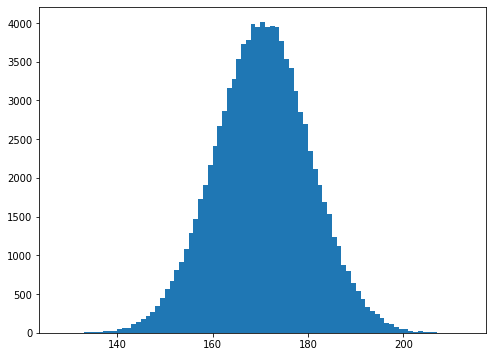

In [ ]:

# Plot:
fig, ax = plt.subplots(figsize=(8,6))
axis = np.arange(start=min(randomInts), stop = max(randomInts) + 1)
plt.hist(randomInts, bins = axis)
plt.show()


In [ ]:
# Ellen≈ërizz√ºk az √°tlagot

# Az elm√©leti √°tlag √©s a mitabeli √°tlag k√ºl√∂nbs√©ge
print('{:.5f}'.format( abs(mu - np.mean(randomInts)) ))


0.00938


997
3.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


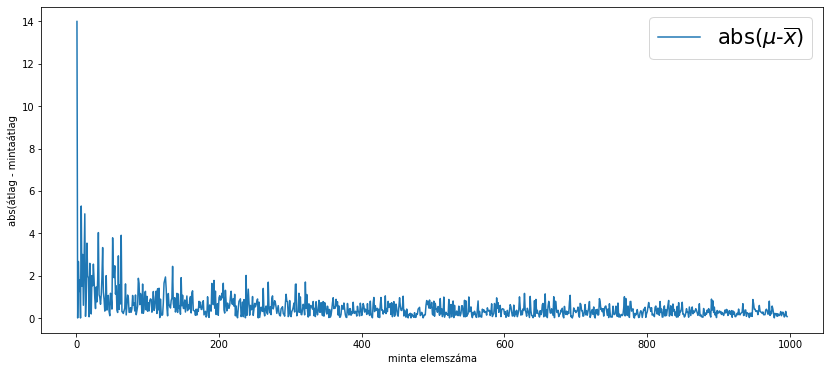

In [ ]:
# Csak egy gondolatk√≠s√©rlet

# 1. Vegy√ºnk mint√°t egy norm√°lis eloszl√°sb√≥l

# 2. M√©rj√ºk meg a minta √°tlag√°t

# 3. N√∂velj√ºk az elemsz√°mot √©s n√©zz√ºk meg, hogyan v√°ltozik, a minta
#    √©s a t√©nyleges eloszl√°s √°tlaga k√∂z√∂tti k√ºl√∂nbs√©g


n = 100000
mu, sigma = 170, 10
randomNums = np.random.normal(loc = mu, scale = sigma, size = n)
randomInts = np.round(randomNums)

tarolo = np.arange(3, 1000, 1, dtype='float64')


print(tarolo.size)
print(tarolo[0])

for i, j in enumerate(tarolo):
  randomNums = np.random.normal(loc = mu, scale = sigma, size = i)
  randomInts = np.round(randomNums)
  tarolo[i] = abs(mu - randomInts.mean())

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(tarolo, label = 'abs($\mu$-$\overline{x})$')
ax.set_xlabel('minta elemsz√°ma')
ax.set_ylabel('abs(√°tlag - minta√°tlag')
ax.legend(fontsize=21)
plt.show()


> Amire itt tal√°n √©rdemes lehet felh√≠vnom a figyelmet - az eny√©met megragadta - hogy kis elemsz√°m eset√©n is el≈ëfordulhat, hogy olyan mint√°t v√°lasztunk a sokas√°gb√≥l amelynek √°tlaga k√∂zel esik a sokas√°g √°tlag√°hoz. √ñnmag√°ban a mintaelemsz√°m n√∂vel√©se nem garant√°lja, hogy n+1 mintaelmsz√°m eset√©n a mita√°tlag √©s a sokas√°g √°tlag√°nak k√ºl√∂nbs√©ge kisebb lesz mint az n elem≈± esetben.

> De amit √©rdemes√©szrevenni, hogy a mintaelemsz√°m n√∂vel√©s√©vel egyre kev√©sb√© fordul el≈ë kiugr√≥ eset a minta √©s a sokas√°g √°tlag√°nak k√ºl√∂nbs√©ge k√∂z√∂tt.

<a name="normalis_eloszlas"></a>

> [vissza a tartalomhoz](#tartalom)<br>

## A norm√°lis eloszl√°s - Bevezet√©s
tmp

tmp
tmp
tmp

## A norm√°lis eloszl√°s s≈±r≈±s√©gf√ºggv√©nye

## A val√≥sz√≠n≈±s√©g kisz√°m√≠t√°sa norm√°li eloszl√°s seg√≠ts√©g√©vel

Mivel a norm√°lis eloszl√°sf√ºggv√©ny folytonos ez√©rt a f√ºggv√©ny alatti ter√ºlet adja a val√≥sz√≠n≈±s√©get. Teh√°t integr√°lnunk kell a s≈±r≈±s√©gf√ºggv√©nyt. A norm√°lis eloszl√°snak megvan az nagyon j√≥ tulajdons√°ga, hogy b√°rmilyen param√©ter≈±, mind√≠g igaz lesz r√°, hogy:

> Az √°tlagt√≥l +/- 1 standard sz√≥r√°snyira m√©rt ter√ºlet a teljes ter√ºlet 68%-a.<br>
Az √°tlagt√≥l +/- 2 standard sz√≥r√°snyira m√©rt ter√ºlet a teljes ter√ºlet 95%-a.<br>
Az √°tlagt√≥l +/- 3 standard sz√≥r√°snyira m√©rt ter√ºlet a teljes ter√ºlet 99.7%-a.<br>

A s≈±r≈±s√©gf√ºggv√©ny alatti ter√ºlet 1 lesz, mert ez adja meg a biztos esem√©ny bek√∂vetkez√©s√©nek val√≥sz√≠n≈ës√©g√©t. Annak val√≥sz√≠n≈ës√©g√©t, hogy egy √©rt√©k egy bizonyos szakaszra esik, a s≈±r≈±s√©gf√ºggv√©ny adott szakasz f√∂l√© esƒ± r√©sze alatti ter√ºletk√©nt defini√°lhatjuk. Folytonos v√°ltoz√≥k eloszl√°sai, √≠gy a norm√°l eloszl√°s eset√©n is defini√°lhat√≥ a kumulat√≠v val√≥sz√≠n≈ës√©g, ami teh√°t egy adott √©rt√©k vagy ann√°l kisebb √©rt√©k bek√∂vetkez√©s√©nek val√≥sz√≠n≈ës√©ge.

### Centr√°lis hat√°reloszl√°st√©tel

> Tudom√°nyos alapj√°ul a centr√°lis hat√°reloszl√°s elm√©let szolg√°l, mely szerint ha
sokszor vesz√ºnk megfelelƒ±en nagy, azonos elemsz√°m√∫ mint√°t, akkor a mint√°k
√°tlagai mindig norm√°l eloszl√°st k√∂vetnek, f√ºggetlen√ºl az eredeti eloszl√°st√≥l.

Norm√°lis eloszl√°st k√∂vet sz√°mos a term√©szetben megfigyelhet≈ë jelens√©g √©s val√≥sz√≠n≈±s√©gi v√°ltoz√≥, mint amilyen a testmagass√°g, a testt√∂meg, a v√©rnyom√°s, a az intelligencia h√°nyados.

Az √°tlag k√∂r√ºli √©rt√©kek val√≥sz√≠n≈ës√©ge nagyobb, mint extr√©mebb √©rt√©kek elƒ±fordul√°s√°√©, mert √°tlagos, vagy ahhoz k√∂zeli √©rt√©kek a befoly√°sol√≥ faktorok √©rt√©keinek l√©nyegesen t√∂bbf√©le kombin√°ci√≥j√°nak eredm√©nyek√©ppen kialakulhatnak, mint extr√©mebb √©rt√©kek.


A standard norm√°lis eloszl√°s egy 0 √°tlag√∫ √©s 1 egys√©g standard sz√≥r√°s√∫ norm√°lis eloszl√°s.

$Z = (X-\mu)/\sigma$

Teh√°t a z √©r√©tket felfoghatjuk √∫gy is, hogy az adott √©rt√©k milyen messze van az √°tlagt√≥l (miut√°n az adatokat standardiz√°ltuk, teh√°t 0 √°tlagura √©s 1 egys√©g sz√≥r√°sura hoztuk)

Term√©szetesen ma m√°r nem kell z-t√°bl√°zatokb√≥l kikeresn√ºnk, hogy egy adott z-√©rt√©k mekkora ter√ºletet fed le az eloszl√°sf≈±ggv√©nyb≈ël. Ezt az √©rt√©ket a statisztikai programok seg√≠ts√©g√©vel kapjuk. (mint az al√°bbi p√©ld√°ban)



-0.021400233916549105


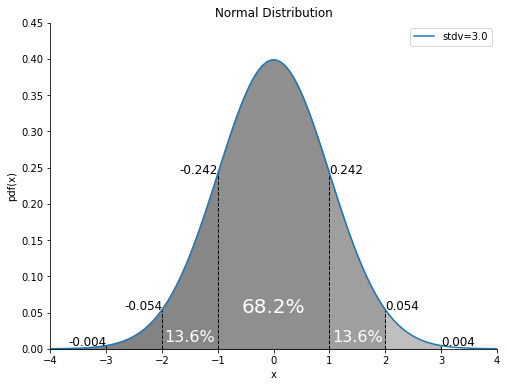

In [ ]:
x = np.linspace(-4,4,100)
stdvs = [1.0, 2.0, 3.0]

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, norm.pdf(x,scale=1), label='stdv=%.1f' % s)

for s in stdvs:
  pdf = stats.norm.pdf(x=s, loc=0, scale=1)
  ax.vlines(s, 0, pdf, linestyle='--', lw=1)
  px=np.arange(-4,s,0.01)
  ax.fill_between(px,norm.pdf(px),alpha=0.5, color='grey')
  ax.text(s, pdf, '' + str(round(pdf, 3)), fontsize=12, horizontalalignment='left')
  ax.vlines(0-s, 0, pdf, linestyle='--', lw=1)
  px=np.arange(-4,0-s,0.01)
  ax.fill_between(px,norm.pdf(px),alpha=0.5, color='grey')
  ax.text(0-s, pdf, '' + str(0-round(pdf, 3)), fontsize=12, horizontalalignment='right')

p1 = stats.norm.cdf( 0, loc=0, scale=1) - stats.norm.cdf(1, loc=0, scale=1)
p2 = stats.norm.cdf( 1, loc=0, scale=1) - stats.norm.cdf(2, loc=0, scale=1)
p3 = stats.norm.cdf( 2, loc=0, scale=1) - stats.norm.cdf(3, loc=0, scale=1)

ax.text(0, 0.05, '' + str(2*100*round(-p1, 3)) +'%', fontsize=20, color='white', horizontalalignment='center')
ax.text(-1.5, 0.01, '13.6%', fontsize=16, color='white', horizontalalignment='center')
ax.text( 1.5, 0.01, '13.6%', fontsize=16, color='white', horizontalalignment='center')

print(p3)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45); ax.set_xlim(-4,4)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


## Annak a val√≥sz√≠n≈±s√©ge, hogy a kiv√°lasztott √©rt√©k nagyobb mint $P(x \geq 4.5)$

Annak a val√≥sz√≠n≈±s√©ge, hogy a kiv√°lasztott eset √©rt√©ke nagyobb mint $P(x \geq 4.5) = 0.2118$, ha a popul√°ci√≥ amib≈ël v√°lasztottuk norm√°lis eloszl√°st k√∂vet $N(5.3, 1)$ param√©terkkel.

Ezt az √©rt√©ket √∫gy kapjuk meg, hogy vesz√ºk a kummulat√≠v eloszl√°sf≈±ggv√©nyt (err≈ël k√©s≈ëbb) √©s megn√©zz√ºk, hogy milyen √©rt√©ket vezs fel $x = 4.5$ pontban. Ez az √©rt√©k $0.2118$ lesz annak a val√≥sz√≠n≈±s√©ge, hogy egy $N(5.3, 1)$ norm√°lis eloszl√°s√∫ popul√°ci√≥b√≥l v√©letlenszer≈±en kiv√°lasztva egy elemet a kapott √©rt√©k nagyobb mint $4.5$

Teh√°t mi annak a val√≥sz√≠n≈±s√©ge, hogy egy mint√°t kiv√°lasztva ebb≈ël az $N(5.3, 1)$ sokas√°gb√≥l a kapott √©rt√©k nagyobb mint 4.5?

A norm√°lis eloszl√°s f√ºggv√©nye harangg√∂rbe alak√∫. Szimetrikus a $x=\mu$ pontra √©s maximuma ott van ahol $x = \mu$



```
stats.norm(loc = 5.3 , scale = 1).cdf(4.5)

# 0.21185539858339675
```



In [ ]:
stats.norm(loc = 5.3 , scale = 1).cdf(4.5)

0.21185539858339675

## A norm√°lis eloszl√°s √°br√°zol√°sa

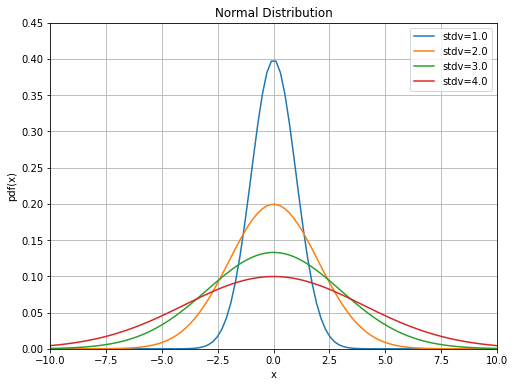

In [ ]:

x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]

fig, ax = plt.subplots(figsize=(8,6))

for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45); ax.set_xlim(-10,10)
ax.grid(True)

## A kumulat√≠v norm√°lis eloszl√°sf√ºggv√©ny

Egy $X$ val√≥sz√≠n≈±s√©gi v√°ltoz√≥ kumulat√≠v eloszl√°sf√ºggv√©nye x pontban felvett √©rt√©ke, annak a val√≥sz√≠n≈±s√©ge, hogy $P(X \leq x)$. Mivel a norm√°lis eloszl√°sf√ºggv√©ny folytonos ez√©rt a f√ºggv√©ny alatti ter√ºlet reprezent√°lja a fenti val√≥sz√≠n≈±s√©get.

$$P(X<=x) = F(x) = \int_{a}^{b} f(t) \,dt, where\ x\in \mathbb{R}$$


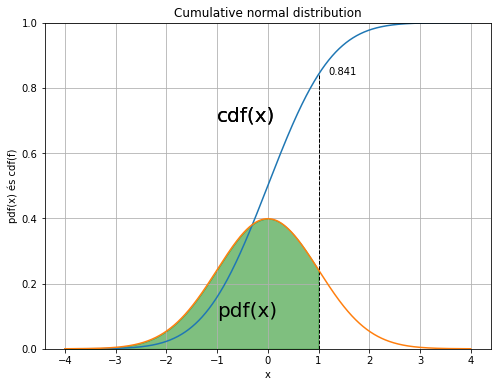

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

x= np.arange(-4,4,0.001)
ax.plot(x, norm.cdf(x))
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x) √©s cdf(f)')
ax.grid(True)

px=np.arange(-4,1,0.01)
ax.set_ylim(0,1)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
ax.text(-1,0.1,"pdf(x)", fontsize=20)
ax.text(-1,0.7,"cdf(x)", fontsize=20)
ax.text(-1,0.7,"cdf(x)", fontsize=20)

cdf = stats.norm.cdf(x=1, loc=0, scale=1)
ax.vlines(1, 0, cdf, linestyles='--', lw=1)
ax.text(1.2, cdf, '' + str(round(cdf,3)))

plt.show()


## Folytat√°s

Legyen az √°tlag 3 √©s a sz√≥r√°s 2,akkor annak a val√≥sz√≠n≈±s√©ge, hogy $P(X<2)$

$$X \sim N(3,2)$$


In [ ]:

kisebb_mint = stats.norm.cdf(x=2, loc=3, scale=2)
print(kisebb_mint)

fig, ax = plt.subplots(figsize=(8,6))

x= np.arange(-4,10,0.001)
ax.plot(x, stats.norm.cdf(x,loc=3,scale=2))
ax.plot(x, stats.norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

px=np.arange(-4,2,0.01)
ax.set_ylim(0,1)
ax.fill_between(px,stats.norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')

ax.text(-0.5,0.02,round(kisebb_mint,3), fontsize=20)

cdf = stats.norm.cdf(x=2, loc=3, scale=2)
ax.vlines(2, 0, cdf, linestyles='--', lw=2)
ax.text(2.2, cdf, '' + str(round(cdf,3)), horizontalalignment='left')
plt.show()

0.3085375387259869


Annak a val√≥sz√≠n≈±s√©ge, hogy egy adott tartom√°nyba esik, a k√©t kummulat√≠v eloszl√°sf√ºggv√©ny √©rt√©k√©t kell kivonni egym√°sb√≥l. Keress√ºk meg $P(0.5 < X < 2)$ a 1 √°tlaggal √©s 2 sz√≥r√°ssal rendelkez≈ë norm√°lis eloszl√°sf√ºggv√©ny alatti ter√ºletet $X \sim N(1,2)$

In [ ]:
norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)

0.2901687869569368

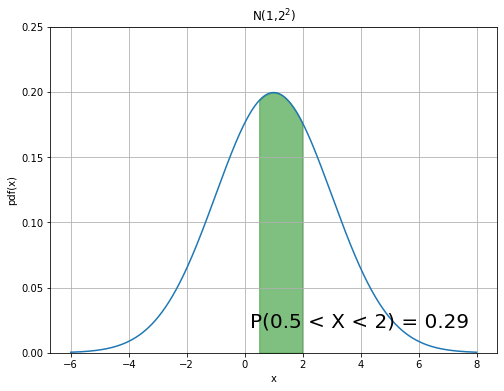

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("N(1,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.5,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='g')
pro=norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)
ax.text(0.2,0.02,"P(0.5 < X < 2) = %.2f" %round(pro,2), fontsize=20)
plt.show()

Ha annak a val√≥sz√≠n≈±s√©g√©t keress√ºk, hogy $P(X>4)$, akkor az 1-cdf (kumulat√≠v s≈±r≈±s√©gf√ºggv√©ny) alapj√°n sz√°molunk. P√©ld√°mban a norm.sf(x=4, loc=3, scale=2  annak az √©rt√©k√©vel t√©r vissza, hogy $P(X>4)$ ha $\mu=4$ √©s $\sigma = 2$

0.3085375387259869


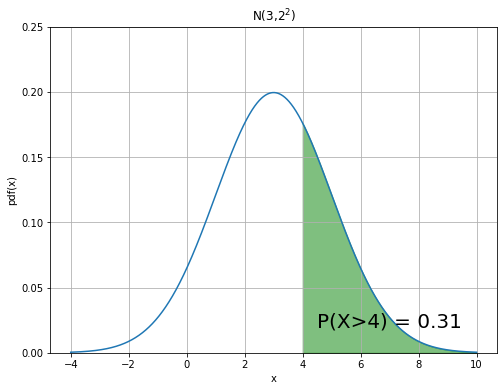

In [ ]:
gr4sf=norm.sf(x=4, loc=3, scale=2)
print(gr4sf)

fig, ax = plt.subplots(figsize=(8,6))
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
ax.text(4.5,0.02,"P(X>4) = %.2f" %(gr4sf), fontsize=20)
plt.show()

## Ha ford√≠tva indulunk ki
√©s a szignifikancia szint alapj√°n akarjuk meghat√°rozni, hogy az elosszl√°f√ºggv√©ny alattiti ter√ºlet hol lesz egyenl≈ë az adott szignifikancia √©rt√©k√©vel akkor a k√∂vetkez≈ë m√≥dszert haszn√°ljuk. $P(X<\alpha)$

### Percent point function
Ha adott egy norm√°lis eloszl√°s 1 √°tlaggal √©s 2 sz√≥r√°ssal akkor $P(X<\alpha) =0.506$; $X \sim N(1,2^{3})$

In [ ]:
norm.ppf(q=0.506, loc=1, scale=3)

1.045121010035907

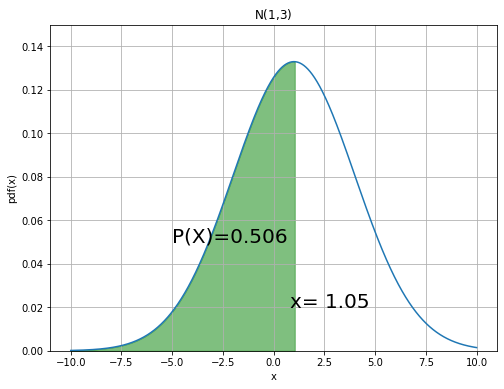

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
x= np.arange(-10,10,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=3))
ax.set_title("N(1,$3$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
xpoint=norm.ppf(q=0.506, loc=1, scale=3)
px=np.arange(-10,xpoint,0.01)
ax.set_ylim(0,0.15)
ax.fill_between(px,norm.pdf(px,loc=1,scale=3),alpha=0.5, color='g')
ax.text(.8,0.02,"x= %.2f" %xpoint, fontsize=20)
ax.text(-5,0.05,"P(X)=0.506", fontsize=20)
plt.show()

## Intervallum az √°tlag k√∂r√ºl

`norm.interval` az $\alpha$ sz√°zal√©k al√° es≈ë ter√ºlet k√©t v√©gpontj√°val t√©r vissza. P√©ld√°ul 0 √°tlag√∫ √©s 1 sztandard sz√≥r√°s√∫ f√ºggv√©ny eset√©n a  95% ter√ºlet ebben az esetben.

-1.959963984540054 1.959963984540054


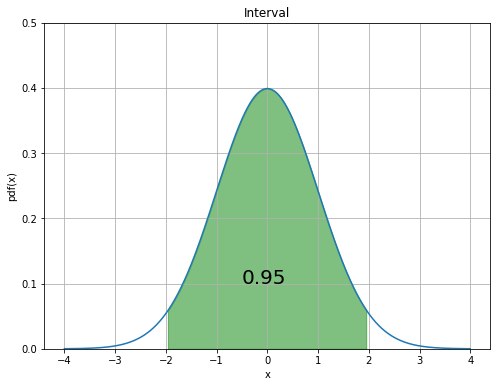

In [ ]:
a,b = norm.interval(alpha=0.95, loc=0, scale=1)
print(a,b)

fig, ax = plt.subplots(figsize=(8,6))
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Interval")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(a,b,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
ax.text(-0.5,0.1,"0.95", fontsize=20)
plt.show()

## Standard normalis eloszl√°s
Ha a ùúá=0 √©s a variancia=1, akkor standard norm√°lis eloszl√°sr√≥l besz√©l√ºnk. Enenek a f√ºggv√©nyn√©k a k√©plete:

$$
\Phi(x) = \frac{1}{\sqrt{ 2 \pi}}
e^{ - \frac{-x^2} {2} }
$$

## Standardized v√°ltoz√≥
Ha egy v√°ltoz√≥t √°tlagt√≥l vett elt√©r√©s√©t elosztjuk a v√°ltoz√≥ sz√≥r√°s√°val akkor az √∫gynevezett standardiz√°lt √©rt√©k√©hez (angol terminol√≥gi√°ban Z-score) jutunk, amely ùëç‚àºùëÅ(0,1) eloszl√°s√∫:

$$
Z = \frac{x - \mu}{\sigma}
$$

Ennek seg√≠ts√©g√©vel meg√°llap√≠that√≥, hogy egy adott √©rt√©k h√°ny sz√≥r√°snyira t√©r el az √°tlagt√≥l.

<a name="z-proba"></a>

## A z-pr√≥ba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

A z-pr√≥ba (tulajdonk√©ppen csak angol neve z-test, a magyarban u-pr√≥ba n√©ven szerepel √©s m√°r kor√°√°ban √≠rtam r√≥la - az eloszl√°s, a minta √°tlag√°t teszteli √∫gy. Ahhoz, hogy a z-pr√≥ba m≈±k√∂d√©s√©t pontosan meg√©rts√ºk ismern√ºk kell a norm√°lis eloszl√°st √©s annak sz√°mos tulajdons√°g√°t. Amit a z-pr√≥ba sor√°n felhaszn√°lunk az az, hogy a norm√°lis eloszl√°s s≈±r≈±s√©g f√ºggv√©nye j√≥l ismert √©s ki tudjuk sz√°m√≠tani a f√ºggv√©ny alatti ter√ºletet.

A k√∂zponti hat√°reloszl√°s t√©tele miatt sok statisztika k√∂zel norm√°lis eloszl√°st k√∂vet nagy mintaelemsz√°m eset√©ben. Ha a popul√°ci√≥s sz√≥r√≥d√°s nem ismert (√©s ez√©rt a mint√°b√≥l kell becs√ºln√ºnk) vagy a mintaelemsz√°m nem el√©g nagy (n < 30), akkor Student f√©le t-pr√≥b√°t kell alkalmaznunk.

### Hogyan v√©gezz√ºk el a z-pr√≥b√°t?

Ha van egy teszt statisztik√°nk amely k√∂zel norm√°lis eloszl√°s√∫, akkor:

1. Becs√ºlj√ºk meg T teszt statisztika v√°rhat√≥ √©rt√©k√©t ($\mu$) √©s sz√≥r√°s√°t ($S$)
2. Hat√°rozzuk meg, hogy egyoldali, vagy k√©toldali pr√≥b√°t fogunk alkalmazni.

Ha a hipot√©zis√ºnk:<br>
$H_0: \mu \geq \mu_0$ √©s az alternat√≠v hipot√©zis√ºnk $H_1: \mu < \mu_0$ akkor jobb oldali,<br>
$H_0: \mu \leq \mu_0$ √©s az alternat√≠v hipot√©zis√ºnk $H_1: \mu > \mu_0$ akkor bal oldali,<br>
$H_0: \mu = \mu_0$ √©s az alternat√≠v hipot√©zis√ºnk $H_1: \mu \neq \mu_0$ akkor k√©toldali oldali pr√≥b√°t alkalmazunk

3. Hat√°rozzuk meg az √°tlag standard hib√°j√°t
$$SE = \frac{\sigma}{\sqrt{n}} = \frac{12}{\sqrt{55}} = \frac{12}{7.42} = 1.62$$
<br>
$\sigma$ a popul√°ci√≥ sz√≥r√°sa, $n$ a minta nagys√°ga

4. Sz√°moljuk ki a Z-√©rt√©ket amely $Z = \frac{\overline{X}-\mu_o}{S}$

$$Z = \frac{\overline{X}-\mu}{SE} = \frac{96-100}{1.62} = -2.47$$
<br>

Fenti p√©ld√°ban ismert a popul√°ci√≥ √°tlaga $\mu = 100$ √©s sz√≥r√°sa $\sigma = 12$ √©s arra kerest√ºk a v√°laszt, <br>hogy egy $n = 55$ elem≈± mint√°ban m√©rt √°tlag $\overline{X} = 96$ √©s a popul√°ci√≥ √°tlaga k√∂z√∂tti k√ºl√∂nbs√©g, milyen m√©rt√©kben ad√≥dhat v√©letlen√ºl.

A Z √©rt√©ke azt mondja meg, hogy a Norm√°l eloszl√°sb√≥l sz√°molva mekkora annak a val√≥sz√≠n≈±s√©ge, hogy ilyen minta√°tlagot kaptunk adott mintaelemsz√°m mellett egy adott popul√°ci√≥b√≥l. A standard norm√°l eloszl√°s $N(0,1)$ f√ºggv√©ny $-2.47$ alatti ter√ºlete adja meg ennek a val√≥sz√≠n≈±s√©g√©t, amely k√∂zel $0.014$

M√°sf√©lek√©ppen $1-0.014$ annak a val√≥sz√≠n≈±s√©ge, hogy egy $n=55$ elem≈± mint√°ban $\overline{X} = 96$ minta√°tlagot kapn√°nk ha egy $N(100,12)$ eloszl√°s√∫ popul√°ci√≥b√≥l vesz√ºnk mint√°t.

Teh√°t 98.6% bizonyoss√°ggal mondhatjuk, hogy elutas√≠tjuk a null hipot√©zist $H_0: \mu = \mu_0$ miszerint a v√©letlen mintav√©tellel ilyen a mint√°ban megfigyelt √°tlagot kapn√°nk a popul√°ci√≥b√≥l.

A <a href="https://en.wikipedia.org/wiki/Standard_normal_table">t√°bl√°zatb√≥l</a> olvashat√≥ le, hogy adott $Z$ √©rt√©khez, milyen val√≥sz√≠n≈±s√©g tartozik.



## Normalit√°s vizsg√°lat

Sz√°mos kor√°bbi pr√≥b√°nknak el≈ëfelt√©tele volt, hogy a minta norm√°lis eloszl√°s√∫ legyen. Erre a k√∂vetkez≈ë pr√≥b√°t v√©gzik el.

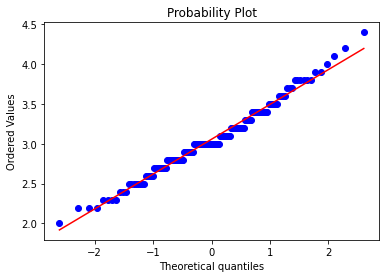

In [ ]:
iris = sns.load_dataset('iris')

stats.probplot(iris['sepal_width'], plot = plt)

plt.show()

In [ ]:
stats.shapiro(iris['sepal_width'])

# {H0:} norm√°lis eloszl√°sb√≥l sz√°rmazik a minta? Vagy, hogy a popul√°ci√≥ amib≈ël a minta sz√°rmazik lehet-e norm√°lis eloszl√°s√∫ adott minta mellett.

ShapiroResult(statistic=0.9849170446395874, pvalue=0.10113201290369034)

Test value 0.956822, p-value 0.000009


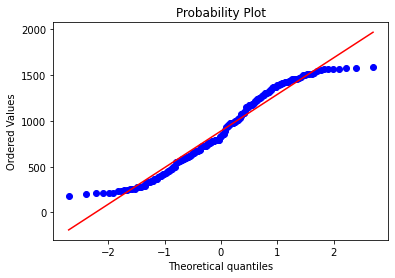

In [ ]:

# Egyenletes eloszl√°s eset√©n viszont ilyen eredm√©nyt kapunk

np.random.seed(0)

uniformRnd = np.random.uniform(low = 1600, high = 180, size = 200)

uniformInts = np.round(uniformRnd)

test_value, p_value = stats.shapiro(uniformInts)

print('Test value {:02f}, p-value {:02f}'.format(test_value, p_value))

stats.probplot(uniformInts, plot = plt)
plt.show()

<a name="esettanulmany"></a>

## Esettanulm√°ny <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>


In [ ]:
# Loading built-in Datasets:
iris = sns.load_dataset('iris')

iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
iris.describe(percentiles = [0.5])

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
50%        5.800000     3.000000      4.350000     1.300000
max        7.900000     4.400000      6.900000     2.500000

In [ ]:
iris.describe(include=['O'])

species
count          150
unique           3
top     versicolor
freq            50

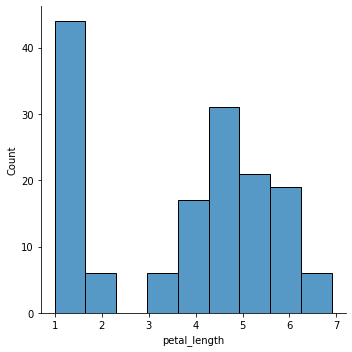

In [ ]:
sns.displot(iris['petal_length'],  kde=False, label='Height')
plt.show()

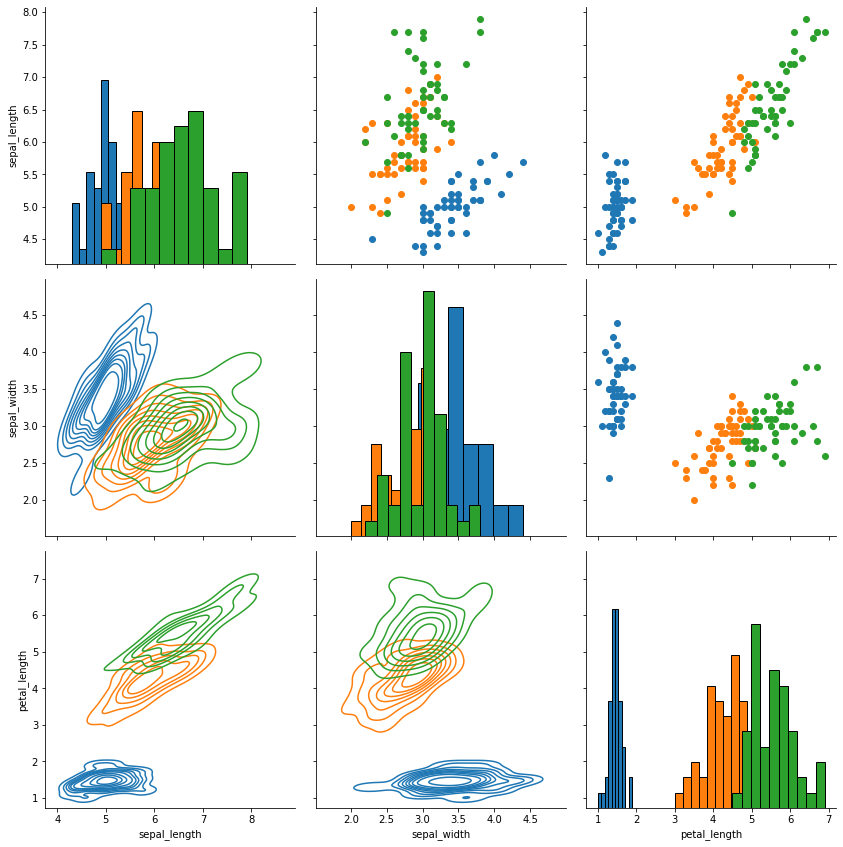

In [ ]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data = iris,
                    vars = ['sepal_length', 'sepal_width', 'petal_length'],
                    hue = 'species',
                    height = 4)

# (x,y) pont p√°trok
grid = grid.map_upper(plt.scatter)

# Histogram a f≈ë√°tl√≥ban
grid = grid.map_diag(plt.hist, bins = 10, 
                     edgecolor = 'k')
# Density plot
grid = grid.map_lower(sns.kdeplot)

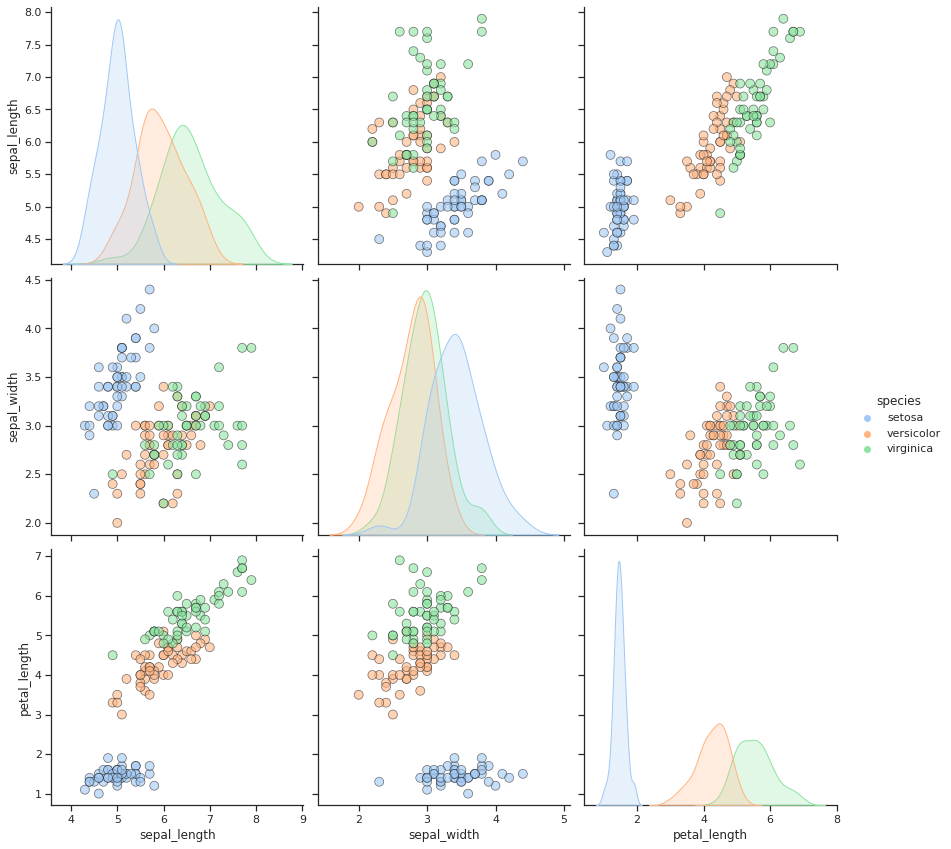

In [ ]:
# Plot az egyes n√∂v√©ny fajt√°nk√©nt
sns.pairplot(data = iris, 
             vars = ['sepal_length', 'sepal_width', 'petal_length'], 
             hue = 'species', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)


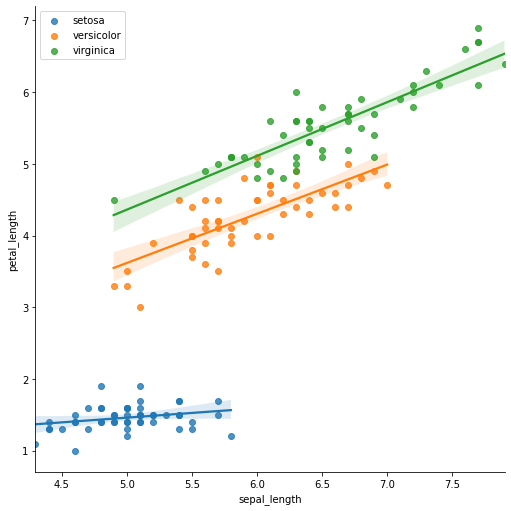

In [ ]:

sns.lmplot(x="sepal_length",
           y="petal_length",
           data=iris,
           hue="species", fit_reg=True, legend=False, height = 7)

plt.legend()
plt.show()


In [ ]:
iris.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

In [ ]:
stats.pearsonr(iris['petal_width'], iris['petal_length'])

(0.9628654314027961, 4.6750039073275495e-86)

In [ ]:
# A {H0:} null hipot√©zis√ºnk, hogy a k√©t v√°ltoz√≥ k√∂z√∂tt nincs korrel√°ci√≥

corr, p_value = stats.pearsonr(iris['petal_width'], iris['petal_length'])

print('Pearson\'s correlation = {:.8}'.format(corr))
print('p_value = {:.8f}'.format(p_value))

# Annak a val√≥sz√≠n≈±s√©ge, hogy a k√©t v√°ltoz√≥ korrel√°latlan kissebb mint 0.05

Pearson's correlation = 0.96286543
p_value = 0.00000000


In [ ]:
# A {H0:} null hipot√©zis√ºnk, hogy a k√©t v√°ltoz√≥ k√∂z√∂tt nincs korrel√°ci√≥

corr, p_value = stats.pearsonr(iris['petal_width'], iris['sepal_width'])

print('Pearson\'s correlation = {:.8}'.format(corr))
print('\033[1mp_value = {:.8f} \033[0m'.format(p_value))

# Annak a val√≥sz√≠n≈±s√©ge, hogy a k√©t v√°ltoz√≥ korrel√°latlan kissebb mint 0.05

Pearson's correlation = -0.36612593
p_value = 0.00000407 


In [ ]:
# A {H0:} null hipot√©zis√ºnk, hogy a k√©t v√°ltoz√≥ k√∂z√∂tt nincs korrel√°ci√≥

corr, p_value = stats.pearsonr(iris['sepal_length'], iris['sepal_width'])

print('Pearson\'s correlation = {:.8}'.format(corr))
print('p_value = {:.8f}'.format(p_value))

# Annak a val√≥sz√≠n≈±s√©ge, hogy a k√©t v√°ltoz√≥ korrel√°latlan nagyobb mint 0.05

Pearson's correlation = -0.11756978
p_value = 0.15189826


## Az egyes v√°ltoz√≥k eloszl√°sa, √°tlaga, sz√≥r√≥d√°sa csoportonk√©nt

In [ ]:
petal = iris.loc[:,['petal_length', 'petal_width', 'species']]

In [ ]:
petal

petal_length  petal_width    species
0             1.4          0.2     setosa
1             1.4          0.2     setosa
2             1.3          0.2     setosa
3             1.5          0.2     setosa
4             1.4          0.2     setosa
..            ...          ...        ...
145           5.2          2.3  virginica
146           5.0          1.9  virginica
147           5.2          2.0  virginica
148           5.4          2.3  virginica
149           5.1          1.8  virginica

[150 rows x 3 columns]

In [ ]:
petal.mean()

petal_length    3.758000
petal_width     1.199333
dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].mean()

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].var()

species
setosa        0.030159
versicolor    0.220816
virginica     0.304588
Name: petal_length, dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].std()

species
setosa        0.173664
versicolor    0.469911
virginica     0.551895
Name: petal_length, dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].median()

species
setosa        1.50
versicolor    4.35
virginica     5.55
Name: petal_length, dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].quantile()

species
setosa        1.50
versicolor    4.35
virginica     5.55
Name: petal_length, dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].quantile(0.25)

species
setosa        1.4
versicolor    4.0
virginica     5.1
Name: petal_length, dtype: float64

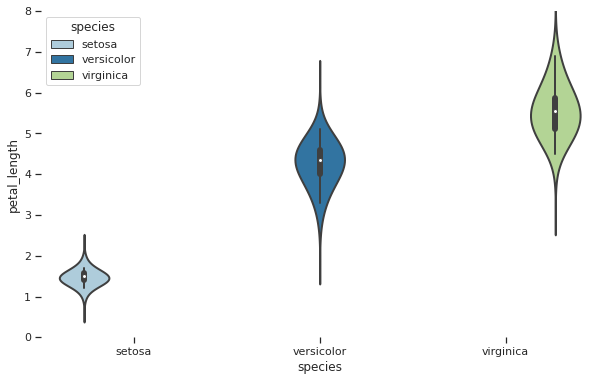

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=iris, x="species", y="petal_length", hue="species", palette="Paired", bw=.9, cut=4, linewidth=2)

# Finalize the figure
ax.set(ylim=(0, 8))
sns.despine(left=True, bottom=True)

# A sz√≠nek be√°ll√≠t√°s√°hoz seg√©dlet https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

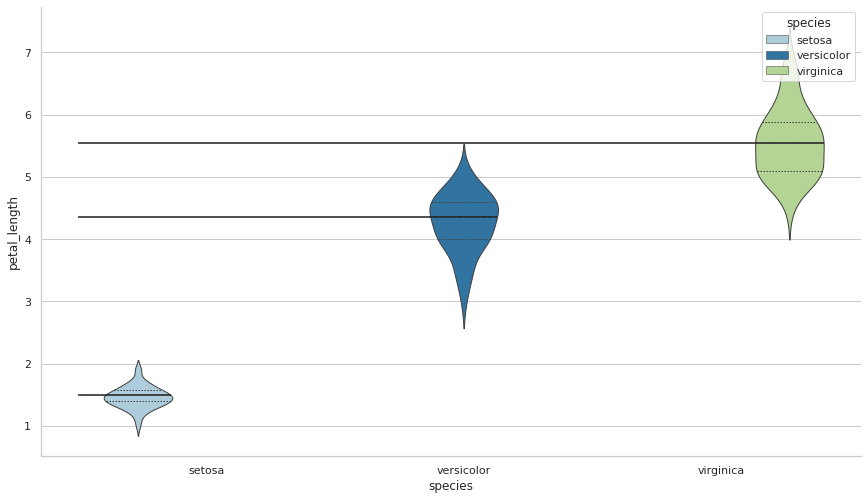

In [ ]:
m = petal.groupby('species')['petal_length'].median()
m.values

# Draw a nested violinplot and split the violins for easier comparison
sns.set_theme(style="whitegrid")

sns.violinplot(data=iris, x="species", y="petal_length", hue="species",
               split=False, inner="quart", linewidth=1,
               palette="Paired")
sns.despine(left=False)
plt.hlines(m[2], -0.5, 2.4)
plt.hlines(m[1], -0.5, 1.13)
plt.hlines(m[0], -0.5, -0.14)


In [ ]:
petal.cov()

petal_length  petal_width
petal_length      3.116278     1.295609
petal_width       1.295609     0.581006

In [ ]:
petal['petal_length'].var()

3.1162778523489942

In [ ]:
petal['petal_width'].var()

0.5810062639821029

## Mi a hipot√©zis teszt?

Tegy√ºk fel, hogy egy gy√≥gyszerkutat√≥ c√©gnek dolgozunk √©s szeretn√©nk megvizsg√°lni, hogy egy adott gy√≥gyszer cs√∂kkenti-e a v√©rnyom√°st. Ehhez egy olyan k√≠s√©rletet tervez√ºnk, ahol v√©letlenszer≈±en kiv√°lasztunk embereket √©s k√©t csoportra osztjuk ≈ëket. Az egyik csoport tagjai placeb√≥ gy√≥gyszert kapnak, teh√°t olyan gy√≥gyszert ami nem tartalmaz hat√≥anyagot. A m√°sik csoport tagjai a hat√≥anyagot is tartalmaz√≥ gy√≥gyszerb≈ël kapnak.

Mindk√©t csoportban minden egyes r√©sztvev≈ë v√©rnyom√°s√°t megm√©rj√ºk a gy√≥gyszer bev√©tele el≈ëtt, √©s a gy√≥gyszer bev√©tel√©t k√∂vet≈ëen egy 24 √≥r√°val.

Ha a gy√≥gyszer≈±nk val√≥ban cs√∂kkenti a v√©rnyom√°st, akkor a m√©r√©si eredm√©nyeinkek azt kell mutatniuk, hogy abban a csoportban akik a hat√≥anyagot is tartalmaz√≥ gy√≥gyszerb≈ël kaptak alacsonyabb az emberek v√©rnyom√°sa, mint azokn√°l akik placebot kaptak.

Ebben az esetben vizsg√°lhatjuk azt, hogy a k√©t csoporton bel√ºl a gy√≥gyszer bev√©tel√©t megel≈ëz≈ë √©rt√©kek √©s az ut√°na m√©rt √©rt√©kek k√∂z√∂tti k√ºl√∂nbs√©g k√ºl√∂nb√∂zik-e a k√©t csoportban (k√©tmint√°s √∂sszetartoz√≥ t-pr√≥ba). Vagy √∂sszehasonl√≠thatjuk a k√©t csoportot csup√°n a gy√≥gyszer bev√©tel√©t k√∂vet≈ë m√©r√©sek alapj√°n is (k√©tmint√°s t-pr√≥ba)

## T-pr√≥b√°t olyan esetekben alkalmazunk, amikor
k√©t csoport k√∂z√∂tti m√©rt √©rt√©kek √°tlag√°t akarjuk √∂sszehasonl√≠tani, teh√°t a m√©rt v√°ltoz√≥nk m√©r√©si szintje folytonos. Ezt a pr√≥b√°t nem v√©gezhetj√ºk el olyan v√°ltoz√≥n amelynek m√©r√©si szintje kateg√≥rikus (vagyis diszkr√©t √©rt√©keket tartalmaz)

## Mi is tulajdonk√©ppen a v√°ltoz√≥ m√©r√©si szintje?
K√©pzelj√ºk el, hogy van egy v√°ltoz√≥nk amiben a megfigyel√©si eset√ºnk - ha az illet≈ë szem√©ly - nem√©t t√°roljuk. Ez lehet f√©rfi vagy n≈ë. Ez esetben a v√°ltoz√≥nk **nomin√°lis**. Tegy√ºk fel, hogy v√°rosok l√©gszennyezetts√©gi adatait szeretn√©nk √∂sszehasonl√≠tani. A v√°rosok nev√©t tartalmaz√≥ v√°ltoz√≥ szint√©n nomin√°lis. Igaz, hogy t√∂bb mint k√©t √©rt√©ket vehet fel, de a v√°rosok k√∂z√∂tti k√ºl√∂nbs√©get csup√°n a nev√ºk alapj√°n nem √°ll√≠thatunk fel.

Kicsit m√°s a helyzet akkor, ha nem a v√°rosok nev√©t, hanem azok k√∂zigazgat√°si besorol√°s√°t vessz√ºk figyelembe. {k√∂zs√©g, v√°ros, megyesz√©khely, f≈ëv√°ros}. Ezek az √©rt√©kek szint√©n nomin√°lisak, de van k√∂z√∂tt√ºk egy sorrend, ez√©rt az ilyen v√°ltoz√≥t **ordin√°lis** m√©r√©si szint≈± v√°ltoz√≥nak h√≠vjuk.

Ha a v√°rosokat az ott √©l≈ë lakoss√°g sz√°ma alapj√°n is megm√©rj√ºk akkor m√°r **magas m√©r√©si szint≈±** v√°ltoz√≥r√≥l besz√©l√ºnk, hiszen a lakoss√°g sz√°ma 0-t√≥l b√°rmeddig terjedhet. Ezt szokt√°k **intervallum szint≈±** m√©r√©si v√°ltoz√≥nak is nevezni, mert egy√©rtelm≈±en kimondhat√≥, hogy ha egy telep√ºl√©sen 1000 ember √©l √©s egy m√°sik telep√ºl√©sen 2000 akkor az ut√≥bbiban k√©tszer annyian √©lnek mint az els≈ëben.

Ugyanakkor fontos meg√©rten√ºnk azt is, hogy a lakoss√°g sz√°ma csak disztkr√©t √©rt√©ket vehet fel. Egy adott telep√ºl√©sen √©l≈ëk sz√°ma nem lehet 300.11.

Viszont, ha egy adott telep√ºl√©seket az ott m√©rt √©vi √°tlagos k√∂z√©ph≈ëm√©rs√©klettel jellemezz√ºk, akkor az m√°r **folytonos** m√©r√©si szint≈± v√°ltoz√≥. Lehet {-31.1 Celsius fok}, lehet {18.6 Celsios fok is}

## Att√≥l f√ºgg≈ëen, hogy egy v√°ltoz√≥nak mi a m√©r√©si szintje, k√ºl√∂nb√∂z≈ë t√≠pus√∫ statisztikai teszteket alkalmazunk.
Az√©rt fontos besz√©ln√ºnk a v√°ltoz√≥k m√©r√©si szintj√©r≈ël, mert t√≠pusukt√≥l f√ºgg≈ëen m√°s √©s m√°s statisztikai teszteket tudunk v√©grehajtan rajtuk.

## Mi az a p-√©rt√©k
A v√©rnyom√°scs√∂kkent≈ë gy√≥gyszer p√©ld√°j√°n kereszt√ºl hadd mutassam be a p-√©r√©tket. A p a probability (vagyis az angol val√≥sz√≠n≈±s√©g) sz√≥nak a r√∂vid√≠t√©se.


In [ ]:
np.random.seed(1)

# Gener√°lok 20 esetet, N(170, 10):

mu, sigma = 170, 10
placeboRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
placeboInts = np.round(placeboRnd)

# Gener√°lok 20 esetet, N(160, 10):

mu, sigma = 160, 10
drugRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
drugInts = np.round(drugRnd)

df = pd.DataFrame(placeboInts, columns = ['placebo'])
df['drug'] = drugInts


# Ennek el≈ëfelt√©tel, hogy a mint√°k norm√°lis eloszl√°s√∫ak, a popul√°ci√≥s sz√≥r√°s nem ismert
# √©s mindk√©t popul√°ci√≥ sz√≥r√°sa azonos.

# Visszany√∫lva a f√©rfi, n≈ëi testmagass√°g adatunkhoz, vizsg√°ljuk meg, hogy a k√©t minta
# {H0:} √°tlaga egyenl≈ë
# {H1:} √°tlaga nem egyenl≈ë

stats.ttest_ind(df['placebo'], df['drug'], equal_var=True)

# A teszthez tartoz√≥ p √©rt√©k 0.00596 ez√©rt
# ha alpha = 0.05 vagyis 95%-os szignifikancia szintet v√°lasztunk akkor el kell
# vetn√ºnk a null hipot√©zist, hogy a k√©t minta √°tlaga megegyezik.

Ttest_indResult(statistic=2.913231790824309, pvalue=0.005961862593206057)

## Igen, de ...

Ha a kis√©rletet t√∂bbsz√∂r is v√©grehajtuk, akkor el≈ëfordulhat, hogy az elt√©r√©s m√©rt√©ke csup√°n a v√©letlennek tudhat√≥, √©s nem a gy√≥gyszer val√≥di hat√°s√°nak.

Ha p√©ld√°ul a fenti tesztet k√ºl√∂nb√∂z≈ë mint√°kon t√∂bbsz√∂r is megism√©telj√ºk, √©s megsz√°moljuk, hogy h√°ny esetben vetett√ºk el null hipot√©zist √©s h√°ny esetben fogadtuk el, akkor l√°tni fogjuk, hogy nem minden esetben fogadtuk el.

In [ ]:
p_less = 0
p_bigger = 0

for i in range(50):
  # np.random.seed(i*9)
  np.random.seed(i*10)
  mu, sigma = 170, 10

  placeboRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
  placeboInts = np.round(placeboRnd)

  mu, sigma = 160, 10
  drugRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
  drugInts = np.round(drugRnd)

  stat, p = stats.ttest_ind(placeboInts, drugInts, equal_var=True)

  # print(p)

  if(p > 0.05):
    p_bigger += 1
  elif(p < 0.05):
    p_less += 1

print('Number of p_bigger\t= {0}'.format(p_bigger))
print('Number of p_less  \t= {0}'.format(p_less))

Number of p_bigger	= 6
Number of p_less  	= 44


6 esetben a null hipot√©zist teh√°t, hogy a k√©t minta √°tlaga megegyezik elfogadtuk. Hiszen a val√≥sz√≠n≈±s√©gi v√°ltoz√≥inknak egy olyan realiz√°ci√≥ja √°llt el≈ë, amelyre a teszt azt mutatta ki, hogy a k√©t minta √°tlaga megegyezik. Teh√°t ha 95 sz√°zal√©kos konfidencia intervallumot v√°lasztun a teszthez, akkor 6 esetben azt l√°ttuk, hogy t√©vesen fogadtuk el a null hipot√©zist, hiszen az adataink k√©t olyan norm√°lis eloszl√°s√∫ popul√°ci√≥b√≥l sz√°rmaznak, amelyek √°tlaga elt√©r≈ë {170, 160} egyenk√©nt {10} sz√≥r√°ssal.

## Teh√°t..
Egy ilyen k√≠s√©rlet ut√°n nem mondhatjuk teljes bizonyoss√°ggal, hogy a k√©t popul√°ci√≥ √°tlaga k√ºl√∂nb√∂zik csup√°n azt, hogy **annak a val√≥sz√≠n≈±s√©ge, hogy a k√©t popul√°ci√≥ √°tlaga k√ºl√∂nb√∂zik az adott minta alapj√°n** ennyi √©s ennyi.
Ezt fejezi ki a p-√©rt√©k.



## Val√≥sz√≠n≈±s√©gi v√°ltoz√≥

Most, hogy m√°r tudjuk, hogy k√ºl√∂nb√∂z≈ë m√©r√©si szint≈± v√°ltoz√≥ink vannak √©rdemes lehet n√©h√°ny sz√≥t eml√≠teni a ezeknek a val√≥sz√≠n≈±s√©gi v√°ltoz√≥knak az eloszl√°s√°r√≥l is.

## Mi is az a val√≥sz√≠n≈±s√©gi v√°ltoz√≥ eloszl√°sa?

An√©lk√ºl t√∫l messzire visszany√∫ln√©k a kombinatorik√°hoz - pedig fogok - a val√≥sz√≠n≈±s√©gi v√°ltoz√≥ eloszl√°s√°t felfoghatjuk √∫gy is mint, hogy "mi annak a val√≥sz√≠n≈±s√©ge, hogy egy adott popul√°ci√≥b√≥l, egy adott √©rt√©ket fogok kiv√°lasztani?". Erre a k√©rd√©sre az adott val√≥sz√≠n≈±s√©gi v√°ltoz√≥ s≈±r√ºs√©g f√ºggv√©ny√©nek ismeret√©ben lehet v√°laszolni.

P√©ld√°ul ha tudom, hogy a magyar feln≈ëtt lakoss√°g testmagass√°ga $N \sim X(176, 10)$, akkor meg tudom mondani, hogyha v√©letlen szer≈±en kiv√°lasztok egy embert ebb≈ël a sokas√°gb√≥l, akkor mekkora a val√≥sz√≠n≈±s√©ge annak, hogy a kiv√°lasztott ember tesmagass√°ga $\lt$ 170 centim√©ter.

S≈ët tetsz≈ëleges testmagass√°gra meg tudom hat√°rozni, hogy mi annak a val√≥sz√≠n≈±s√©ge, hogy a kiv√°laszott szem√©ly testmagass√°ga $\lt$ mint az adott √©rt√©k. (De ehhez ismern√ºnk kell a Norm√°lis eloszl√°st, l√°sd kor√°bban)

## Mi az a minta, √©s mi a mintav√©telez√©s?

Kor√°bbi p√©ld√°n√°l maradva egy embert v√°lasztottunk ki a sokas√°gb√≥l √©s hat√°roztam meg annak a val√≥sz√≠n≈±s√©g√©t, hogy az adott szem√©ly magass√°ga $\lt$ mint egy adott √©rt√©k. De mi van akkor, ha nem csak egy hanem t√∂bb szem√©lyt is kiv√°lasztok?

Tegy√ºk fel, hogy v√©ltlenszer≈±en kiv√°lasztok 10 embert √©s megm√©rem a testmagass√°gukat. Veszem ennek az √°tlag√°t √©s a k√≠s√©rletet megism√©tlem m√©g egyszer. Ha el√©g sok ember k√∂z√ºl v√°lasztok v√©letlenszer≈±en akkor nem val√≥sz√≠n≈±, hogy ugyan azt a 10 embert fogom ism√©t kiv√°lasztani, teh√°t a m√°sodik k√≠s√©rletben kiv√°laszott emberek testmagass√°ga m√°s lesz. De veszem az ≈ë tesmagass√°guk √°tlag√°t, √©s a k√≠s√©rletet m√©g sokszor megism√©tlem.

B√°rmilyen k√∂vetkeztet√©st, amit a minta adataib√≥l le tudunk vonni, azt csak valamilyen val√≥sz√≠n≈±s√©ggel fogjuk tudni a popul√°ci√≥ra igaznak tekinteni.
Legyen ak√°rmilyen egyszer≈± a kutat√≥i k√©rd√©s√ºnk. Lehet, hogy csak annyit szeretn√©nk tudni, hogy van-e k√ºl√∂nbs√©g a f√©rfiak √©s a n≈ëk testmagass√°ga k√∂z√∂tt, de ezeket a k√©rd√©seket a popul√°ci√≥ra szeretn√©nk vonatkoztatn.

A popul√°ci√≥b√≥l v√°lasztunk egy mint√°t. Az mint√°ba es≈ë elemeket tulajdons√°gait fogjuk megm√©nni. A minta tulajdons√°gaib√≥l fogunk visszak√∂vetkeztetni a popul√°ci√≥ tulajdons√°gaira. Ez√©rt fontos, hogy a minta j√≥l reprezent√°lja a popul√°ci√≥t.

## A v√©letlen mintav√©tel
Hogyan lehet el√©rni, hogy a minta a lehet≈ë legjobban reprezent√°lja a teljes popul√°ci√≥t. A minta kiv√°laszt√°sakor t√∂rekedni kell arra, hogy a **popul√°ci√≥ minden tagj√°nak egyforma es√©lye legyen a mint√°ba val√≥ beker√ºl√©sre.**. Ez a k√©rd√©s r√©szben a kutat√°s tervez√©s t√©mak√∂r√©be tartozik. De r√∂viden annyi elmondhat√≥, hogyha egy popul√°ci√≥ra vonatkoz√≥lag (mondjuk a feln≈ëtt Magyar lakoss√°gra) vonatkoz√≥lag szeretn√©k valamilyen k√∂vetkeztet√©st levonni a mint√°b√≥l, akkor √©rtelemszer≈±en ebb≈ël a popul√°ci√≥b√≥l kell v√©letlenszer≈±en kiv√°lasztanom a megfigyel√©si eseteket.

Ha viszont egy olyan kutat√°st tervezek amelyeben valamilyen gy√≥gyszer hat√°s√°t szeretn√©m vizsg√°lni akkor, hogy az esetleges v√©letlen szer≈± hat√°sokat kisz≈±rjem, a kiv√°lasztott egyedeket is v√©letlenszer≈±en kell k√©t csoportb√≥ sorolni.

Az eg√©sz kut√°st √©s annak eredm√©nyeit **torz√≠thatja**, ha nem vessz√ºk figyelembe ezeket a hat√°sokat. B√°rmilyen mintav√©telen alapul√≥ k√≠s√©rletet elk√©pzelhet≈±nk, de az egyszer≈±s√©g kedv√©√©rt tegy√ºk fel, hogy f√©rfiak √°tlagos tesmagass√°g√°ra vagyunk k√≠v√°nsiak a popul√°ci√≥ban. Ez√©rt mint√°t vesz√ºnk, mondjuk a Magyar Kos√°rlabda v√°logatot tagjaib√≥l. Term√©szetesen a kos√°rlabd√°z√≥k √°tlagos tesmagass√°ga nagyobb az √°tlagos feln≈ëtt f√©rfiak√©n√°l ez√©rt ez a minta nem j√≥l fogja reprezent√°lni a magyar f√©rfi feln≈ëtt lakoss√°got.

√ögyan √≠gy, ha egy kis√©rlet elv√©gz√©se el≈ëtt, nem **randomiz√°ljuk** (vagyis osztjuk az eseteket v√©letlenszer≈±en egyik vagy m√°sik csoportba) a r√©szteve≈ëket, akkor el≈ëfordulhat, hogy egyik csoportba csak f√©rfiak, m√°sik csoporba csak n≈ëk fognak ker√ºlni √©s a nemek k√∂z√∂tti k√ºl√∂nbs√©gek hat√°ssal lehetnek a k√≠s√©rlet√ºnk eredm√©ny√©re.

Ha m√©gis ilyen - a mintav√©teln√©l el≈ëfordul√≥ - hib√°t v√©t√ºnk akkor ezt a jelens√©get h√≠vjuk **szisztematikus torz√≠t√°snak**.

Korl√°tozott mintav√©tel eset√©n pedig √°t kell gondolni, hogy mi az a popul√°ci√≥ amelyre k√∂vetkeztet√ºnk.

## A mint√°ban l√°that√≥ eredm√©nyek mennyire √°ltal√°nos√≠that√≥ak
Hogyan **becs√ºlj√ºk** meg azt, hogy a **minta** mennyire reprezent√°lja j√≥l a popul√°ci√≥at amelyre a **becsl√©semet** k√∂vetkeztet√©sem levonom. A **statisztikai p√≥b√°k** alapj√°n becs√ºlj√ºk meg azt, hogy amit tapasztaltunk a mint√°ban, az √©rv√©nyes lesz a popul√°ci√≥ban is.

P√©ld√°ul igaz-e, hogy a f√©rfiak √©s a n≈ëk testmagass√°ga k√∂z√∂tt k√ºl√∂nbs√©g van?
Ha a mint√°ban l√°tunk a f√©rfiak √©s n≈ëk testmagass√°ga k√∂z√∂tt k√ºl√∂nbs√©get, akkor statisztikai pr√≥b√°kkal fogom eld√∂nteni, hogy ez a k√ºl√∂nbs√©g mennyire val√≥sz√≠n≈±, hogy a poupul√°ci√≥ban is jelen van.

Teh√°t a k√∂vetkeztet≈ë statisztik√°k nem a hat√°s, jelens√©g m√©rt√©k√©t fogj√°k becs√ºlni, hanem annak a val√≥sz√≠n≈±s√©g√©t fogja megadni, hogy **els≈ëfaj√∫ hib√°t** k√∂vet√ºnk el. Vagyis a mint√°b√≥l arra k√∂vetkeztetek, hogy a poul√°ci√≥ban is jelen van a hat√°s, jelens√©g, de val√≥j√°ban nincs.

Ezeknek a statisztikai pr√≥b√°knak az eredm√©nye fogja megadni, hogy mennyi annak a **val√≥sz√≠n≈±s√©ge**, hogy a mint√°ban l√°that√≥ k√ºl√∂nbs√©g val√≥j√°ban a v√©letlen mintav√©telb≈ël ered≈ë jelens√©g, vagy v√©letlen egy√ºtt√°ll√°s k√∂vetkezm√©nye. Ha ennek annak a val√≥sz√≠n≈±s√©ge kics, hogy az elt√©r√©s csup√°n a v√©letlen mintav√©telb≈ël ered, akkor elfogadjuk, hogy a mint√°ban tapasztalt elt√©r√©s, vagy jelens√©g a popul√°ci√≥ban is jelen van.

## A minta nagys√°ga

 - minn√©l jobban lefedi a minta a popul√°ci√≥t ann√°l, ann√°l val√≥sz√≠n≈±bb, hogy pontosan reprezent√°lja a popul√°ci√≥t, ez√©rt ann√°l kisebb a val√≥sz√≠n≈±s√©ge annak, hogy a mint√°ban megfigyelt jelens√©g a csup√°n a v√©letlen mintav√©telb≈ël ered≈ë v√©letlen folyt√°n keletkezni.

n = 3 √©s a mint√°ban csak f√©rfiak vannak, akkor ha 50-50% a popul√°ci√≥ban a f√©riak √©s a n≈ëk ar√°nya, akkor $p(k=3) = 0.5*0.5*0.5 = 0.125 (12.5\%)$ teh√°t 100-b√≥l k√∂r√ºlbel√ºl 12.5 esetben el≈ëfordulhat az, hogy 3 f√©rfit tal√°lunk a mint√°ban holott a popul√°ci√≥ban a f√©rifak-n≈ëk ar√°nya 50-50%.
Ez√©rt ilyen mintaelemsz√°m melett igen kis val√≥sz√≠n≈±s√©ggel mondhatjuk, hogy a mint√°ban megfigyelt jelens√©g a popul√°ci√≥ban is √©rvenyes lenne.

n = 10 elem≈± minta eset√©n annak a val√≥sz√≠n≈±s√©ge, hogy v√©letlen mintav√©tellen egyetlen n≈ë sem lesz a mint√°ban $0.5^{10} = 0.0009765625$

Teh√°t a mint√°mat reprezentat√≠v v√©letlen mintav√©tellel vettem a popul√°ci√≥b√≥l ahol a f√©rfiak √©s n≈ëk ar√°nya, 50-50 sz√°zal√©k, akkor $p(k=0) = 0.0009765625$ a val√≥sz√≠n≈±s√©ge annak, hogy egyetlen n≈ë sem ker√ºl a mint√°ba.


$P(E)   = {n \choose k} p^k (1-p)^{ n-k}$ ahol ${n \choose k} = \frac{n!}{k! * (n - k)!}$

In [ ]:
import math

def binomial_p(n, k, p):

  c = math.factorial(n) / (math.factorial(k) * math.factorial((n-k)))

  return (c)*p**k*(1-p)**(n-k)


binomial_p(10, 0, 0.5)


0.0009765625

<a name="mintak_atlaga"></a>

> [vissza a tartalomjegyz√©khez](#tartalom)<br>
> [vissza az u-pr√≥b√°ra](#u-proba)<br>

## N√©zz√ºk meg, hogy milyen hat√°ssal van a minta nagys√°ga a mint√°ban m√©rhet≈ë √©tr√©kekere.

Genere√°ltam egy $N(176,10)$, n=9 milli√≥ 700 ezer 'popul√°ci√≥t' amelyb≈ël 100 szor mint√°t vesz√ºnk √©s minden egyes mint√°ban meg√©rmj√ºk az √°tlagot. Az √≠gy keletetkezett 100 elem≈± adatsorban is megm√©rem az √°tlagot √©s a sz√≥r√°st, majd grafikusan is megjelen√≠tem. Azt szeretn√©m √°br√°hozolni, hogy minn√©l kisebb a minta elemsz√°ma ann√°l kev√©sb√© k√©pes az √°tlag kiegyenl√≠ten a mint√°ban megfigyelhet≈ë k√ºl√∂nbs√©geket.

In [ ]:
import numpy as np

In [ ]:
population_height = np.random.normal(176, 10, 9700000)

mean = population_height.mean()

stdev = population_height.std()

In [ ]:
np.random.seed(1)

def take_samples(sample_size):

  samples_mean = np.arange(0, 100, 1, dtype='float64')

  counter = 0
  for i in samples_mean:
    sample = 0.0
    for j in range(sample_size):
      rnd = np.random.randint(0, 9700000)
      sample = sample +  population_height[rnd]
    s_mean = (sample / sample_size)
    samples_mean[counter] = s_mean
    counter += 1

  s_mean = samples_mean.mean()

  s_stdev = samples_mean.std()

  # print('population mean = {:.2f}'.format(mean))
  # print('population std  = {:.2f}'.format(stdev))
  print('n               = {:.0f}'.format(sample_size))
  print('samples mean    = {:.2f}'.format(s_mean))
  print('samples std     = {:.2f}'.format(s_stdev))
  print('----------------------------------------')

  return s_mean, s_stdev


In [ ]:

s_mean3, s_stdev3 = take_samples(sample_size = 3)
s_mean5, s_stdev5 = take_samples(sample_size = 5)
s_mean7, s_stdev7 = take_samples(sample_size = 7)


n               = 3
samples mean    = 176.56
samples std     = 6.07
----------------------------------------
n               = 5
samples mean    = 176.60
samples std     = 4.92
----------------------------------------
n               = 7
samples mean    = 175.77
samples std     = 3.74
----------------------------------------


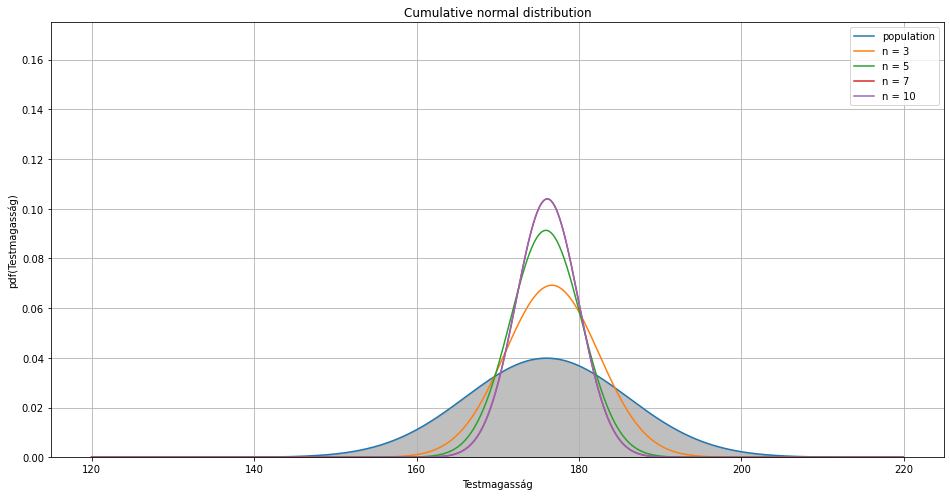

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

# A k√©t eloszl√°shoz
x = np.arange(120, 220, 0.1)
pdf_population = norm.pdf(x , loc = mean, scale = stdev )

ax.plot(x, pdf_population, label = 'population')
ax.plot(x, norm.pdf(x , loc = s_mean3, scale = s_stdev3 ), label='n = 3')
ax.plot(x, norm.pdf(x , loc = s_mean5, scale = s_stdev5 ), label='n = 5')
ax.plot(x, norm.pdf(x , loc = s_mean7, scale = s_stdev7 ), label='n = 7')
ax.plot(x, norm.pdf(x , loc = s_mean7, scale = s_stdev7 ), label='n = 10')


ax.set_title("Cumulative normal distribution")
ax.set_xlabel('Testmagass√°g')
ax.set_ylabel('pdf(Testmagass√°g)')
ax.grid(True)
ax.legend()

# a kit√∂lt√©shez
px = np.arange(120, 220, 0.1)
ax.set_ylim(0, 0.175)
pdf_fill = norm.pdf(px, loc = mean, scale = stdev)
ax.fill_between(px, pdf_fill, alpha=0.5, color='gray')

plt.show()

Teh√°t a sokas√°gb√≥l vett **10 elem≈± mint√°k** √°tlag√°nak eloszl√°sa sokkal keskenyebb mint a **teljes popul√°ci√≥ban** vett eloszl√°s. De ez logikus is ha belegondolunk, hogy minden egyes mintav√©tel alkalm√°val 10 elemet v√°lasztottunk ki a sokas√°gb√≥l teljesen v√©letlen szer≈±en. Ez√©rt el√©g val√≥sz√≠n≈±tlet, hogy a mint√°ba csak alacsony, vagy magas emberek ker√ºljenek. Sokkal val√≥sz√≠n≈±bb, hogy ker√ºltek bele ilyenek is olyanok is, de miut√°n vett√ºk az √°tlagukat az eredm√©ny sokkal k√∂zelebb √°llt a **teljes sokas√°gban** m√©rt tesmagass√°g √°tlag√°hoz.

Ha a $X$ v√©letlen v√°ltoz√≥ norm√°lis eloszl√°st k√∂vet $N \sim (176, 10)$ √©s ebb≈ël $n$ elem≈± mint√°t vesz√ºnk, akkor a mint√°k √°tlaga norm√°lis eloszl√°st fog k√∂vetni, melyen v√°rhat√≥ √©rt√©ke (√°tlaga) megegyezik az eredeti $X$ v√°ltoz√≥ √°tlag√°val. Sz√≥r√°sa pedig az $X$ sz√≥r√°s√°nak √©s a mintaelemsz√°m $n$ gy√∂k√©nek h√°nyados√°val:
$$\sigma_{\overline{x}30} = \frac{\sigma_X}{\sqrt{n}}$$



```
print(s_stdev3)
print(s_stdev5)
print(s_stdev7) -> minta

10/np.sqrt(7)   -> elm√©leti

6.071054396294276
4.922683142766545
3.7436757377497907
3.779644730092272
```



## K√∂zponti hat√°reloszl√°s-t√©tel

A k√∂zponti hat√°reloszl√°s-t√©tel a val√≥sz√≠n≈±s√©gi v√°ltoz√≥ eloszl√°s√°t√≥l f√ºggetlen√ºl √©rv√©nyes. Tegy√ºk fel p√©ld√°ul, hogy $n$ -szer mint√°t vesz√ºnk egy ismeretlen eloszl√°s√∫ adathalmazb√≥l. Legyen $X_i$ az a val√≥sz√≠n≈±s√©gi v√°ltoz√≥, mely azt jel√∂li, hogy az i -edik esetet helyesen predikt√°lja-e az adott oszt√°lyoz√≥. Teh√°t $X_i = 1$ , ha az eset helyesen predikt√°lt, 0 egy√©bk√©nt. Az $\overline{X}$ minta√°tlag jel√∂li az oszt√°lyoz√≥ v√°rhat√≥ pontoss√°g√°t. A k√∂zponti hat√°reloszl√°s-t√©tel azt sugallja, hogy a v√°rhat√≥ pontoss√°g **(a minta√°tlag) √°ltal√°ban norm√°lis eloszl√°s√∫, b√°r nem felt√©tlen√ºl norm√°lis az az eloszl√°s, melyb≈ël a mint√°k sz√°rmaznak.**


<a name="se"></a>

## A becsl√©s standard hib√°ja

A becsl√©s hib√°j√°nak m√©rt√©ke, megegyezik a becsl≈ë statisztika elm√©leti (gyak. mintabeli) eloszl√°s√°nak sz√≥r√°s√°val.

$$SE = \frac{\sigma_X}{\sqrt{n}}; \widehat{S}E = \frac{S_X}{\sqrt{n}}; $$

Mint a standard hiba k√©plet√©b√µl is l√°that√≥, az elemsz√°m n√∂vel√©s√©vel a
standard hiba cs√∂kken, azaz a becsl≈ë statisztik√°k √°tlagosan egyre
kisebb hib√°val becslik a popul√°ci√≥ √°tlag√°t.

> A becsl√©s standard hib√°j√°val kapcsolatos a becsl√©s k√©t tov√°bbi fontos
ism√©rve, a **hat√©konys√°g**, ami arra utal, hogy a becsl√©s kis hib√°val
k√∂zel√≠ti a becs√ºlend≈ë param√©tert, √©s a **konzisztencia**, ami arra utal,
hogy a mintanagys√°g n√∂vel√©s√©vel a becsl≈ë statisztika elm√©leti
eloszl√°s√°nak sz√≥r√°sa, vagyis standard hib√°ja, egyre kisebb lesz.

[l√°sd a mintap√©ld√°n lent](#konzisztencia)



## Intervallumbecsl√©s

L√°ttuk, hogy a minta elemsz√°m√°nak n√∂vel√©s√©vel a becsl√©s egyre pontosabb lesz, de pontosan ritk√°n fog megegyezni a popul√°ci√≥-param√©terrel.

Amikor nem pontos √©rt√©ket adunk meg a popul√°ci√≥param√©ter
becsl√©sek√©nt, hanem egy tartom√°nyt, intervallumot, amibe a becs√ºlend√µ
param√©ter bizonyos val√≥sz√≠n√ªs√©ggel bele fog esni intervallumbecsl√©snek h√≠vjuk. Ezt a val√≥sz√≠n√ªs√©get a becsl√©s megb√≠zhat√≥s√°g√°nak, konfidenci√°j√°nak nevezz√ºk, az
intervallumot pedig megb√≠zhat√≥s√°gi tartom√°nynak, vagy konfidencia intervallumnak. 


## A konfidencia intervallumr√≥l

A statisztikai szignifikanci√°n alapul√≥ hipot√©zis vizsg√°lat a konfidenciaintervallumok kifejez√©s√©nek m√°sik m√≥dja. M√°s szavakkal, minden szignifikanci√°n alapul√≥ hipot√©zisvizsg√°lat konfidenciaintervallumon kereszt√ºl nyerhet≈ë, √©s minden konfidenciaintervallum le√≠rhat√≥ egy szignifikancia alap√∫ hipot√©zisvizsg√°laton kereszt√ºl.

Az eredeti p√©ld√°n√°l maradva van 9700000 ember√ºnk. V√©letlenszer≈±en kiv√°lasztunk bel≈ël√ºk 80-at.

A 80 f≈ës mint√°ban az emberek testmagass√°g√°nak √°tlaga **FONTOS** a mint√°ban m√©rt √°tlag $\overline{x} = 170 cm$.

Felmer√ºl a k√©rd√©s:
"Mi a val√≥sz√≠n≈±s√©ge annak, hogy az √∂sszes ember testmagass√°ga is $170 cm$"

Valami√©rt m√©gsem √≠gy tessz√ºk fel a k√©rd√©st hanem ford√≠tva.

"Felt√©ve, hogy a mint√°ban a testmagass√°g √°tlaga $170 cm$, mi a val√≥sz√≠n≈±s√©ge annak, hogy az √∂sszes ember testmagass√°g√°nak az √°tlaga is ennyi."

Ha 95%-os konfidencia intervallumot szeretn√©nk az √°tlagra, akkor meg kell
adnunk azt a tartom√°nyt, ami a popul√°ci√≥√°tlagot 95%-os val√≥sz√≠n≈±s√©ggel
tartalmazza. Standard norm√°l eloszl√°s eset√©n az √©rt√©kek 95%-os
val√≥sz√≠n√ªs√©ggel a $-1.96$ √©s $1.96$ sz√≥r√°snyi tartom√°nyba esnek, teh√°t az
√°tlag eset√©n a $-1.96*\frac{\sigma}{\sqrt{n}} ,1.96*\frac{\sigma}{\sqrt{n}}$ tartom√°ny lesz a 95%-os konfidencia intervallum.

√âs itt j√∂n a csavar, hogy nem azt mondjuk, hogy pontosan ennyi, hanem hogy
ilyen vagy olyan val√≥sz√≠n≈±s√©gel ebbe az intervallumba esik.
Mondjuk $p(x = 170) = [95\% \mathrm{CI} 167.81 - 172.19]$.
M√°s szavakkal, 95% bizonyoss√°gi szint melett azt mondhatjuk, hogy a teljes sokas√°gban megfigyelhet≈ë √°tlag a minta alapj√°n 167.81 cm √©s 172.19 cm k√∂z√∂tt van.

Ez azt jelenti, hogy ha 100 szor elv√©gezn√©nk ugyan ezt a kis√©rletet (teh√°t, v√©letlenszer≈±en v√°lasztan√°nk 80 embert) akkor az √≠gy v√©gzett m√©r√©s alapj√°n a teljes sokas√°gban m√©rhet≈ë √°tlag a 100 kis√©rletb≈ël 95 sz√∂r esne abba az intervallumba a becsl√©s. 5 sz√∂r viszont nem.

Teh√°t lehets√©ges, hogy a teljes sokas√°g testmagass√°g√°nak √°tlaga 167.81 - 172.19 k√∂z√∂tt van. De teljes bizonyoss√°ggal nem √°ll√≠thatjuk.

Teh√°t 20-b√≥l 1-szer egy ilyen becsl√©s intervalluma nem tartalmazn√° a t√©nyleges popul√°ci√≥s √°tlagot.

Erre megold√°s lehet az, ha
 1. megn√∂velj√ºk a mintaelemsz√°mot
 2. megemelj√ºk a konfidencia szintet [95-r≈ël, 99-re, vagy ak√°r 99.9-re] de ezzel megn≈ë a konfidencia intervallumunk, vagyis a t√≥l-ig terjed≈ë tartom√°ny is.


In [ ]:
n = 50      # a megfigyel√©sek sz√°m
x = 170     # a mina √°tlaga
std = 10    # a minta sz√≥r√°sa
cl = 95     # a konfidencia intervallum

# ci = x +- z*(std/sqrt(n))

# sz√≥val a ci az √°tlag plusz Z * (std/sqrt(megfigyel√©sek sz√°ma))

# a k√ºl√∂nb√∂z≈ë z √©rt√©kek
#
# 80% 1,283
# 90% 1,645
# 95% 1,960
# 99% 2,576
# 99.5% 2,807
# 99.9% 3,291

z = 1.960
marginalis_hiba = z * (std/math.sqrt(n))
ci_upper = x + z * marginalis_hiba
ci_lower = x - z * marginalis_hiba

print(ci_upper)
print(ci_lower)
print(marginalis_hiba)

175.4328428212125
164.5671571787875
2.771858582251266


Itt csak arra szeretn√©k ki√©trni, hogy a margin√°lis hiba √©s ez√°ltal a konfidencia intervallum f√ºgg a megfigyel√©sek sz√°m√°t√≥l $(n)$ kiv√°ncsi vagyok r√°, hogy alakul ennek az √©rt√©ke az $(n)$ f√ºggv√©ny√©ben, mik√∂zben sem az $(x)$ sem a $std$ √©rt√©k√©t nem v√°ltoztatom.

<a name="konzisztencia"></a>

[vissza a standart hib√°hoz](#se)


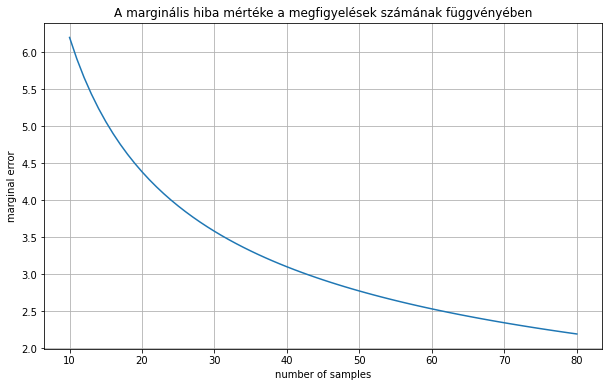

In [ ]:
start = 10; end = 80

tmp_x = np.linspace(start, end, (end-start+1))
tmp_y = np.zeros(end-start+1)

for i, n in enumerate(tmp_x, 0):
  marginalis_hiba = z * (std/math.sqrt(n))
  tmp_y[i] = marginalis_hiba

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tmp_x, tmp_y)
ax.set_title('A margin√°lis hiba m√©rt√©ke a megfigyel√©sek sz√°m√°nak f√ºggv√©ny√©ben')
ax.set_xlabel('number of samples')
ax.set_ylabel('marginal error')
ax.grid(True)

plt.show()

In [ ]:
# Teh√°t ha x = 170 √©s std = 10 akkor n=10-n√©l a hiba
print('error = {:.02f}'.format(tmp_y[0]))

# ha az n=80 akkor a hiba
print('error = {:.02f}'.format(tmp_y[-1]))

# ez√©rt a 95%-os confidencia intervallum als√≥ hat√°ra
print('x {:.00f} [95% CI {:.02f} - {:.02f}]'.format(x, x - tmp_y[-1], x + tmp_y[-1]))


error = 6.20
error = 2.19
x 170 [95% CI 167.81 - 172.19]


## A le√≠r√≥ statisztik√°k
Ezek a statisztik√°k a minta valamilyen tulajdons√°g√°t √≠rj√°k le:
- **√°tlag**: $\overline{x} = \frac{\sum x_i}{n}$

- **m√≥dusz**: A m√≥dusz egy sorozat leggyakrabban el≈ëfordul√≥ eleme.

- **medi√°n**: A medi√°n valamely √©rt√©kekre vonatkoztatva az az √©rt√©k, amin√©l a t√∂bbinek a fele nagyobb √©s a fele kisebb (term√©szetesen p√°ros elemsz√°m eset√©n a sz√°mtani k√∂zepet kell venni). P√©ld√°ul egy n√©pess√©g √©letkor√°nak a medi√°nja az az √©letkor, amin√©l a n√©pess√©gnek pont a fele id≈ësebb √©s pont a fele fiatalabb.


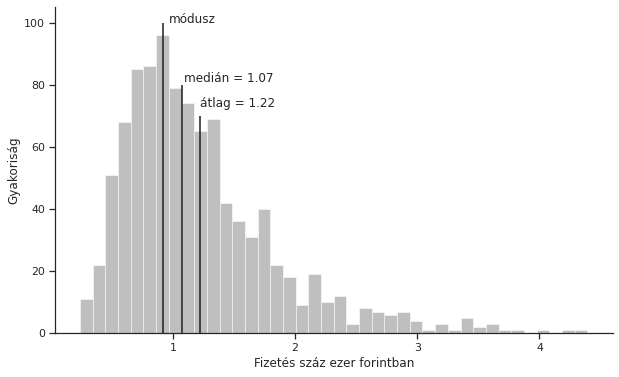

In [ ]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")
np.random.seed(0)

N = 1000
lognormal_values = np.random.lognormal(mean = 0.1, sigma = 0.5, size = N)


stddev = lognormal_values.std()
mean = lognormal_values.mean()
median = np.median(lognormal_values)

plt.figure(figsize=(10,6))
plt.hist(lognormal_values, 40, density = False, lw = 1, color = 'gray', alpha = 0.5)
plt.vlines(mean, 0, 70)
plt.vlines(median, 0, 80)
plt.vlines(0.92, 0, 100)
plt.text(1.09, 81, 'medi√°n = ' + str(np.round(median, 2)), horizontalalignment='left')
plt.text(1.22, 73, '√°tlag = ' + str(np.round(mean, 2)), horizontalalignment='left')
plt.text(1.16, 100, 'm√≥dusz', horizontalalignment='center')
plt.xlabel('Fizet√©s sz√°z ezer forintban')
plt.ylabel('Gyakoris√°g')
sns.despine(left=False)

plt.show()


## A variancia √©s a sz√≥r√≥d√°s

A variancia az √°tlagt√≥l val√≥ n√©gyzetes elt√©r√©s √°tlaga:
$\sigma^2 = \sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n}$

Az √°tlagt√≥l val√≥ √°tlagos elt√©r√©s:
$\sigma = \sqrt{\sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n}}$




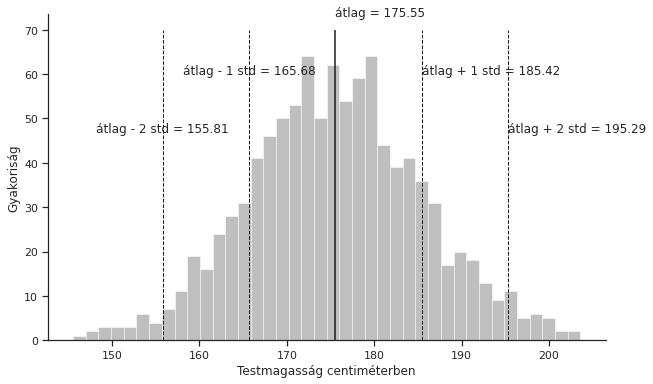

In [ ]:

sns.set_theme(style="ticks")
np.random.seed(0)

N = 1000
a = np.random.normal(loc = 176, scale = 10, size = N)

stddev = a.std()
mean = a.mean()

plt.figure(figsize=(10,6))
plt.hist(a, 40, density = False, lw = 1, color = 'gray', alpha = 0.5)
plt.vlines(mean, 0, 70)
plt.vlines(mean + stddev, 0, 70, linestyles = '--', lw = 1)
plt.vlines(mean - stddev, 0, 70, linestyles = '--', lw = 1)
plt.vlines(mean + 2*stddev, 0, 70, linestyles = '--', lw = 1)
plt.vlines(mean - 2*stddev, 0, 70, linestyles = '--', lw = 1)

plt.text(mean, 73, '√°tlag = ' + str(np.round(mean, 2)), horizontalalignment='left')
plt.text(mean + stddev, 60, '√°tlag + 1 std = ' + str(np.round(mean + stddev, 2)), horizontalalignment='left')
plt.text(mean + 2*stddev, 47, '√°tlag + 2 std = ' + str(np.round(mean + 2*stddev, 2)), horizontalalignment='left')

plt.text(mean - stddev, 60, '√°tlag - 1 std = ' + str(np.round(mean - stddev, 2)), horizontalalignment='center')
plt.text(mean - 2*stddev, 47, '√°tlag - 2 std = ' + str(np.round(mean - 2*stddev, 2)), horizontalalignment='center')

plt.xlabel('Testmagass√°g centim√©terben')
plt.ylabel('Gyakoris√°g')
sns.despine(left=False)

plt.show()

## Az empirikus sz√≥r√°sn√©gyzet sz√°m√≠t√°s√°ra
szokt√°k m√©g haszn√°lni a korrig√°lt empirikus sz√≥r√°sn√©gyzetet is, ami nem m√°s mint a variancia helyett $s^2 = \sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n-1}$

A korrig√°lt √°tlagt√≥l val√≥ √°tlagos elt√©r√©s:
$s = \sqrt{\sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n-1}}$

Kis mintaelemsz√°m eset√©n ez√©rt a varianca nagyobb lesz mint a t√©nyleges popul√°ci√≥ban megfigyelhet≈ë variance, de nagy elemsz√°m eset√©n ez a k√ºl√∂nb√©s√©g elt≈±nik.

Nem arra vagyunk k√≠v√°ncsiak hogy a minta elemsz√°mok √©rt√©kei milyen m√©rt√©kben sz√≥r√≥dnak a minta √°tlaga k√∂r√ºl hanem, hogy milyen m√©rt√©kben sz√≥r√≥dnak a popul√°ci√≥ √°tlag k√∂r√ºl. A popul√°ci√≥ √°tlagot azonban sajnos nem ismerj√ºk, √©s abban sem lehet√ºnk biztosak, hogy a minta √°tlag el√©g k√∂zel helyezkedik el hozz√°. Mivel azonban a minta elemeib≈ël sz√°moljuk ki a minta√°tlagok, abban biztosak lehet√ºnk, hogy a minta elemei k√∂zelebb fognak elhelyezkedni a minta √°tlag√°hoz, mint ahogy a popul√°ci√≥ √°tlag√°hoz teszik azt. Ez√°ltal amikor a varianci√°t √©s a sz√≥r√°st a minta √°tlag√°g√°nak seg√≠ts√©g√©vel sz√°moljuk val√≥j√°ban az √©rt√©kek sz√≥r√≥d√°s√°t alulbecs√ºlj√ºk.

Ezt az al√°becsl√©st k√≠v√°njuk a fenti m√≥don korrig√°lni.

A szabads√°gfok egy sz√°m√≠t√°s sor√°n az egym√°st√≥l f√ºggetlen szabadon v√°laszthat√≥ tagok sz√°ma.



## A v√°rhat√≥ √©rt√©k √©s az √°tlag k√∂z√∂tti anal√≥gia

A val√≥sz√≠n≈±s√©g sz√°m√≠t√°sb√≥l ismert a v√°rhat√≥ √©rt√©k fogalma ami $E(X) = \sum{p_i * X_i}$ vagyis az √∂sszes elem el≈ëfordul√°s√°nak val√≥sz√≠n≈±s√©ge √©s √©rt√©knek szorzatai. A statisztikai √°tlag $\mu = \frac{\sum{x_i}}{N}$.

$$\mu = \frac{10 * 1 + 15 * 2 + 20 * 3 + 5 * 4}{10 + 15 + 20 + 5} = 2.4$$

$$E(X) = \frac{10}{50}*1 + \frac{15}{50}*2 + \frac{20}{50}*3 + \frac{5}{50}*4 = 2.4$$

A statisztikai sz√≥r√°s

$$\sigma^2 = \sum_{i=1}^{n} \frac{(x_i-M)^2}{N} = E((X - E(X))^2) = E(X^2) - E^2(X)$$
<table>
  <tr>
    <td>
      $j$
    </td>
    <td>
      $D_j$
    </td>
    <td>
      $X_j$
    </td>
    <td>
      $P_j$
    </td>
    <td>
      $X^2$
    </td>
  </tr>
  
  <tr>
    <td>
      $1$
    </td>
    <td>
      $10$
    </td>
    <td>
      $1$
    </td>
    <td>
      $10/50$
    </td>
    <td>
      $1$
    </td>
  </tr>

  <tr>
    <td>
      $2$
    </td>
    <td>
      $15$
    </td>
    <td>
      $2$
    </td>
    <td>
      $15/50$
    </td>
    <td>
      $4$
    </td>
  </tr>

  <tr>
    <td>
      $3$
    </td>
    <td>
      $20$
    </td>
    <td>
      $3$
    </td>
    <td>
      $30/50$
    </td>
    <td>
      $9$
    </td>
  </tr>

  <tr>
    <td>
      $4$
    </td>
    <td>
      $5$
    </td>
    <td>
      $4$
    </td>
    <td>
      $5/50$
    </td>
    <td>
      $16$
    </td>
  </tr>
</table>


A statisztikai sz√≥r√°s:

$$ \sigma^2 = (10 * (1-2,4)^2 + 15 * (2-2,4)^2 + 20 * (3-2,4)^2 + 5 * (4-2,4)^2)/50 = 0.84 $$

$$ \sigma^2 = \frac{10 * (1-2,4)^2 + 15 * (2-2,4)^2 + 20 * (3-2,4)^2 + 5 * (4-2,4)^2}{50} = 0.84 $$

A val√≥sz√≠n≈±s√©g sz√°m√≠t√°s alapj√°n:

$$E(X^2) = \sum{p_i * X^2_i} = \frac{10}{50}*1 + \frac{15}{50}*4 + \frac{20}{50}*9 + \frac{5}{50}*16 = 6.6$$

$E(X^2)$ az √©rt√©kek n√©gyzet√©nek v√°rhat√≥√©rt√©ke. Ebb≈ël kell kivonni a v√°rhat√≥ √©rt√©k $E(X) = 2.4$ n√©gyzet√©t $5.76$ teh√°t $E(X^2) - E^2(X) = 6.6 - 5.76 = 0.84$




## A norm√°lis eloszl√°s

Tegy√ºk fel, hogy van egy popul√°ci√≥m √©s mint√°t veszek bel≈ële. Megm√©rem az adott eseteket √©s feljegyzem a minta √°tlag√°t. Majd ism√©t mint√°t veszek √©s megism√©tlem az a m√©r√©sket √©s ism√©t feljegyzem az √°tlagot. Ezt a folyamatott t√∂bbsz√∂r megism√©tlem. Az √≠gy kapott minta√°tlagokat is egy histogram seg√≠ts√©g√©vel √°br√°zolom.



In [ ]:
np.random.seed(1)

population = np.random.normal(loc = 176, scale = 10, size = 9700000)

def take_samples(sample_size):

  samples_mean = np.arange(0, 20, 1, dtype='float64')

  counter = 0
  for i in samples_mean:
    sample = 0.0
    for j in range(sample_size):
      rnd = np.random.randint(0, 9700000)
      sample = sample +  population[rnd]
    s_mean = (sample / sample_size)
    samples_mean[counter] = s_mean
    counter += 1

  s_mean = samples_mean.mean()

  return s_mean


In [ ]:
tests = 10000

samples_average = np.arange(0, tests, 1, dtype = np.float64)

for i in range(tests):
  mean = take_samples(sample_size = 10)
  samples_average[i] = mean



In [ ]:
samples_average.mean()

175.99707957999385

In [ ]:
plt.figure(figsize=(10,6))
mean = samples_average.mean()
std  = samples_average.std()
plt.hist(samples_average, 40, density = False, lw = 1, color = 'gray', alpha = 0.5)
plt.vlines(mean, 0, 800, linestyles='-', lw=2)
plt.vlines(mean + std, 0, 600, linestyles= '--', lw=1)
plt.vlines(mean - std, 0, 600, linestyles='--', lw=1)
plt.vlines(mean + 2*std, 0, 300, linestyles= '--', lw=1)
plt.vlines(mean - 2*std, 0, 300, linestyles='--', lw=1)
plt.text(mean, 820, '√°tlag = ' + str(round(mean,3)), horizontalalignment='center')
plt.text(mean + std, 650, '√°tlag + 1sd= ' + str(round(mean + std,3)), horizontalalignment='left')
plt.text(mean - std, 650, '√°tlag - 1sd= ' + str(round(mean - std,3)), horizontalalignment='right')
plt.text(mean + 2*std, 350, '√°tlag 2sd= ' + str(round(mean + 2*std,3)), horizontalalignment='left')
plt.text(mean - 2*std, 350, '√°tlag - 2sd= ' + str(round(mean - 2*std,3)), horizontalalignment='right')
plt.ylim(0, 900)
sns.despine(left=False)
plt.show()

## A minta √°tlagok standard hib√°ja

A popul√°ci√≥b√≥l vett mint√°k √°tlagainak sz√≥r√°s√°t jelenti.
Jel√∂l√©se $S_{\overline{x}}$

Minn√©l nagyobbak a mint√°knak az elemsz√°mai ann√°l kissebb lesz a standard error. Ezt m√°r kor√°bban bemutattam.

A popul√°ci√≥ varianci√°ja nem ismert.
Ez√©rt a mint√°ra vonatkoztatott varianci√°t osztjuk el a minta nagys√°g√°val √©s ez lesz a standard error


$${S_{\overline{x}}}^2 = \frac{S^2}{N} \to S_{\overline{x}} = \sqrt{\frac{S^2}{N}} = \frac{S^2}{\sqrt{N}}$$


Mi az amit a Standard Error megmutat a mint√°val kapcsolatban?
Az SE megadja azt, hogy mennyire bizonytalan az √°ltalunk m√©rt minta √°tlaga.

Ha a SE kicsi akkor nem lehet reprezentat√≠v a mint√°nk a popul√°ci√≥ra, hiszen egy k√∂vetkez≈ë mintav√©tel eset√©n eg√©szen m√°s mint√°tlagot kaphatok.

Az SE is sk√°laf√ºgg≈ë, az adott v√°ltoz√≥t√≥l f√ºgg, hogy mekkora az √©rt√©ke. Ez√©rt nincs egy√©rtelm≈± szab√°ly arra, hogy mi sz√°m√≠t nagy Standard Errornak.

A Relativ Standard Error az ${SE}/{\overline{x}}$

Fenti k√©pletb≈ël k√∂vetkezik, hogy minn√©l nagyobb a minta elemsz√°ma ann√°l kissebb lesz a Standard Error.



## A standardiz√°l√°s (Z-score)

A popul√°ci√≥ban, ha ismert a popul√°ci√≥s √°tlag √©s sz√≥r√°s, akkor:

$$z=\frac{x-\mu}{\sigma}$$

ahol
$\mu$ a popul√°ci√≥ √°tlaga,
$\sigma$ a popul√°ci√≥ standard elt√©r√©se.


Egy√©bk√©nt a minta √°tlagga √©s a minta standard elt√©r√©s√©vel sz√°molunk:

$$z=\frac{\overline{x}}{S}$$

ahol
$x$ a minta √°tlaga,
$\overline{x}$ a minta standard elt√©r√©se.




In [ ]:
x = np.array([2,3,4,2,3,4,5,3,2,1,1,3,4,3,2,1,3,4])

In [ ]:
x.std(ddof=1)

1.1659661762602749

In [ ]:
(x-x.mean())/x.std(ddof=1)

array([-0.66706719,  0.19059062,  1.04824844, -0.66706719,  0.19059062,
        1.04824844,  1.90590625,  0.19059062, -0.66706719, -1.524725  ,
       -1.524725  ,  0.19059062,  1.04824844,  0.19059062, -0.66706719,
       -1.524725  ,  0.19059062,  1.04824844])

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

stats.zscore(x, ddof=1)

array([-0.66706719,  0.19059062,  1.04824844, -0.66706719,  0.19059062,
        1.04824844,  1.90590625,  0.19059062, -0.66706719, -1.524725  ,
       -1.524725  ,  0.19059062,  1.04824844,  0.19059062, -0.66706719,
       -1.524725  ,  0.19059062,  1.04824844])

In [ ]:
import math

def binomial_p(n, k, p):

  c = math.factorial(n) / (math.factorial(k) * math.factorial((n-k)))

  return (c)*p**k*(1-p)**(n-k)


In [ ]:
binomial_p(6, 0, 0.5)

0.015625

## A v√°ltoz√≥k m√©r√©si szintj√©r≈ël

In [ ]:
# Import pandas library
import pandas as pd
  
# initialize list of lists
data = [['tam√°s', 'f√©rfi', 'm√©rn√∂k', 'v√°ros', 170, 2210.5],
        ['√°gnes', 'n≈ë', 'orvos', 'nagyv√°ros', 176, 0],
        ['juli', 'n≈ë', 'jog√°sz', 'nagyv√°ros', 176, 1200.7],
        ['rich√°rd', 'f√©rfi', 'orvos', 'falu', 186, 110.5],
        ['attila', 'f√©rfi', 'asztalos', 'v√°ros', 176, 50000.0],
        ['kata', 'n≈ë', 'v√°llalkoz√≥', 'v√°ros', 176, -32010.2],
        ['bence', 'f√©rfi', 'port√°s', 'f≈ëv√°ros', 176, 0],
        ['laci', 'f√©rfi', 'm√©rn√∂k', 'nagyv√°ros', 176, 6040.56],
        ['zs√≥fi', 'n≈ë', 'v√°llalkoz√≥', 'falu', 176, -34000.13],
        ['d√°vid', 'f√©rfi', 'p√©k', 'v√°ros', 176, -21000.12],
        ['m√°rta', 'n≈ë', 'katona', 'v√°ros', 176, 65312.13],
        ['anna', 'n≈ë', 'hentes', 'falu', 176, 15000.0],
        ['istv√°n', 'f√©rfi', 'elad√≥', 'nagyv√°ros', 176, 6030.02],
        ['juli', 'n≈ë', 'rakt√°ros', 'f≈ëv√°ros', 176, 7603.30],
        
        ]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Nomin√°lis', 'Dichot√≥m', 'Multinomin√°lis', 'Ordin√°lis', 'Folytonos', 'Intervallum'])
  
# print dataframe.
df

Nomin√°lis Dichot√≥m Multinomin√°lis  Ordin√°lis  Folytonos  Intervallum
0      tam√°s    f√©rfi         m√©rn√∂k      v√°ros        170      2210.50
1      √°gnes       n≈ë          orvos  nagyv√°ros        176         0.00
2       juli       n≈ë         jog√°sz  nagyv√°ros        176      1200.70
3    rich√°rd    f√©rfi          orvos       falu        186       110.50
4     attila    f√©rfi       asztalos      v√°ros        176     50000.00
5       kata       n≈ë     v√°llalkoz√≥      v√°ros        176    -32010.20
6      bence    f√©rfi         port√°s    f≈ëv√°ros        176         0.00
7       laci    f√©rfi         m√©rn√∂k  nagyv√°ros        176      6040.56
8      zs√≥fi       n≈ë     v√°llalkoz√≥       falu        176    -34000.13
9      d√°vid    f√©rfi            p√©k      v√°ros        176    -21000.12
10     m√°rta       n≈ë         katona      v√°ros        176     65312.13
11      anna       n≈ë         hentes       falu        176     15000.00
12    istv√°n    f√©rfi          elad√≥  nagyv√°ros        176      6030.02
13      juli       n≈ë       rakt√°ros    f≈ëv√°ros        176      7603.30

In [ ]:
# Diszkr√©t v√°ltoz√≥k
# amelyek csak bizonyos pontokon vehethen fel √©rt√©keket
# Nomin√°lis  : Neve, Foglalkoz√°sa, Hajsz√≠ne
#              Olyan kateg√≥ri√°k amelyek nem rendezhet≈ëek sorrendbe
# Dichot√≥m   : Neme, Van/Nincs, Igen/Nem,


# Ordin√°lis  : Telep√ºl√©s, Iskolai v√©gzetts√©g, Iskolai oszt√°lyzat, Rangfokozat, gyakoris√°gok {soha, ritk√°n, gyakran, nagyon gyakran}
#              Nagys√°g szerint sorrendbe rakhat√≥, de nem √©rtelmezhet≈ë a kateg√≥ri√°k
#              k√∂z√∂tti k√ºl√∂nbs√©g

# Sk√°la t√≠pus√∫, az elelmek sorba rendezhet≈ëek √©s az elemek k√∂z√∂tti k√ºl√∂nbs√©g, ar√°ny is kifejezhet≈ë
# Intervallum: Nincs term√©szetes nulla pont. H≈ëm√©rs√©klet, Orvosi mutat√≥k, Mesters√©gesen el≈ë√°ll√≠tott mutat√≥sz√°mok
# Ar√°nysk√°la : Van term√©szetes nulla pont. √âletkor, Testmagass√°g, V√©rnyom√°s, Pulzus sz√°m, J√∂vedelem, Lak√°snagys√°g


## Be√©p√≠tett adathalmazok

Egy r√∂vid √∂ssze√°ll√≠t√°s arr√≥l, hogyan lehet k√ºl√∂nb√∂z≈ë Python k√∂nyvt√°rak seg√≠ts√©g√©vel adatkhoz jutni. Az adatok beolvas√°sa term√©szetesen t√∂rt√©nhet f√°jlb√≥l.

### seaborn k√∂nyvt√°rb√≥l https://github.com/mwaskom/seaborn-data

```
import seaborn as sns

dots = sns.load_dataset("dots")
```

### pandas k√∂nyvt√°rb√≥l

```
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

```



### statsmodels.api k√∂nyvt√°rb√≥l https://www.statsmodels.org/stable/datasets/index.html#datasets

```
import statsmodels.api as sm

iris = sm.datasets.get_rdataset('iris').data
```




### PyDataset k√∂nyvt√°rb√≥l https://github.com/iamaziz/PyDataset

```
from pydataset import data

iris = data('iris')
```



## Jegyzet <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

<a name="valoszinusegszamitas"></a>


### Val√≥sz√≠n≈±s√©gsz√°m√≠t√°s

> Ha sokszor elv√©gezz√ºk ugyanazt a k√≠s√©rletet, √©s jegyezz√ºk, hogy adott esem√©ny ennek sor√°n h√°nyszor k√∂vetkezett be, akkor a k√≠s√©rletet egyre t√∂bbsz√∂r v√©gezve az adott esem√©ny relat√≠v gyakoris√°ga (azaz az esem√©ny bek√∂vetkez√©sei sz√°m√°nak √©s a k√≠s√©rletek sz√°m√°nak h√°nyadosa) egyre ink√°bb megk√∂zel√≠t egy sz√°mot: az esem√©ny val√≥sz√≠n≈±s√©g√©t.

### Esem√©nyalgebra

A val√≥sz√≠n≈±s√©gsz√°m√≠t√°s eset√©ben a form√°lis matematikai struktura az esem√©nyalgebra. Az esem√©nyalgebr√°ban a k√≠s√©rletet egy halmazzal azonos√≠tjuk, m√©gpedig a k√≠s√©rlet kimeneteleinek K halmaz√°val. Ezt nevezz√ºk esem√©nyt√©rnek is (elemeit pedig elemi esem√©nyeknek is nevezz√ºk). P√©ld√°ul kockadob√°sn√°l a kimenetelek halmaza K={1,2,3,4,5,6}.

**Esem√©nynek** nevez√ºnk mindent, amir≈ël a k√≠s√©rlet elv√©gz√©se ut√°n eld√∂nthet≈ë, hogy bek√∂vetkezett-e, vagy sem.
P√©ld√°ul ha egy szab√°lyos dob√≥kock√°val dobunk, akkor a "hat az eredm√©ny" egy esem√©ny, de defini√°lhat√≥ak bonyolultabb, √∂sszetett esem√©nyek is, pl. "3-n√°l nagyobb az eredm√©ny", ami akkor k√∂vetkezik be, ha 4-et, 5-√∂t, vagy 6-ot dobtunk, egy√©bk√©nt nem. 

Egy esem√©ny **lehetetlen esem√©ny**, ha semmilyen kimenetel eset√©n k√∂z√∂tt nem k√∂vetkezik be. Biztos esem√©nyr≈ël akkor besz√©l√ºnk, ha a k√≠s√©rlet sor√°n biztosan (minden kimeneteln√©l) bek√∂vetkezik. Azt az esem√©nyt, mely akkor √©s csak akkor k√∂vetkezik be, ha az A esem√©ny nem k√∂vetkezik be, az A esem√©ny ellentett esem√©ny√©nek nevezz√ºk.

> Legyen A a k√≠s√©rlettel kapcsolatos esem√©ny. Ha az A esem√©ny a k√≠s√©rlet n elemi esem√©nye k√∂z√ºl k k√ºl√∂nb√∂z≈ë elemi esem√©ny √∂sszeg√©b≈ël √°ll, akkor val√≥sz√≠n≈±s√©ge: $P(A) = \frac{k}{n}$ vagyis a kedvez≈ë esetek sz√°ma osztva a lehets√©ges, √∂sszes esetek sz√°ma.

### Bernoulli t√©tele

Adott: P(A)=p. Ha egy k√≠s√©rlettel egym√°st√≥l f√ºggetlen√ºl n-szer elv√©gz√ºnk, akkor annak a val√≥sz√≠n≈±s√©ge, hogy az A esem√©ny pontosan k-szor bek√∂vetkezik:

$$P_k = {n \choose k} p^k (1-p)^{ n-k}$$


### Kombinatorikai kisokos

Az elemi kombinatorikai ismeretek seg√≠ts√©get ny√∫jtanak a k√≠s√©rleti
tervez√©s sor√°n, hogy √°tl√°ssuk a k√ºl√∂nb√∂z≈ë lehets√©ges k√≠s√©rleti elrendez√©sek sz√°m√°t, egyes kimenetek elvi el≈ëfordul√°si val√≥sz√≠n≈±s√©g√©t.

>Permut√°ci√≥:

$n$ k√ºl√∂nb√∂zƒ± elem lehets√©ges sorrendjeinek a sz√°ma $n!$. 7 emberrel 7! sorrendben foghatunk kezet.

> Ism√©tl√©ses permut√°ci√≥:

$n$ k√ºl√∂nb√∂z≈ë elem lehets√©ges sorrendjeinek a sz√°ma, ha $k_1$, $k_2$, $k_n$ azonos van k√∂z√∂tt√ºk:

$$P_{n}^{k_1, k2, ..., k_r} = \frac{n!}{k_1! \cdot k_2! \cdot ... \cdot k_r!}$$

7 elemet: {a,a,a,a,b,b,c} elem sorbarak√°sa eset√©n l√°thatjuk hogy az els≈ë elem n√©gyszer, a m√°sodik elem k√©tszer ism√©tl≈ëdik:

$$n = 7, k_1 = 4, k_2 = 2, k_3 = 1$$

Az √∂sszes lehts√©ges rendez√©s sz√°ma teh√°t:

$$P_{7}^{4, 2, 1} = \frac{7!}{4! \cdot 2! \cdot 1!} = 105$$


> Vari√°ci√≥:

$n$ k√ºl√∂nb√∂z≈ë elem k√∂z√ºl $k$ elemet kell kiv√°lasztani $(k ‚â§ n)$. Egy elem csak egyszer v√°laszthat√≥, de a sorrend sz√°m√≠t.

$$V_{n}^{k} = \frac{n!}{(n-k)!}$$

4 elemb≈ël {a,b,c,d} kett≈ët v√°lasztva:

$$V_{4}^{2} = \frac{4!}{(4-2)!} = 12$$

A lehets√©ges v√°laszt√°sok: (a,b), (a,c), (a,d), (b,c), (b,d), (c,d), (b,a), (c,a), (d,a), (c,b), (d,b), (d,c);

> Ism√©tl√©ses vari√°ci√≥:

$n$ k√ºl√∂nb√∂z≈ë elem k√∂z√ºl $k$ elemet kell kiv√°lasztani. Egy elem t√∂bsz√∂r is kiv√°laszthat√≥, a sorrend sz√°m√≠t. A k√ºl√∂nb√∂z≈ë kiv√°laszt√°sok sz√°ma:

$$\overline{V}_{n}^{k} = n^k$$

4 elemb≈ël {a,b,c,d} ki kell v√°lasztani kett≈ët, √∫gy hogy az elemek ism√©tl≈ëdhetnek:

$$\overline{V}_{4}^{2} = 4^2 = 16$$

A lehets√©ges v√°laszt√°sok: (a,a), (b,a), (c,a), (d,a), (a,b), (b,b), (c,b), (d,b), (a,c), (b,c), (c,c), (d,c), (a,d), (b,d), (c,d), (d,d);


> Kombin√°ci√≥

Ism√©tl√©s n√©lk√ºli kombin√°ci√≥
$n$ k√ºl√∂nb√∂z≈ë elem k√∂z√ºl $k$ elemet kell kiv√°lasztani $(k ‚â§ n)$. Egy elem csak egyszer v√°laszthat√≥, a sorrend nem sz√°m√≠t.

$$C_{n}^{k} = \frac{n!}{(k! \cdot (n-k)!} = {n \choose k}$$

5 elemb≈ël {a,b,c,d,e} kett≈ët v√°lasztva:

$$C_{5}^{2} = \frac{5!}{(2! \cdot (5-2)!} = {5 \choose 2}$$

A lehets√©ges v√°laszt√°sok:
(a,b), (a,c), (a,d), (a,e), (b,c), (b,d), (b,e), (c,d), (c,e), (d,e)

> Ism√©tl√©ses kombin√°ci√≥

$n$ k√ºl√∂nb√∂z≈ë elem k√∂z√ºl $k$ elemet kell kiv√°lasztani. Egy elem t√∂bsz√∂r is kiv√°laszthat√≥, a sorrend nem sz√°m√≠t.

$$\overline{C}_{n}^{k} = {n + k + 1 \choose k}$$

4 elemb≈ël {a,b,c,d} ki kell v√°lasztani kett≈ët, √∫gy hogy az elemek ism√©tl≈ëdhetnek:

$$\overline{C}_{4}^{2} = {4 + 2 + 1 \choose 2} = { 5 \choose 2 } = \frac{5!}{2! \cdot (5-2)!} = \frac{5 \cdot 4 \cdot 3 \cdot 2 \cdot 1}{2 \cdot 1  \cdot  3 \cdot 2 \cdot 1} = \frac{5 \cdot 4}{2 \cdot 1} = \frac{20}{2} = 10$$

A lehets√©ges v√°laszt√°sok:
(a,a), (a,b), (a,c), (a,d), (b,b), (b,c), (b,d), (c,c), (c,d), (d,d)




In [30]:
def factorial(n):
     
    return 1 if (n==1 or n==0) else n * factorial(n - 1);

factorial(7)/(factorial(4) * factorial(2) * factorial(1))


def p(k1,k2):

  return factorial(k1+k2)/(factorial(k1)*factorial(k2))

p(9,1)

def c(n, k):

  return factorial(n) / (factorial(k) * factorial(n-k))

c(10,1)




10.0

<a name="felhasznalt-irodalom"></a>

[vissza a tartalomhoz](#tartalom)

<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## Felhaszn√°lt irodalom √©s internetes cimek <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

Understanding the Normal Distribution (with Python)
<br>
https://towardsdatascience.com/understanding-the-normal-distribution-with-python-e70bb855b027


NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Wikipedia 'Normal distribution'
<br>
https://en.wikipedia.org/wiki/Normal_distribution


Wikipedia 'Shapiro‚ÄìWilk test'
<br>
https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


Wikipedia 'Covariance'
<br>
https://en.wikipedia.org/wiki/Covariance


Wikipedia 'Binomi√°lis eloszl√°s'
<br>
https://hu.wikipedia.org/wiki/Binomi%C3%A1lis_eloszl%C3%A1s


Wikipedia 'Binomial distribution'
<br>
https://en.wikipedia.org/wiki/Binomial_distribution


Math AP¬ÆÔ∏é/College Statistics Confidence intervals Confidence intervals for proportions
<br>
https://www.khanacademy.org/math/ap-statistics/estimating-confidence-ap/one-sample-z-interval-proportion/v/conditions-for-valid-confidence-intervals


Wikipedia 'F-eloszl√°s'
<br>
https://hu.wikipedia.org/wiki/F-eloszl%C3%A1s



Wikipedia 'Confidence interval'
<br>
https://en.wikipedia.org/wiki/Confidence_interval


Wikipedia 'Standard score'
<br>
https://en.wikipedia.org/wiki/Standard_score


Wikipedia 'U-pr√≥ba'
<br>
https://hu.wikipedia.org/wiki/Egymint%C3%A1s_u-pr%C3%B3ba


Wikipedia 'T-pr√≥ba'
<br>
https://hu.wikipedia.org/wiki/Egymint%C3%A1s_t-pr%C3%B3ba


Statokos 'T-pr√≥ba'
<br>
https://www.statokos.com/t-probak


Wikipedia 'Z-test'
<br>
https://en.wikipedia.org/wiki/Z-test

------------

[2]
P. R. Peebles Jr., ‚ÄúCentral Limit Theorem‚Äù in ‚ÄúProbability, Random Variables and Random Signal Principles‚Äù, 4th ed., 2001, pp. 51, 51, 125.


[3]
Sz√©kely M√°ria - Barna Ildik√≥, "T√∫l√©l≈ë k√©szlet az SPSS-hez", 2008 Typotex, ISBN: 9789632790121

------------


An introduction to statistics
<br>
https://www.youtube.com/watch?v=kyjlxsLW1Is



Popul√°ci√≥ √©s minta fogalma - Solt√©sz-V√°rhegyi Kl√°ra
<br>
https://www.youtube.com/watch?v=4tYBtzNAEtY


Mateking - Statisztikai becsl√©sek
<br>
https://www.mateking.hu/statisztika-2/becslesek/statisztikai-becslesek


Bal√°zs Katalin - Statisztikai becsl√©sek
<br>
https://psycho.unideb.hu/munkatarsak/balazs_katalin/matalapok/matalapok_ora7.pdf

Mathreference - Val√≥sz√≠n≈±s√©gsz√°m√≠t√°s
<br>
https://www.mathreference.org/index/page/id/52/lg/hu


```
     Istvan Pintye
     ---------------------------------------------------------
     MTA SZTAKI Computer and Automation Research Institute
                Hungarian Academy of Sciences,
     Laboratory of Parallel and Distributed Systems
     Postal    : P.O.Box 63. H-1518 Budapest, Hungary
     Location  : 1132 Budapest Victor Hugo u. 18-22. Hungary
     Phone/Fax : +36 1 329-78-64 (secretary)
     Mobile    : +36 30 822-5188
     E-mail    : pintye@sztaki.hu
     ---------------------------------------------------------
```



```
https://github.com/JoDeMiro
```